# What are the most effective marketing channels and campaigns?

## 1. Evaluate the ROI of different marketing channels

In [1]:
#Importing Packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from dotenv import load_dotenv
from sqlalchemy import create_engine
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)

load_dotenv(f'{parent_dir}/.env')

postgres_password = os.getenv('POSTGRES_PASSWORD')
postgres_port_no = os.getenv('POSTGRES_PORT_NO')
host = os.getenv('POSTGRES_HOST')
database = os.getenv('POSTGRES_DB')
user = os.getenv('POSTGRES_USER')

In [3]:
# Connect to postgres
engine = create_engine(f'postgresql://{user}:{postgres_password}@{host}:{postgres_port_no}/{database}')

In [4]:
#Importing Data (Online Sales)
online_sales = pd.read_sql("SELECT * FROM online_sales", engine)
online_sales

cust_id  transaction_id        date  product_id  delivery_charges  \
0        12346           38223  2019-09-15  B0B2RBP83P             75.00   
1        12346           38223  2019-09-15  B0B6F7LX4C             75.00   
2        12347           23979  2019-03-24  B00LZLQ624             14.41   
3        12347           23979  2019-03-24  B095X38CJS             14.41   
4        12347           23980  2019-03-24  B00Y4ORQ46              6.50   
...        ...             ...         ...         ...               ...   
50452    18283           40289  2019-10-10  B0B9XLX8VR              6.50   
50453    18283           40290  2019-10-10  B07LFWP97N              6.00   
50454    18283           40290  2019-10-10  B07Z1X6VFC              6.00   
50455    18283           40291  2019-10-10  B01JOFKL0A             26.43   
50456    18283           40291  2019-10-10  B08PKBMJKS             26.43   

      coupon_status coupon_code  discount_percentage  quantity  
0              Used       OFF30                  0.3         2  
1              Used      SALE30                  0.3         1  
2              Used       OFF30                  0.3         1  
3          Not Used       OFF30                  0.3         1  
4          Not Used      ELEC30                  0.3         5  
...             ...         ...                  ...       ...  
50452          Used      SALE10                  0.1         1  
50453          Used      SALE10                  0.1         1  
50454          Used      SALE10                  0.1         2  
50455      Not Used      SALE10                  0.1         1  
50456      Not Used      SALE10                  0.1         1  

[50457 rows x 9 columns]

In [5]:
#Importing Data (Products)
products = pd.read_sql("SELECT * FROM products", engine)
products.drop([ 'discounted_price', 'discount_percentage', 'img_link'], axis=1, inplace=True)
products

product_id                                       product_name  \
0     B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1     B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2     B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3     B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4     B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   
...          ...                                                ...   
1346  B08L7J3T31  Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...   
1347  B01M6453MB  Prestige Delight PRWO Electric Rice Cooker (1 ...   
1348  B009P2LIL4  Bajaj Majesty RX10 2000 Watts Heat Convector R...   
1349  B00J5DYCCA  Havells Ventil Air DSP 230mm Exhaust Fan (Pist...   
1350  B01486F4G6  Borosil Jumbo 1000-Watt Grill Sandwich Maker (...   

                                          about_product  \
0     High Compatibility : Compatible With iPhone 12...   
1     Compatible with all Type C enabled devices, be...   
2     【 Fast Charger& Data Sync】-With built-in safet...   
3     The boAt Deuce USB 300 2 in 1 cable is compati...   
4     [CHARGE & SYNC FUNCTION]- This cable comes wit...   
...                                                 ...   
1346  SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...   
1347                       230 Volts, 400 watts, 1 Year   
1348  International design and styling|Two heat sett...   
1349  Fan sweep area: 230 MM ; Noise level: (40 - 45...   
1350  Brand-Borosil, Specification â€“ 23V ~ 5Hz;1 W...   

                                               category  actual_price  \
0     Computers&Accessories|Accessories&Peripherals|...         13.19   
1     Computers&Accessories|Accessories&Peripherals|...          4.19   
2     Computers&Accessories|Accessories&Peripherals|...         22.79   
3     Computers&Accessories|Accessories&Peripherals|...          8.39   
4     Computers&Accessories|Accessories&Peripherals|...          4.79   
...                                                 ...           ...   
1346  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...         11.03   
1347  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...         36.54   
1348  Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...         36.96   
1349  Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...         22.68   
1350  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...         44.28   

     origin_area  
0           None  
1           None  
2           None  
3           None  
4           None  
...          ...  
1346        None  
1347        None  
1348        None  
1349        None  
1350        None  

[1351 rows x 6 columns]

In [6]:
#Importing Data (Ratings)
ratings = pd.read_sql("SELECT * FROM ratings", engine)
ratings

product_id  average_rating  \
0     B002PD61Y4             4.1   
1     B002SZEOLG             4.2   
2     B003B00484             4.3   
3     B003L62T7W             4.3   
4     B004IO5BMQ             4.5   
...          ...             ...   
1346  B0BPCJM7TB             4.0   
1347  B0BPJBTB3F             2.0   
1348  B0BQ3K23Y1             4.8   
1349  B0BQRJ3C47             5.0   
1350  B0BR4F878Q             4.8   

                                           review_title  \
0     good tool to use for,Brand is always good,Over...   
1     Works on linux for me. Get the model with ante...   
2     Works Good,Perfect replacement cell for trimme...   
3     Handy Mouse,Good quality mouse,Good one.,Good,...   
4     Good silent mouse,Too small to hold!,Reviewing...   
...                                                 ...   
1346  Nice frother,Nice product I like this product,...   
1347                      Bad quality,Amazing product..   
1348  Oratech Best Coffee Frother,Great,My review ab...   
1349                                    Awesome Product   
1350  Best Product,It’s expansive but it works well ...   

                                         review_content  rating_count  
0     good quality tool from d linkWiFi signal is go...         16262  
1     I use this to connect an old PC to internet. I...        179692  
2     Works good,Bought it to replace my Phillips QT...         27201  
3     Liked this Product,https://m.media-amazon.com/...         31534  
4     It's little small for big hands. But best avai...         54405  
...                                                 ...           ...  
1346  This is my first coffee frother and I just lov...            43  
1347  The heating capacity is zero .Moreover i have ...             2  
1348  Overall, I love this Oratech Coffee frother an...            28  
1349  Quick delivery.Awesome ProductPacking was good...             0  
1350  Must buy best Fabulous product I recommend thi...         53803  

[1351 rows x 5 columns]

In [7]:
#Importing Data (Customer Behaviour)
user_behaviour = pd.read_sql("SELECT * FROM user_behaviour", engine)
user_behaviour

user_id           timestamp      purchase_Frequency  \
0          1 2023-06-04 13:28:19       Few times a month   
1          2 2023-06-04 14:30:44            Once a month   
2          3 2023-06-04 17:04:56       Few times a month   
3          4 2023-06-04 17:13:00            Once a month   
4          5 2023-06-04 17:28:06  Less than once a month   
..       ...                 ...                     ...   
597      598 2023-06-12 16:02:02             Once a week   
598      599 2023-06-12 16:02:53             Once a week   
599      600 2023-06-12 16:03:59            Once a month   
600      601 2023-06-12 21:57:20       Few times a month   
601      602 2023-06-16 09:16:05             Once a week   

                                   purchase_Categories  \
0                             Beauty and Personal Care   
1                                 Clothing and Fashion   
2      Groceries and Gourmet Food;Clothing and Fashion   
3    Beauty and Personal Care;Clothing and Fashion;...   
4        Beauty and Personal Care;Clothing and Fashion   
..                                                 ...   
597                           Beauty and Personal Care   
598                               Clothing and Fashion   
599                           Beauty and Personal Care   
600  Beauty and Personal Care;Clothing and Fashion;...   
601                               Clothing and Fashion   

    personalized_Recommendation_Success    browsing_Frequency  \
0                                   Yes      Few times a week   
1                                   Yes     Few times a month   
2                                    No     Few times a month   
3                             Sometimes     Few times a month   
4                                   Yes     Few times a month   
..                                  ...                   ...   
597                           Sometimes      Few times a week   
598                           Sometimes      Few times a week   
599                           Sometimes      Few times a week   
600                                 Yes     Few times a month   
601                           Sometimes  Multiple times a day   

    product_Search_Method search_Result_Exploration  \
0                 Keyword            Multiple pages   
1                 Keyword            Multiple pages   
2                 Keyword            Multiple pages   
3                 Keyword                First page   
4                  Filter            Multiple pages   
..                    ...                       ...   
597            categories            Multiple pages   
598                Filter            Multiple pages   
599            categories            Multiple pages   
600               Keyword            Multiple pages   
601               Keyword            Multiple pages   

    customer_Reviews_Importance add_to_Cart_Browsing  ...  \
0                             1                  Yes  ...   
1                             1                  Yes  ...   
2                             2                  Yes  ...   
3                             5                Maybe  ...   
4                             1                  Yes  ...   
..                          ...                  ...  ...   
597                           4                Maybe  ...   
598                           3                Maybe  ...   
599                           3                Maybe  ...   
600                           1                  Yes  ...   
601                           3                Maybe  ...   

    saveforlater_Frequency review_Left review_Reliability review_Helpfulness  \
0                Sometimes         Yes       Occasionally                Yes   
1                   Rarely          No            Heavily                Yes   
2                   Rarely          No       Occasionally                 No   
3                Sometimes         Yes            Heavily                Yes   
4           

In [8]:
#Importing Data (Collated Users from Online Sales and Ratings + User Behaviour)
users = pd.read_sql("SELECT * FROM users", engine)
users

user_id  age             gender
0           1   23             Female
1           2   23             Female
2           3   24  Prefer not to say
3           4   24             Female
4           5   22             Female
...       ...  ...                ...
2065    14438   57             Female
2066    12956   60             Female
2067    15781   55               Male
2068    14410   19             Female
2069    14600   20               Male

[2070 rows x 3 columns]

### Analysis of ROI Across Different Product Category

In [9]:
# Merge online_sales with product data to get prices and category
sales_data = pd.merge(online_sales, products, on='product_id', how='left')
sales_data['date'] = pd.to_datetime(sales_data['date'], errors='coerce')

# Inspect merged dataset
print(sales_data.head())

   cust_id  transaction_id       date  product_id  delivery_charges  \
0    12346           38223 2019-09-15  B0B2RBP83P             75.00   
1    12346           38223 2019-09-15  B0B6F7LX4C             75.00   
2    12347           23979 2019-03-24  B00LZLQ624             14.41   
3    12347           23979 2019-03-24  B095X38CJS             14.41   
4    12347           23980 2019-03-24  B00Y4ORQ46              6.50   

  coupon_status coupon_code  discount_percentage  quantity  \
0          Used       OFF30                  0.3         2   
1          Used      SALE30                  0.3         1   
2          Used       OFF30                  0.3         1   
3      Not Used       OFF30                  0.3         1   
4      Not Used      ELEC30                  0.3         5   

                                        product_name  \
0  Lenovo IdeaPad 3 11th Gen Intel Core i3 15.6" ...   
1  MI 80 cm (32 inches) 5A Series HD Ready Smart ...   
2  Classmate Soft Cover 6 Subjec

Formulation

1. Revenue
- Formula: revenue = quantity * actual_price OR discounted price
- Explanation: Calculation of how much money was generated from sales. It multiplies the number of units sold (quantity) by the actual or discounted price of the product (actual price) depending on whether the coupons were used, giving us the total revenue from sales
2. Discounted Revenue
- Formula: discounted_revenue = quantity * discounted_price
- Explanation: This represents the revenue generated from the sale after applying any discounts. It multiplies the number of units sold by the discounted price of the product.
3. Discount Cost
- Formula: discount_cost = quantity * (actual_price - discounted_price)
- Explanation: The difference between the actual price and the discounted price represents the amount of money "lost" due to the discount, and it can be viewed as a marketing expense. When a product is discounted, it's essentially a form of marketing expenditure to entice customers to buy. Thus, the discount cost is calculated by multiplying the price difference by the number of units sold. This cost acts as a proxy for how much the company "spent" to attract customers through discounts. If the product were sold at full price, there would be no discount cost.
4. ROI
- Formula: ROI = revenue / (discount_cost + 1)
- Explanation: Typically, ROI measures the return generated on the money invested. In this case, we're treating the discount given as the "investment" (or cost) to generate revenue. Revenue is the "return" or gain. Discount Cost is treated as the "investment" or the marketing expenditure. The ROI formula includes +1 to avoiding division by zero, if a product was sold at full price (no discount), the discount_cost would be zero. In such cases, we don't want to divide by zero. The +1 prevents division by zero while keeping the calculation stable. It doesn't materially affect the outcome, as adding 1 to large values doesn't change the result significantly, but it ensures that we don't run into errors in cases of full-price sales. Hence, this proxy calculation for ROI is specifically focused on evaluating marketing effectiveness.

In [10]:
# Calculate discounted_price based on discount_percentage
sales_data['discounted_price'] = sales_data['actual_price'] * (1 - sales_data['discount_percentage'])

# Calculate revenue based on Coupon_Status
sales_data['revenue'] = np.where(
    sales_data['coupon_status'] == 'Used',
    sales_data['quantity'] * sales_data['discounted_price'],  # Use discounted price if coupon is used
    sales_data['quantity'] * sales_data['actual_price']       # Use actual price if coupon is not used
)

# Calculate discounted revenue for comparison
sales_data['discounted_revenue'] = sales_data['quantity'] * sales_data['discounted_price']

# Calculate the marketing discount cost
sales_data['discount_cost'] = sales_data['quantity'] * (sales_data['actual_price'] - sales_data['discounted_price'])

# Calculate ROI (Revenue divided by Discount Cost + 1 to avoid division by zero)
sales_data['ROI'] = sales_data['revenue'] / (sales_data['discount_cost'] + 1)

print(sales_data[['product_name', 'quantity', 'revenue', 'discounted_revenue', 'discount_cost', 'ROI']])

                                            product_name  quantity   revenue  \
0      Lenovo IdeaPad 3 11th Gen Intel Core i3 15.6" ...         2  1006.152   
1      MI 80 cm (32 inches) 5A Series HD Ready Smart ...         1   209.993   
2      Classmate Soft Cover 6 Subject Spiral Binding ...         1     1.344   
3      BRUSTRO Copytinta Coloured Craft Paper A4 Size...         1     1.190   
4      Logitech H111 Wired On Ear Headphones With Mic...         5    47.700   
...                                                  ...       ...       ...   
50452  VU 139 cm (55 inches) The GloLED Series 4K Sma...         1   702.000   
50453  Gizga Essentials Laptop Bag Sleeve Case Cover ...         1    11.871   
50454  AirCase Protective Laptop Bag Sleeve fits Upto...         2    21.582   
50455  Canon PIXMA E477 All-in-One Wireless Ink Effic...         1    76.260   
50456               Airtel DigitalTV HD Setup Box Remote         1     5.990   

       discounted_revenue  discount_cos

In [11]:
# Group data by month and category to get aggregated metrics
sales_data['month'] = sales_data['date'].dt.to_period('M')  # Convert date to monthly period
sales_by_month_category = sales_data.groupby(['month', 'category']).agg({
    'revenue': 'sum',
    'discounted_revenue': 'sum',
    'discount_cost': 'sum',
    'ROI': 'mean'
}).reset_index()

# Convert month back to datetime for plotting
sales_by_month_category['month'] = sales_by_month_category['month'].dt.to_timestamp()

# Ensure ROI is numeric and drop any rows with NaN ROI values
sales_by_month_category['ROI'] = pd.to_numeric(sales_by_month_category['ROI'], errors='coerce')
sales_by_month_category = sales_by_month_category.dropna(subset=['ROI'])

# Extract the rightmost part of each category for simplified labels
sales_by_month_category['short_category'] = sales_by_month_category['category'].apply(lambda x: x.split('|')[-1])

sales_by_month_category


month                                           category    revenue  \
0   2019-01-01  Computers&Accessories|Accessories&Peripherals|...  23415.399   
1   2019-01-01  Computers&Accessories|Accessories&Peripherals|...    186.940   
2   2019-01-01  Computers&Accessories|Accessories&Peripherals|...  13477.651   
3   2019-01-01  Computers&Accessories|Accessories&Peripherals|...     52.326   
4   2019-01-01  Computers&Accessories|Accessories&Peripherals|...   7435.020   
..         ...                                                ...        ...   
613 2019-12-01  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...    228.336   
614 2019-12-01  OfficeProducts|OfficePaperProducts|Paper|Copy&...    391.986   
615 2019-12-01  OfficeProducts|OfficePaperProducts|Paper|Stati...      9.600   
616 2019-12-01  OfficeProducts|OfficePaperProducts|Paper|Stati...      1.920   
617 2019-12-01  OfficeProducts|OfficePaperProducts|Paper|Stati...    222.240   

     discounted_revenue  discount_cost       ROI           short_category  
0             21609.918       2401.102  5.642510                USBCables  
1               174.717         19.413  4.975917             HardDiskBags  
2             12664.980       1407.220  7.906950                MousePads  
3                49.572          5.508  6.969366                     Mice  
4              6885.639        765.071  5.933464  LaptopSleeves&Slipcases  
..                  ...            ...       ...                      ...  
613             180.096         77.184  2.110575          WaterCartridges  
614             354.858        152.082  1.598773            ColouredPaper  
615               6.720          2.880  2.474227       Notepads&MemoBooks  
616               1.344          0.576  1.218274       WireboundNotebooks  
617             169.680         72.720  1.136630               BottledInk  

[618 rows x 7 columns]

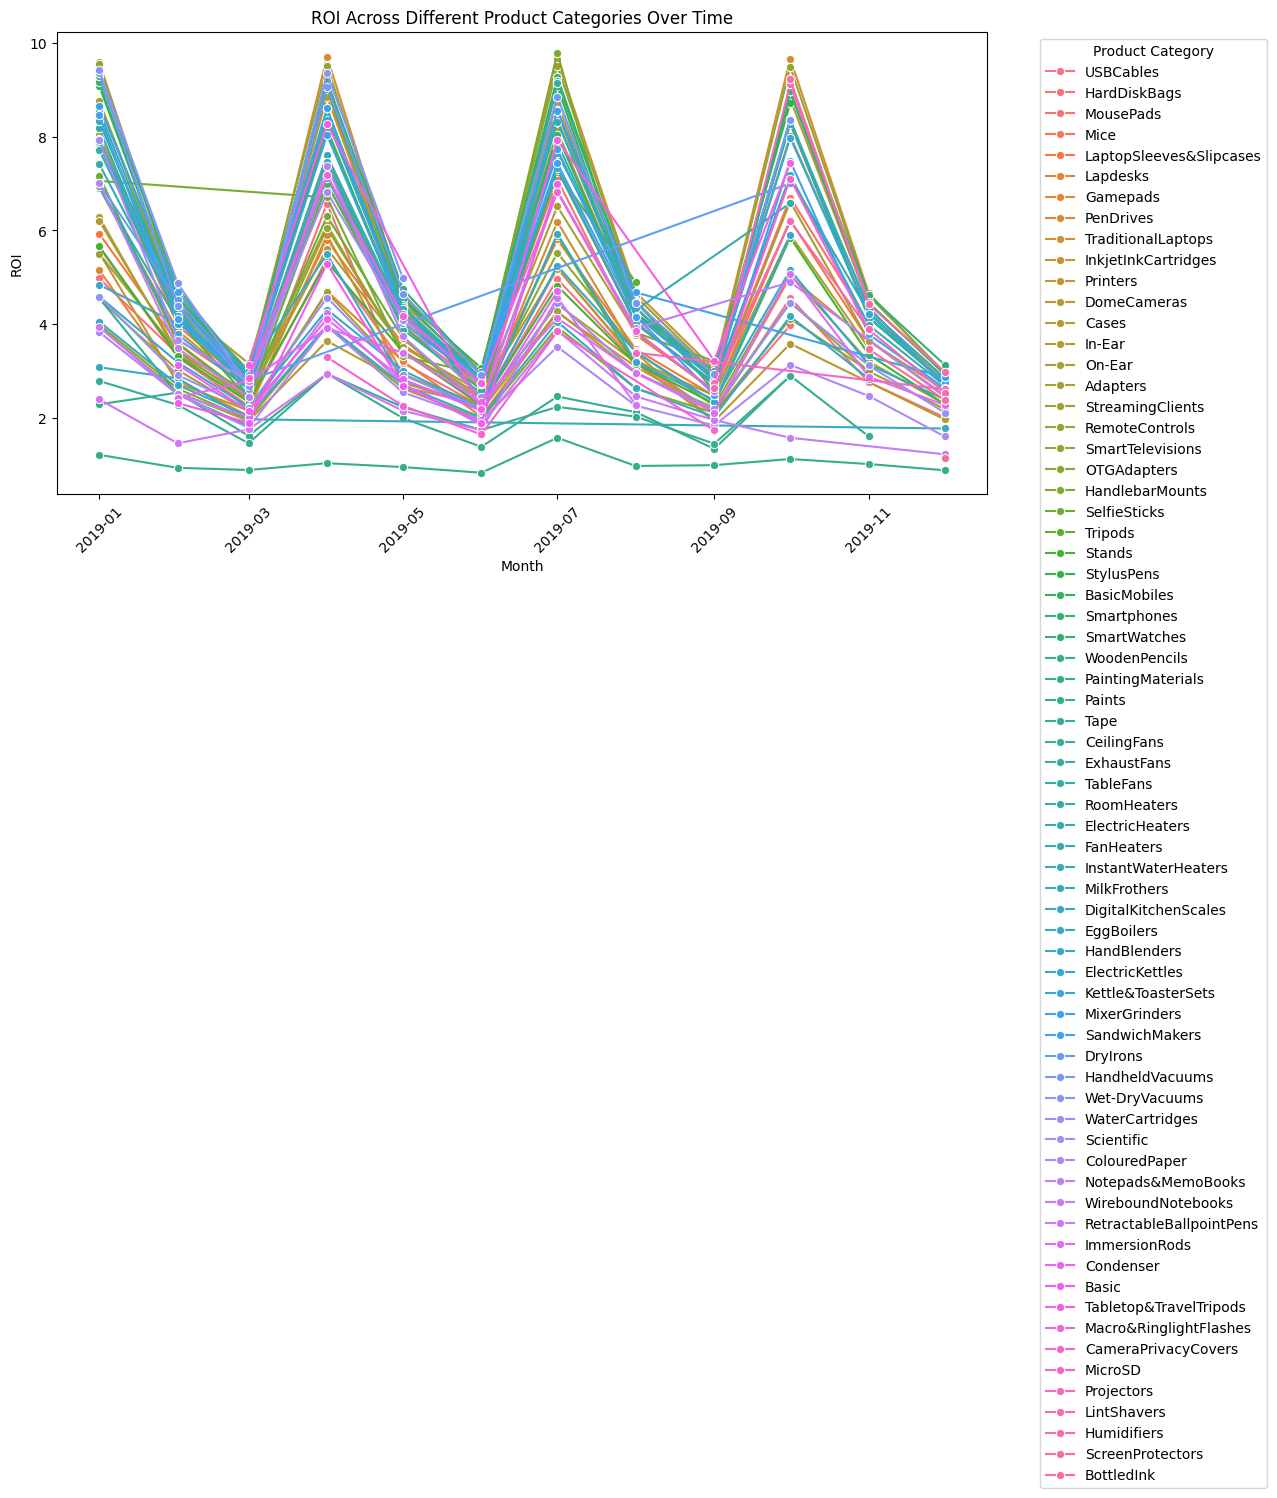

In [12]:
# Visualize ROI across months with the simplified category names
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_by_month_category, x='month', y='ROI', hue='short_category', marker='o')

plt.title('ROI Across Different Product Categories Over Time')
plt.xlabel('Month')
plt.ylabel('ROI')
plt.xticks(rotation=45)

plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [13]:
# Calculate the mean ROI for each short_category
category_roi = sales_by_month_category.groupby('short_category')['ROI'].mean().reset_index()

# Identify the top 5 and bottom 5 categories based on average ROI
top_5_categories = category_roi.nlargest(5, 'ROI')['short_category'].tolist()
bottom_5_categories = category_roi.nsmallest(5, 'ROI')['short_category'].tolist()

# Filter the sales_by_month_category data to include only the top 5 and bottom 5 categories
filtered_data = sales_by_month_category[sales_by_month_category['short_category'].isin(top_5_categories + bottom_5_categories)]

filtered_data

month                                           category     revenue  \
5   2019-01-01  Computers&Accessories|Accessories&Peripherals|...     874.530   
8   2019-01-01   Computers&Accessories|Laptops|TraditionalLaptops  287903.208   
24  2019-01-01  Electronics|Mobiles&Accessories|MobileAccessor...   35095.125   
28  2019-01-01  Home&Kitchen|CraftMaterials|DrawingMaterials|D...       8.330   
29  2019-01-01      Home&Kitchen|CraftMaterials|PaintingMaterials      42.780   
..         ...                                                ...         ...   
567 2019-11-01  Home&Kitchen|CraftMaterials|DrawingMaterials|D...      14.518   
568 2019-11-01      Home&Kitchen|CraftMaterials|PaintingMaterials      14.904   
585 2019-12-01   Computers&Accessories|Laptops|TraditionalLaptops  478928.352   
599 2019-12-01  Home&Kitchen|CraftMaterials|DrawingMaterials|D...       1.190   
617 2019-12-01  OfficeProducts|OfficePaperProducts|Paper|Stati...     222.240   

     discounted_revenue  discount_cost       ROI      short_category  
5               787.077         87.453  8.761801            Lapdesks  
8            272954.664      30328.296  9.593381  TraditionalLaptops  
24            32395.500       3599.500  9.094452          StylusPens  
28                7.497          0.833  1.206617       WoodenPencils  
29               39.744          4.416  2.284858   PaintingMaterials  
..                  ...            ...       ...                 ...  
567              12.376          3.094  1.009727       WoodenPencils  
568              13.248          3.312  1.600515   PaintingMaterials  
585          374791.620     160624.980  2.914143  TraditionalLaptops  
599               0.833          0.357  0.876934       WoodenPencils  
617             169.680         72.720  1.136630          BottledInk  

[86 rows x 7 columns]

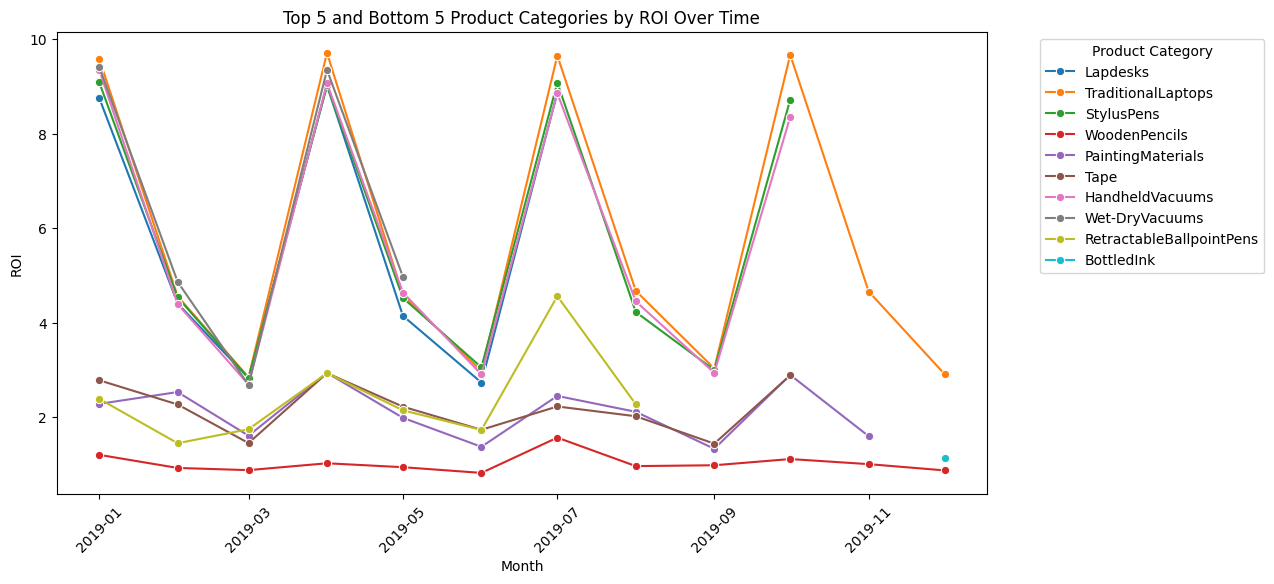

In [14]:
# Visualize ROI across months for the top 5 and bottom 5 categories
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_data, x='month', y='ROI', hue='short_category', marker='o')

plt.title('Top 5 and Bottom 5 Product Categories by ROI Over Time')
plt.xlabel('Month')
plt.ylabel('ROI')
plt.xticks(rotation=45)

plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

Observation:
1. Seasonal Peaks: There are noticeable spikes in ROI at regular intervals, especially for the top-performing categories. These peaks occur roughly every two to three months, suggesting that certain marketing strategies or seasonal factors (such as promotions, holidays, or special events) are driving higher ROI during these periods.
2. Consistency in High ROI Categories: Some categories, like "TraditionalLaptops" and "Lapdesks," consistently show high ROI across all months, peaking significantly higher during these seasonal spikes. This could indicate strong customer demand or effective promotional strategies for these categories.
3. Low ROI Categories: The bottom 5 categories, such as "WoodenPencils" and "BottledInk," maintain consistently low ROI values throughout the observed period. This may suggest that these categories face low demand, lack effective promotional strategies, or have lower margins compared to other products.

### Analysis of ROI Across Different Marketing Channels

Research: </br>
</br>
Articles referenced: 
1. https://doi.org/10.54097/fbem.v7i3.5599
2. https://businessmodelanalyst.com/amazon-marketing-strategy/
3. https://ahrefs.com/blog/marketing-channels/
4. https://www.hubspot.com/marketing-statistics
5. https://blog.hubspot.com/marketing/marketing-channels 

Based on Amazon's typical marketing strategies, we could use the following channels:
- Amazon Search Ads – Amazon's own PPC advertising.
- Email Campaign – Targeted email promotions to engage customers.
- Affiliate Program – Partnerships with external websites and influencers to drive traffic.
- Amazon Display Ads – Banner ads within and outside the Amazon platform.
- SEO – Optimization for Amazon search and external search engines.
- Influencer Marketing – Collaborations with influencers, especially on social media platforms.
- Video Ads (Amazon OTT) – Video advertising on Amazon Fire TV and Twitch.
- Referral Program – Incentives for customers to refer others.
- Sponsored Brands – Ads that feature brands to enhance visibility on Amazon.
- Deals and Coupons – Promotional discounts offered on Amazon.


In [15]:
# Generating Synthetic Data

# List of Amazon marketing channels
amazon_marketing_channels = [
    'Amazon Search Ads', 'Email Campaign', 'Affiliate Program', 'Amazon Display Ads',
    'SEO', 'Influencer Marketing', 'Video Ads (Amazon OTT)', 'Referral Program',
    'Sponsored Brands', 'Deals and Coupons'
]

# Generate synthetic marketing channel data for each transaction
np.random.seed(42)
sales_data['marketing_channel'] = np.random.choice(amazon_marketing_channels, size=len(sales_data))

sales_data

cust_id  transaction_id       date  product_id  delivery_charges  \
0        12346           38223 2019-09-15  B0B2RBP83P             75.00   
1        12346           38223 2019-09-15  B0B6F7LX4C             75.00   
2        12347           23979 2019-03-24  B00LZLQ624             14.41   
3        12347           23979 2019-03-24  B095X38CJS             14.41   
4        12347           23980 2019-03-24  B00Y4ORQ46              6.50   
...        ...             ...        ...         ...               ...   
50452    18283           40289 2019-10-10  B0B9XLX8VR              6.50   
50453    18283           40290 2019-10-10  B07LFWP97N              6.00   
50454    18283           40290 2019-10-10  B07Z1X6VFC              6.00   
50455    18283           40291 2019-10-10  B01JOFKL0A             26.43   
50456    18283           40291 2019-10-10  B08PKBMJKS             26.43   

      coupon_status coupon_code  discount_percentage  quantity  \
0              Used       OFF30                  0.3         2   
1              Used      SALE30                  0.3         1   
2              Used       OFF30                  0.3         1   
3          Not Used       OFF30                  0.3         1   
4          Not Used      ELEC30                  0.3         5   
...             ...         ...                  ...       ...   
50452          Used      SALE10                  0.1         1   
50453          Used      SALE10                  0.1         1   
50454          Used      SALE10                  0.1         2   
50455      Not Used      SALE10                  0.1         1   
50456      Not Used      SALE10                  0.1         1   

                                            product_name  ...  \
0      Lenovo IdeaPad 3 11th Gen Intel Core i3 15.6" ...  ...   
1      MI 80 cm (32 inches) 5A Series HD Ready Smart ...  ...   
2      Classmate Soft Cover 6 Subject Spiral Binding ...  ...   
3      BRUSTRO Copytinta Coloured Craft Paper A4 Size...  ...   
4      Logitech H111 Wired On Ear Headphones With Mic...  ...   
...                                                  ...  ...   
50452  VU 139 cm (55 inches) The GloLED Series 4K Sma...  ...   
50453  Gizga Essentials Laptop Bag Sleeve Case Cover ...  ...   
50454  AirCase Protective Laptop Bag Sleeve fits Upto...  ...   
50455  Canon PIXMA E477 All-in-One Wireless Ink Effic...  ...   
50456               Airtel DigitalTV HD Setup Box Remote  ...   

                                                category actual_price  \
0       Computers&Accessories|Laptops|TraditionalLaptops       718.68   
1      Electronics|HomeTheater,TV&Video|Televisions|S...       299.99   
2      OfficeProducts|OfficePaperProducts|Paper|Stati...         1.92   
3      OfficeProducts|OfficePaperProducts|Paper|Copy&...         1.19   
4      Electronics|Headphones,Earbuds&Accessories|Hea...         9.54   
...                                                  ...          ...   
50452  Electronics|HomeTheater,TV&Video|Televisions|S...       780.00   
50453  Computers&Accessories|Accessories&Peripherals|...        13.19   
50454  Computers&Accessories|Accessories&Peripherals|...        11.99   
50455  Computers&Accessories|Printers,Inks&Accessorie...        76.26   
50456  Electronics|HomeTheater,TV&Video|Accessories|R...         5.99   

       origin_area discounted_price   revenue  discounted_revenue  \
0             None          503.076  1006.152            1006.152   
1             None          209.993   209.993             209.993   
2             None            1.344     1.344               1.344   
3             None            0.833     1.190               0.833   
4             None            6.678    47.700              33.390   
...            ...              ...       ...                 ...   
50452         None          702.000   702.000             702.000   
50453         None           11.871    11.871              11.871   
50454         None           10.79

Justification:

As Amazon’s channel effectiveness can vary significantly based on visibility, engagement rates, and cost efficiency, to adjust the synthetic data generation to better reflect Amazon’s actual marketing channels and realistic effectiveness, multipliers will be used in the ROI modelling based on the articles referenced. Multipliers can reflect the varying effectiveness of each marketing channel, as different channels inherently yield different returns (For example, Amazon Search Ads are often more effective than display ads). However, the synthetic generation of multipliers involves assumptions as we do not have specific performance data from Amazon.

- Amazon Search Ads: Multiplier of 1.4 as they provide high visibility to shoppers with intent to purchase.
- Email Campaign: Multiplier of 1.3 for targeted engagement, although less visible than search ads.
- Affiliate Program: Multiplier of 1.1 since it drives traffic from external sources with varying conversion rates.
- Amazon Display Ads: Multiplier of 0.8 because display ads tend to have lower engagement compared to direct search.
- SEO: Multiplier of 1.5 as organic visibility can yield long-term returns without additional spending.
- Influencer Marketing: Multiplier of 1.2 for brand awareness, effective in reaching wider audiences.
- Video Ads (Amazon OTT): Multiplier of 1.1 as video ads can engage audiences but vary in effectiveness.
- Referral Program: Multiplier of 1.6, as referral programs often yield high conversion rates from trusted recommendations.
- Sponsored Brands: Multiplier of 1.3, as these ads enhance brand presence and are highly visible on the platform.
- Deals and Coupons: Multiplier of 0.9, as discounts attract price-sensitive buyers but may not lead to loyal customers.

In [16]:
# Define base multipliers for each marketing channel
base_channel_effectiveness = {
    'Amazon Search Ads': 1.4,
    'Email Campaign': 1.3,
    'Affiliate Program': 1.1,
    'Amazon Display Ads': 0.8,
    'SEO': 1.5,
    'Influencer Marketing': 1.2,
    'Video Ads (Amazon OTT)': 1.1,
    'Referral Program': 1.6,
    'Sponsored Brands': 1.3,
    'Deals and Coupons': 0.9
}

# Variability range (±10% of the base multiplier)
variability_range = 0.1

# Set random seed for reproducibility, to be removed when running the code
np.random.seed(42)

# Function to apply random variability to the base multiplier
def apply_random_multiplier(base_multiplier):
    random_variability = np.random.uniform(-variability_range, variability_range)
    adjusted_multiplier = base_multiplier * (1 + random_variability)
    return adjusted_multiplier

# Apply the adjusted multiplier to ROI for each row
sales_data['ROI_adjusted'] = sales_data.apply(
    lambda row: row['ROI'] * apply_random_multiplier(base_channel_effectiveness[row['marketing_channel']]),
    axis=1
)

sales_data[['product_name', 'quantity', 'revenue', 'discount_cost', 'marketing_channel', 'ROI', 'ROI_adjusted']]

product_name  quantity   revenue  \
0      Lenovo IdeaPad 3 11th Gen Intel Core i3 15.6" ...         2  1006.152   
1      MI 80 cm (32 inches) 5A Series HD Ready Smart ...         1   209.993   
2      Classmate Soft Cover 6 Subject Spiral Binding ...         1     1.344   
3      BRUSTRO Copytinta Coloured Craft Paper A4 Size...         1     1.190   
4      Logitech H111 Wired On Ear Headphones With Mic...         5    47.700   
...                                                  ...       ...       ...   
50452  VU 139 cm (55 inches) The GloLED Series 4K Sma...         1   702.000   
50453  Gizga Essentials Laptop Bag Sleeve Case Cover ...         1    11.871   
50454  AirCase Protective Laptop Bag Sleeve fits Upto...         2    21.582   
50455  Canon PIXMA E477 All-in-One Wireless Ink Effic...         1    76.260   
50456               Airtel DigitalTV HD Setup Box Remote         1     5.990   

       discount_cost       marketing_channel       ROI  ROI_adjusted  
0            431.208  Video Ads (Amazon OTT)  2.327935      2.496474  
1             89.997      Amazon Display Ads  2.307691      2.012571  
2              0.576        Referral Program  0.852792      1.427777  
3              0.357                     SEO  0.876934      1.341357  
4             14.310  Video Ads (Amazon OTT)  3.115611      3.191395  
...              ...                     ...       ...           ...  
50452         78.000    Influencer Marketing  8.886076     10.321815  
50453          1.319        Referral Program  5.119017      7.611972  
50454          2.398          Email Campaign  6.351383      8.894355  
50455          7.626        Referral Program  8.840714     12.880422  
50456          0.599       Amazon Search Ads  3.746091      5.472534  

[50457 rows x 7 columns]

In [17]:
# Group by marketing channel to analyze non-adjusted ROI
channel_roi = sales_data.groupby('marketing_channel').agg(
    avg_ROI=('ROI', 'mean'),                 # Calculate average of non-adjusted ROI
    avg_ROI_adjusted=('ROI_adjusted', 'mean') # Calculate average of adjusted ROI
).reset_index()

channel_roi_non_adjusted = channel_roi.sort_values(by='avg_ROI', ascending=False)

channel_roi_non_adjusted

marketing_channel   avg_ROI  avg_ROI_adjusted
4          Email Campaign  4.489834          5.827542
5    Influencer Marketing  4.464720          5.360671
9  Video Ads (Amazon OTT)  4.458538          4.906737
8        Sponsored Brands  4.454163          5.777427
1      Amazon Display Ads  4.449585          3.562141
6        Referral Program  4.443487          7.109670
0       Affiliate Program  4.436548          4.882131
7                     SEO  4.429947          6.648426
3       Deals and Coupons  4.413196          3.967946
2       Amazon Search Ads  4.385893          6.138559

/var/folders/cr/yg8f_zlx5w1_6mw1x0jdd6mr0000gn/T/ipykernel_67542/1179871026.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


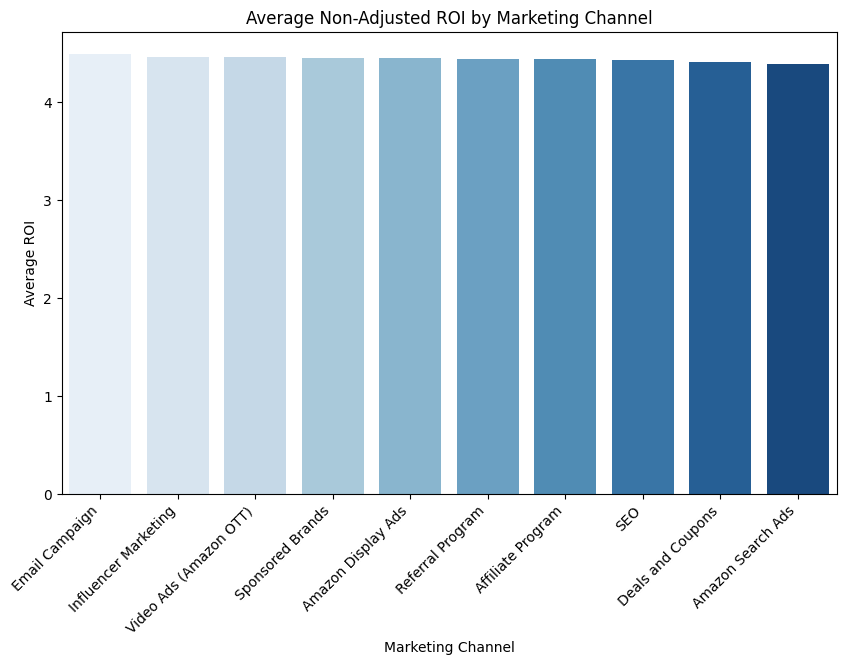

In [18]:
# Plot non-adjusted ROI
plt.figure(figsize=(10, 6))
sns.barplot(
    data=channel_roi_non_adjusted,
    x='marketing_channel',
    y='avg_ROI',
    palette='Blues',
    order=channel_roi_non_adjusted['marketing_channel']  # Set the order of x-axis labels explicitly
)
plt.title('Average Non-Adjusted ROI by Marketing Channel')
plt.ylabel('Average ROI')
plt.xlabel('Marketing Channel')
plt.xticks(rotation=45, ha='right')

plt.show()

/var/folders/cr/yg8f_zlx5w1_6mw1x0jdd6mr0000gn/T/ipykernel_67542/3307602010.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


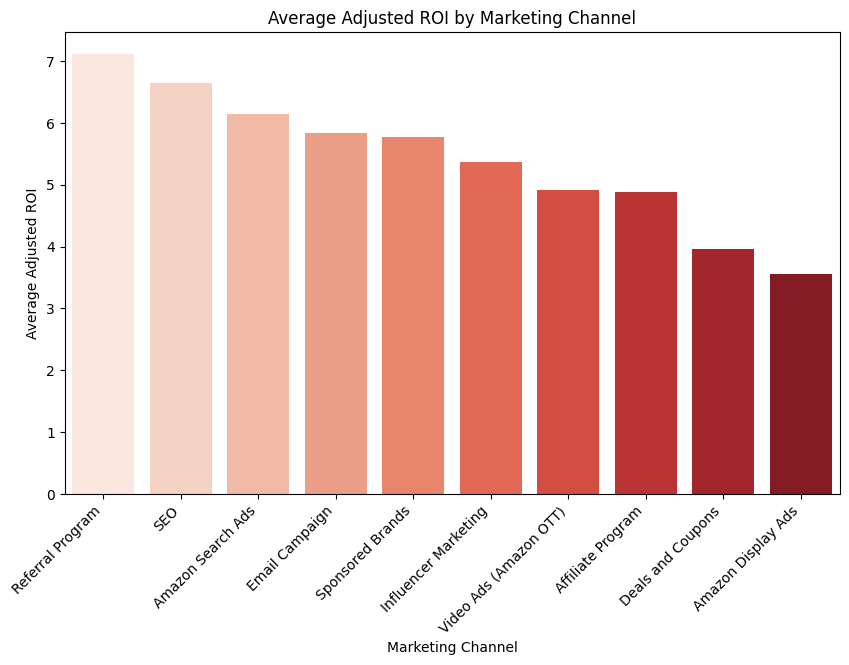

In [19]:
# Group by marketing channel to analyze adjusted ROI
channel_roi_adjusted = channel_roi.sort_values(by='avg_ROI_adjusted', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=channel_roi_adjusted,
    x='marketing_channel',
    y='avg_ROI_adjusted',
    palette='Reds',
    order=channel_roi_adjusted['marketing_channel']  # Set the order of x-axis labels explicitly
)
plt.title('Average Adjusted ROI by Marketing Channel')
plt.ylabel('Average Adjusted ROI')
plt.xlabel('Marketing Channel')
plt.xticks(rotation=45, ha='right')

plt.show()

/var/folders/cr/yg8f_zlx5w1_6mw1x0jdd6mr0000gn/T/ipykernel_67542/1046390667.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/cr/yg8f_zlx5w1_6mw1x0jdd6mr0000gn/T/ipykernel_67542/1046390667.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


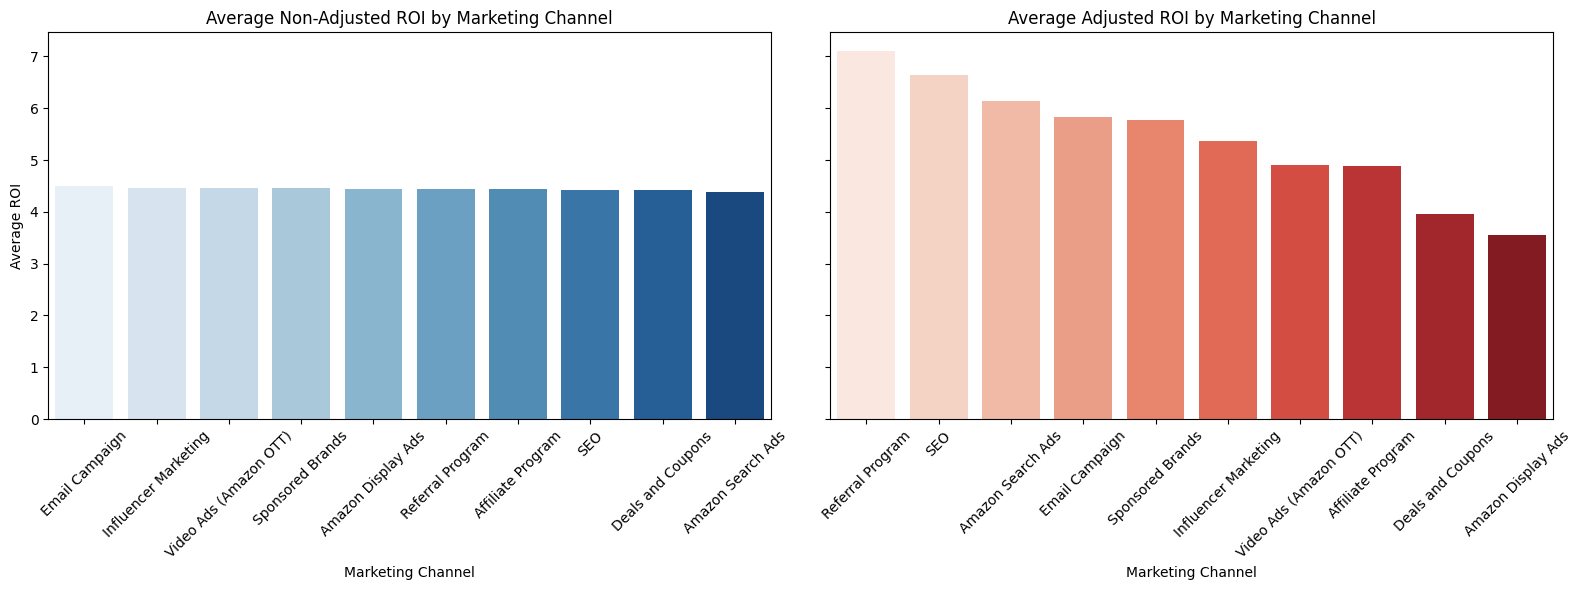

In [20]:
channel_roi_non_adjusted = channel_roi.sort_values(by='avg_ROI', ascending=False)
channel_roi_adjusted = channel_roi.sort_values(by='avg_ROI_adjusted', ascending=False)

# Placing subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

sns.barplot(
    data=channel_roi_non_adjusted,
    x='marketing_channel',
    y='avg_ROI',
    palette='Blues',
    order=channel_roi_non_adjusted['marketing_channel'],
    ax=axes[0]  # Specify the first subplot
)
axes[0].set_title('Average Non-Adjusted ROI by Marketing Channel')
axes[0].set_ylabel('Average ROI')
axes[0].set_xlabel('Marketing Channel')
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(
    data=channel_roi_adjusted,
    x='marketing_channel',
    y='avg_ROI_adjusted',
    palette='Reds',
    order=channel_roi_adjusted['marketing_channel'],
    ax=axes[1]  # Specify the second subplot
)
axes[1].set_title('Average Adjusted ROI by Marketing Channel')
axes[1].set_ylabel('Average Adjusted ROI')
axes[1].set_xlabel('Marketing Channel')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Analysis of Seasonality Effects on ROI across Different Marketing Channels

Research:

Articles Referenced:
1. https://www.amazon.science/publications/seasonal-relevance-in-e-commerce-search
2. https://www.optimizon.co.uk/amazon-knowhow/importance-seasonality-updates-ecommerce-marketplaces/
3. https://advertising.amazon.com/library/guides/global-shopping-events

Based on the articles, seasonality is critical for Amazon marketing because consumer behavior, purchasing patterns, and demand vary significantly at different times of the year. Amazon adjusts its marketing strategies based on seasonality in various ways to maximize engagement, traffic, and sales. Some major occasions include holidays (Thanksgiving - Black Friday and Cyber Monday, Christmas) from November to December, Back-to-School sales from August to September and Summer Sales (Amazon Prime Day, Memorial Day, Labour Day and Summer Vacation) from June to July.


In [21]:
# Analysing Seasonality Effects
# Define seasonality multipliers for Amazon events
seasonality_multipliers = {
    'Holiday': {  # e.g., Black Friday, Cyber Monday
        'Amazon Search Ads': 1.5,
        'Email Campaign': 1.3,
        'Affiliate Program': 1.2,
        'Amazon Display Ads': 1.6,
        'Influencer Marketing': 1.4
    },
    'Back-to-School': {  # e.g., August, September
        'SEO': 1.3,
        'Content Marketing - Blog': 1.2,
        'Amazon Search Ads': 1.4,
        'Sponsored Brands': 1.2
    },
    'Summer Sales': {  # e.g., Prime Day, Memorial Day
        'Email Campaign': 1.4,
        'Social Media - Instagram': 1.5,
        'Referral Program': 1.3,
        'Video Ads (Amazon OTT)': 1.2
    }
}

# Define the months that correspond to each season
seasonality_periods = {
    'Holiday': ['11', '12'],          # November, December
    'Back-to-School': ['08', '09'],   # August, September
    'Summer Sales': ['06', '07'],     # June, July
}

In [22]:
def apply_seasonality_multiplier(row):
    month = row['date'].strftime('%m') 
    for event, months in seasonality_periods.items():
        if month in months:
            multiplier = seasonality_multipliers.get(event, {}).get(row['marketing_channel'], 1)
            return row['ROI_adjusted'] * multiplier  # Adjusted ROI for the season
    return row['ROI_adjusted']  # Default to original ROI if no seasonal adjustment


sales_data['ROI_seasonal_adjusted'] = sales_data.apply(apply_seasonality_multiplier, axis=1)
sales_data[['date', 'marketing_channel', 'ROI', 'ROI_adjusted', 'ROI_seasonal_adjusted']]

date       marketing_channel       ROI  ROI_adjusted  \
0     2019-09-15  Video Ads (Amazon OTT)  2.327935      2.496474   
1     2019-09-15      Amazon Display Ads  2.307691      2.012571   
2     2019-03-24        Referral Program  0.852792      1.427777   
3     2019-03-24                     SEO  0.876934      1.341357   
4     2019-03-24  Video Ads (Amazon OTT)  3.115611      3.191395   
...          ...                     ...       ...           ...   
50452 2019-10-10    Influencer Marketing  8.886076     10.321815   
50453 2019-10-10        Referral Program  5.119017      7.611972   
50454 2019-10-10          Email Campaign  6.351383      8.894355   
50455 2019-10-10        Referral Program  8.840714     12.880422   
50456 2019-10-10       Amazon Search Ads  3.746091      5.472534   

       ROI_seasonal_adjusted  
0                   2.496474  
1                   2.012571  
2                   1.427777  
3                   1.341357  
4                   3.191395  
...                      ...  
50452              10.321815  
50453               7.611972  
50454               8.894355  
50455              12.880422  
50456               5.472534  

[50457 rows x 5 columns]

In [23]:
sales_data['year_month'] = sales_data['date'].dt.to_period('M').astype(str)
seasonal_roi = sales_data.groupby(['year_month', 'marketing_channel']).agg(
    avg_ROI_seasonal_adjusted=('ROI_seasonal_adjusted', 'mean')
).reset_index()

# For proper x-axis plotting
seasonal_roi['year_month'] = pd.to_datetime(seasonal_roi['year_month'], format='%Y-%m')

seasonal_roi

year_month       marketing_channel  avg_ROI_seasonal_adjusted
0   2019-01-01       Affiliate Program                   7.857534
1   2019-01-01      Amazon Display Ads                   5.996619
2   2019-01-01       Amazon Search Ads                  10.067230
3   2019-01-01       Deals and Coupons                   6.488633
4   2019-01-01          Email Campaign                   9.360227
..         ...                     ...                        ...
115 2019-12-01    Influencer Marketing                   4.388577
116 2019-12-01        Referral Program                   4.235414
117 2019-12-01                     SEO                   3.945150
118 2019-12-01        Sponsored Brands                   3.478463
119 2019-12-01  Video Ads (Amazon OTT)                   2.899235

[120 rows x 3 columns]

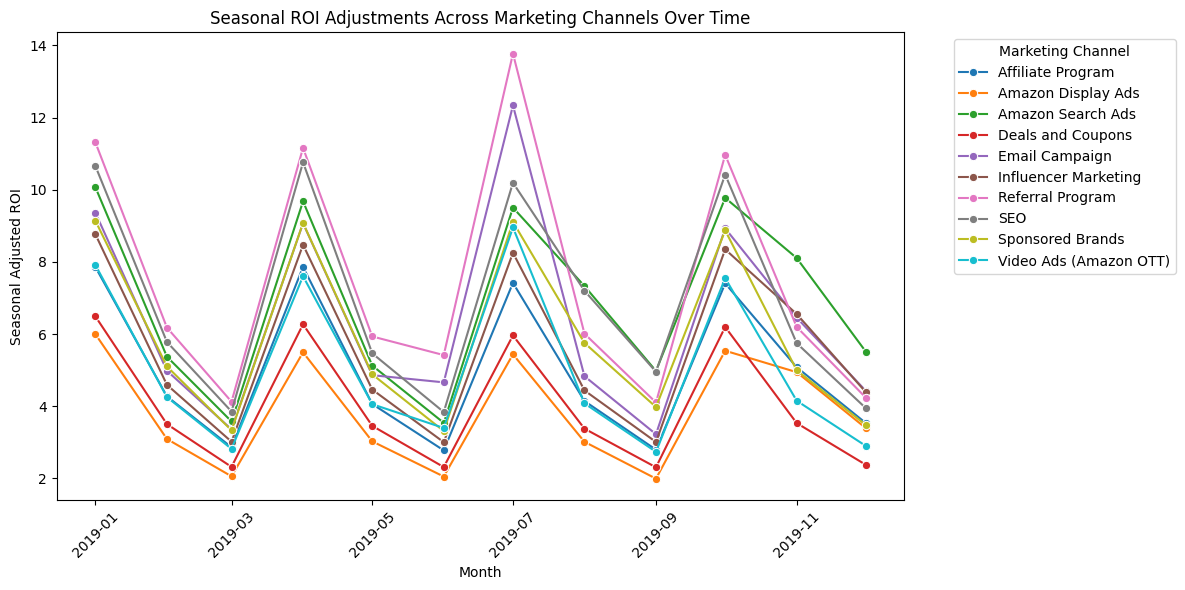

In [24]:
# Visualize seasonal effects on marketing channels
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=seasonal_roi,
    x='year_month',
    y='avg_ROI_seasonal_adjusted',
    hue='marketing_channel',
    marker='o'
)
plt.title('Seasonal ROI Adjustments Across Marketing Channels Over Time')
plt.xlabel('Month')
plt.ylabel('Seasonal Adjusted ROI')
plt.xticks(rotation=45)
plt.legend(title='Marketing Channel', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Observation: 
1. The chart highlights a significant mid-year spike in ROI for most marketing channels, with Email Campaign and Referral Program being the top performers. This indicates that these channels might be leveraged more heavily during peak promotion periods like summer sales. This corresponds to the articles that were referenced. 
2. Cyclical nature of the graph shows that there are specific periods where demands surges and Amazon can look into further boosting demands during these periods and also look into investing more into effective marketing channels during periods that saw dips in ROI.
3. The downward trend after the holiday season at the end of the year suggests a potential reduction in marketing effectiveness in the early periods of the year, signaling the need for optimized strategies during that time. The early part of the year, while stable, may also benefit from targeted campaigns to boost ROI. This analysis can help in planning marketing strategies, optimizing campaign timing, and selecting the most effective channels to maximize ROI throughout the year.

### Analysis of ROI across Different Marketing Channel using Customer Segmentation

In [25]:
# Customer segmentation using K-means clustering
clustering_data = sales_data[['ROI_seasonal_adjusted', 'marketing_channel', 'quantity', 'coupon_status']]

encoder = OneHotEncoder()
encoded_channels = pd.DataFrame(
    encoder.fit_transform(clustering_data[['marketing_channel', 'coupon_status']]).toarray(),
    columns=encoder.get_feature_names_out()
)

clustering_data = pd.concat([clustering_data[['ROI_seasonal_adjusted', 'quantity']], encoded_channels], axis=1)

# Data cleaning
clustering_data.fillna(0, inplace=True)

# Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(clustering_data)

print(pd.DataFrame(scaled_features, columns=clustering_data.columns).head())

   ROI_seasonal_adjusted  quantity  marketing_channel_Affiliate Program  \
0              -0.981072 -0.127603                            -0.331248   
1              -1.128648 -0.173929                            -0.331248   
2              -1.306992 -0.173929                            -0.331248   
3              -1.333348 -0.173929                            -0.331248   
4              -0.769142  0.011375                            -0.331248   

   marketing_channel_Amazon Display Ads  marketing_channel_Amazon Search Ads  \
0                             -0.334847                            -0.330806   
1                              2.986438                            -0.330806   
2                             -0.334847                            -0.330806   
3                             -0.334847                            -0.330806   
4                             -0.334847                            -0.330806   

   marketing_channel_Deals and Coupons  marketing_channel_Email Camp

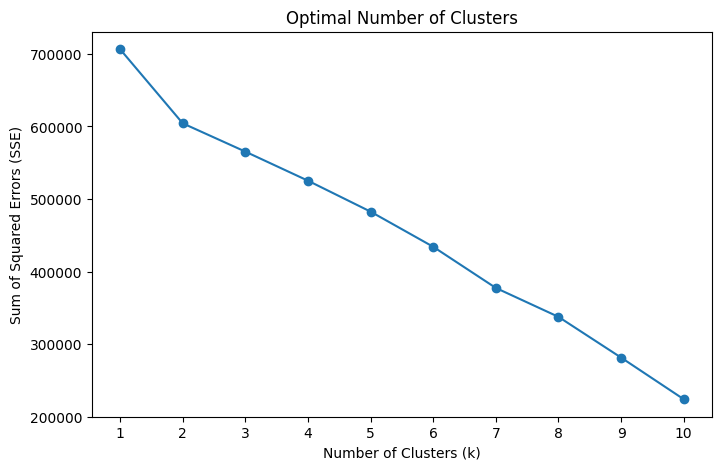

In [26]:
# Finding the optimal number of clusters
sse = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_) 

plt.figure(figsize=(8, 5))
plt.plot(k_values, sse, marker='o')
plt.title('Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(k_values)
plt.show()

Conclusion:
The "elbow" of the curve is where the rate of decrease in SSE slows down significantly. This point suggests the optimal number of clusters. In this case, the elbow appears to occur at 3 or 4 clusters, as the SSE decreases more gradually after this point. Choosing 3 or 4 clusters would balance between having a good clustering structure (lower SSE) and avoiding overfitting by adding too many clusters.

In [27]:
# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=7)
clustering_data['cluster'] = kmeans.fit_predict(scaled_features)

sales_data_with_segments = sales_data.copy()
sales_data_with_segments['customer_segment'] = clustering_data['cluster']

print(sales_data_with_segments[['customer_segment', 'ROI_seasonal_adjusted', 'marketing_channel', 'quantity', 'coupon_status']].head())

   customer_segment  ROI_seasonal_adjusted       marketing_channel  quantity  \
0                 2               2.496474  Video Ads (Amazon OTT)         2   
1                 2               2.012571      Amazon Display Ads         1   
2                 2               1.427777        Referral Program         1   
3                 1               1.341357                     SEO         1   
4                 0               3.191395  Video Ads (Amazon OTT)         5   

  coupon_status  
0          Used  
1          Used  
2          Used  
3      Not Used  
4      Not Used  


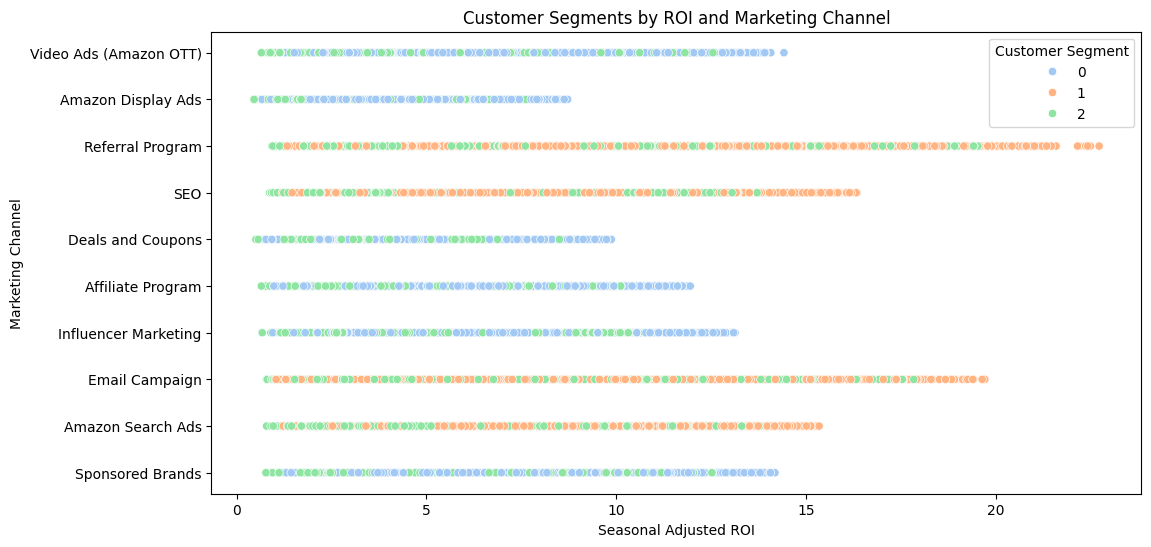

In [28]:
# Plot the clusters based on ROI and Marketing Channel
plt.figure(figsize=(12, 6))
sns.scatterplot(data=sales_data_with_segments, x='ROI_seasonal_adjusted', y='marketing_channel', hue='customer_segment', palette='pastel')
plt.title('Customer Segments by ROI and Marketing Channel')
plt.xlabel('Seasonal Adjusted ROI')
plt.ylabel('Marketing Channel')
plt.legend(title='Customer Segment')
plt.show()

Observations:
1. Segment 0: This segment appears consistently across almost all channels, especially those with higher Seasonal Adjusted ROI values. This could represent customers who respond similarly to different marketing channels, possibly indicating a broad but stable customer profile. Segment 1 and Segment 2: These segments show up in most channels but are more varied in density across channels. Segment 1, for example, appears more frequently in channels like "SEO" and "Referral Program," while Segment 2 has a stronger presence in channels like "Amazon Display Ads" and "Deals and Coupons." This may suggest different engagement levels or preferences among customer segments for specific marketing channels.
2. Some marketing channels, such as "Video Ads (Amazon OTT)" and "Amazon Display Ads," have a broader spread of ROI values. This could indicate that these channels are more variable in their performance, potentially due to seasonal effects or varying levels of customer engagement.

Potential Marketing Strategies:
- Channels with a high concentration of a particular segment could be optimized or further personalized for that segment’s behavior. For example, email campaigns has a strong representation by segment 0.
- Channels with diverse segment representation may benefit from differentiated approaches to meet the needs of each segment. For example, SEO has a strong mix of all segments, possibly reflecting the organic nature of this channel, which attracts a wide range of customer types.

### Multinomial Logistic Regression for Analysis of Channel Preferences

In [29]:
sales_data = sales_data.merge(users[['user_id', 'age', 'gender']], left_on='cust_id', right_on='user_id', how='left')

sales_data

cust_id  transaction_id       date  product_id  delivery_charges  \
0        12346           38223 2019-09-15  B0B2RBP83P             75.00   
1        12346           38223 2019-09-15  B0B6F7LX4C             75.00   
2        12347           23979 2019-03-24  B00LZLQ624             14.41   
3        12347           23979 2019-03-24  B095X38CJS             14.41   
4        12347           23980 2019-03-24  B00Y4ORQ46              6.50   
...        ...             ...        ...         ...               ...   
50452    18283           40289 2019-10-10  B0B9XLX8VR              6.50   
50453    18283           40290 2019-10-10  B07LFWP97N              6.00   
50454    18283           40290 2019-10-10  B07Z1X6VFC              6.00   
50455    18283           40291 2019-10-10  B01JOFKL0A             26.43   
50456    18283           40291 2019-10-10  B08PKBMJKS             26.43   

      coupon_status coupon_code  discount_percentage  quantity  \
0              Used       OFF30                  0.3         2   
1              Used      SALE30                  0.3         1   
2              Used       OFF30                  0.3         1   
3          Not Used       OFF30                  0.3         1   
4          Not Used      ELEC30                  0.3         5   
...             ...         ...                  ...       ...   
50452          Used      SALE10                  0.1         1   
50453          Used      SALE10                  0.1         1   
50454          Used      SALE10                  0.1         2   
50455      Not Used      SALE10                  0.1         1   
50456      Not Used      SALE10                  0.1         1   

                                            product_name  ... discount_cost  \
0      Lenovo IdeaPad 3 11th Gen Intel Core i3 15.6" ...  ...       431.208   
1      MI 80 cm (32 inches) 5A Series HD Ready Smart ...  ...        89.997   
2      Classmate Soft Cover 6 Subject Spiral Binding ...  ...         0.576   
3      BRUSTRO Copytinta Coloured Craft Paper A4 Size...  ...         0.357   
4      Logitech H111 Wired On Ear Headphones With Mic...  ...        14.310   
...                                                  ...  ...           ...   
50452  VU 139 cm (55 inches) The GloLED Series 4K Sma...  ...        78.000   
50453  Gizga Essentials Laptop Bag Sleeve Case Cover ...  ...         1.319   
50454  AirCase Protective Laptop Bag Sleeve fits Upto...  ...         2.398   
50455  Canon PIXMA E477 All-in-One Wireless Ink Effic...  ...         7.626   
50456               Airtel DigitalTV HD Setup Box Remote  ...         0.599   

            ROI    month       marketing_channel  ROI_adjusted  \
0      2.327935  2019-09  Video Ads (Amazon OTT)      2.496474   
1      2.307691  2019-09      Amazon Display Ads      2.012571   
2      0.852792  2019-03        Referral Program      1.427777   
3      0.876934  2019-03                     SEO      1.341357   
4      3.115611  2019-03  Video Ads (Amazon OTT)      3.191395   
...         ...      ...                     ...           ...   
50452  8.886076  2019-10    Influencer Marketing     10.321815   
50453  5.119017  2019-10        Referral Program      7.611972   
50454  6.351383  2019-10          Email Campaign      8.894355   
50455  8.840714  2019-10        Referral Program     12.880422   
50456  3.746091  2019-10       Amazon Search Ads      5.472534   

       ROI_seasonal_adjusted  year_month  user_id  age  gender  
0                   2.496474     2019-09    12346   38  Female  
1                   2.012571     2019-09    12346   38  Female  
2                   1.427777     2019-03    12347   49  Female  
3                   1.341357     2019-03    12347   49  Female  
4                   3.191395     2019-03    12347   49  Female  
...                      ...         ...      ...  ...     ...  
50452              10.321815     2019-10    18283   60  Female  
50453               7.611972     2019-10    18283  

In [30]:
sales_data['year_month'] = sales_data['date'].dt.to_period('M').astype(str)

y = sales_data['marketing_channel']
X = sales_data[['age', 'gender', 'year_month', 'coupon_status', 'quantity', 'discount_percentage']]

# Encode categorical variables
encoder = OneHotEncoder(sparse_output=False)  
encoded_features = encoder.fit_transform(X[['coupon_status', 'gender', 'year_month']])
encoded_features_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out())
X = pd.concat([X[['age', 'quantity', 'discount_percentage']].reset_index(drop=True), encoded_features_df.reset_index(drop=True)], axis=1)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the multinomial logistic regression model
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

/Users/wayne/Desktop/Passion8/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Classification Report:
                         precision    recall  f1-score   support

     Affiliate Program       0.11      0.02      0.03       948
    Amazon Display Ads       0.10      0.07      0.08      1060
     Amazon Search Ads       0.11      0.08      0.09      1018
     Deals and Coupons       0.10      0.24      0.14       978
        Email Campaign       0.09      0.01      0.01       962
  Influencer Marketing       0.09      0.10      0.10      1040
      Referral Program       0.09      0.14      0.11       995
                   SEO       0.12      0.07      0.09      1043
      Sponsored Brands       0.09      0.05      0.06      1042
Video Ads (Amazon OTT)       0.10      0.23      0.14      1006

              accuracy                           0.10     10092
             macro avg       0.10      0.10      0.09     10092
          weighted avg       0.10      0.10      0.09     10092

Confusion Matrix:
 [[ 18  73  49 224   3  98 142  56  52 233]
 [ 21  74  69 2

In [31]:
# Analyze feature importance
channel_labels = log_reg.classes_
feature_labels = X.columns
coef_df = pd.DataFrame(log_reg.coef_, columns=feature_labels, index=channel_labels)

coef_df.rename(columns={
    'age': 'Age',
    'Discount_pct': 'Discount Percentage',
    'Coupon_Status_Not Used': 'Coupon Status: Not Used',
    'Coupon_Status_Used': 'Coupon Status: Used',
    'gender_Male': 'Gender: Male',
    'gender_Female': 'Gender: Female',
    'year_month_2019-01': 'January 2019',
    'year_month_2019-02': 'February 2019',
    'year_month_2019-03': 'March 2019',
    'year_month_2019-04': 'April 2019',
    'year_month_2019-05': 'May 2019',
    'year_month_2019-06': 'June 2019',
    'year_month_2019-07': 'July 2019',
    'year_month_2019-08': 'August 2019',
    'year_month_2019-09': 'September 2019',
    'year_month_2019-10': 'October 2019',
    'year_month_2019-11': 'November 2019',
    'year_month_2019-12': 'December 2019'
}, inplace=True)

print("\nFeature Importance by Channel:\n", coef_df)


Feature Importance by Channel:
                              Age  quantity  discount_percentage  \
Affiliate Program       0.000281  0.007608            -0.000938   
Amazon Display Ads     -0.024862  0.014886             0.003856   
Amazon Search Ads       0.015067 -0.013482             0.011394   
Deals and Coupons      -0.001942  0.004148             0.006567   
Email Campaign          0.008666 -0.005158            -0.015422   
Influencer Marketing   -0.011048  0.003792            -0.007343   
Referral Program        0.002497 -0.015747            -0.001531   
SEO                     0.000811  0.006907             0.007779   
Sponsored Brands        0.014312  0.017598             0.008255   
Video Ads (Amazon OTT) -0.003783 -0.020552            -0.012617   

                        coupon_status_Not Used  coupon_status_Used  \
Affiliate Program                    -0.002716            0.002716   
Amazon Display Ads                    0.003816           -0.003816   
Amazon Search Ads  

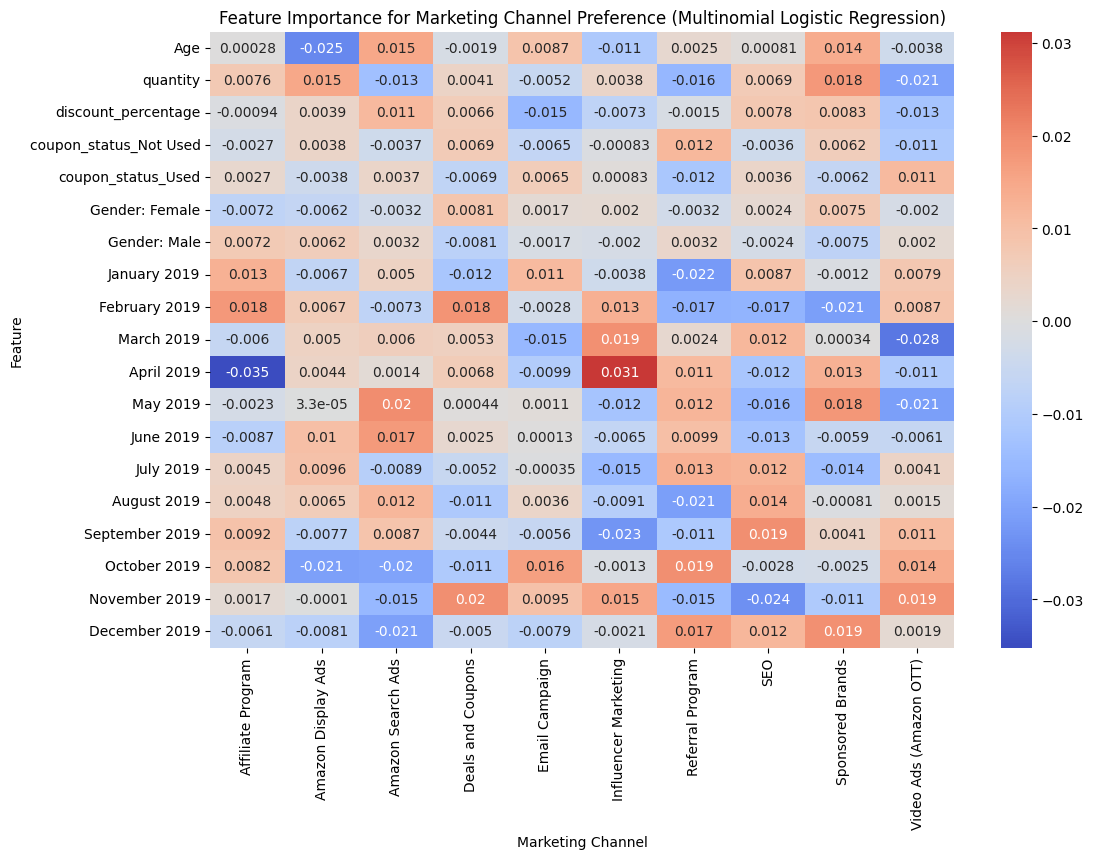

In [32]:
# Visualize the feature importance for each channel
plt.figure(figsize=(12, 8))
sns.heatmap(coef_df.T, annot=True, cmap="coolwarm", center=0)
plt.title('Feature Importance for Marketing Channel Preference (Multinomial Logistic Regression)')
plt.xlabel('Marketing Channel')
plt.ylabel('Feature')
plt.show()

Observation:
1. Influence of Demographics and Discounts: While Age and Discount Percentage seem to have some impact on certain channels, the effect is relatively small. This suggests that other unobserved factors may also be influencing channel preferences.
2. Seasonal Variability: Seasonal effects are evident, with certain months showing a stronger preference for specific channels, likely reflecting seasonal marketing strategies or customer shopping behavior patterns.
3. Coupon Usage: The response to coupon usage differs across channels, which could indicate that some channels are better suited for coupon-driven engagement than others.

The impact values are relatively small, suggesting that a non-linear model might capture more complex relationships.

### Random Forest Classifier for Analysis of Channel Preferences

In [33]:
# Implementing Random Forest Classfier
y = sales_data['marketing_channel'] 
X = sales_data[['age', 'gender', 'year_month', 'coupon_status', 'quantity', 'discount_percentage']] 

encoder = OneHotEncoder(sparse_output=False)  
encoded_features = encoder.fit_transform(X[['gender', 'coupon_status', 'year_month']])
encoded_features_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out())
X = pd.concat([X[['age', 'quantity', 'discount_percentage']].reset_index(drop=True), encoded_features_df.reset_index(drop=True)], axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

feature_importances = rf_model.feature_importances_
features_list = X.columns
importance_df = pd.DataFrame({'Feature': features_list, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

rename_dict = {
    'age': 'Age',
    'discount_percentage': 'Discount Percentage',
    'coupon_status_Not Used': 'Coupon Status: Not Used',
    'coupon_status_Used': 'Coupon Status: Used',
    'gender_Male': 'Gender: Male',
    'gender_Female': 'Gender: Female',
    'year_month_2019-01': 'January 2019',
    'year_month_2019-02': 'February 2019',
    'year_month_2019-03': 'March 2019',
    'year_month_2019-04': 'April 2019',
    'year_month_2019-05': 'May 2019',
    'year_month_2019-06': 'June 2019',
    'year_month_2019-07': 'July 2019',
    'year_month_2019-08': 'August 2019',
    'year_month_2019-09': 'September 2019',
    'year_month_2019-10': 'October 2019',
    'year_month_2019-11': 'November 2019',
    'year_month_2019-12': 'December 2019'
}

importance_df['Feature'] = importance_df['Feature'].replace(rename_dict)
importance_df


Feature  Importance
0                       Age    0.567773
1                  quantity    0.360922
5   Coupon Status: Not Used    0.007719
6       Coupon Status: Used    0.007633
3            Gender: Female    0.007083
4              Gender: Male    0.007054
2       Discount Percentage    0.005384
13                July 2019    0.003540
14              August 2019    0.003445
7              January 2019    0.003187
11                 May 2019    0.003182
8             February 2019    0.003041
12                June 2019    0.003040
17            November 2019    0.002942
16             October 2019    0.002869
10               April 2019    0.002854
9                March 2019    0.002792
15           September 2019    0.002791
18            December 2019    0.002748

/var/folders/cr/yg8f_zlx5w1_6mw1x0jdd6mr0000gn/T/ipykernel_67542/3455037008.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='pastel')


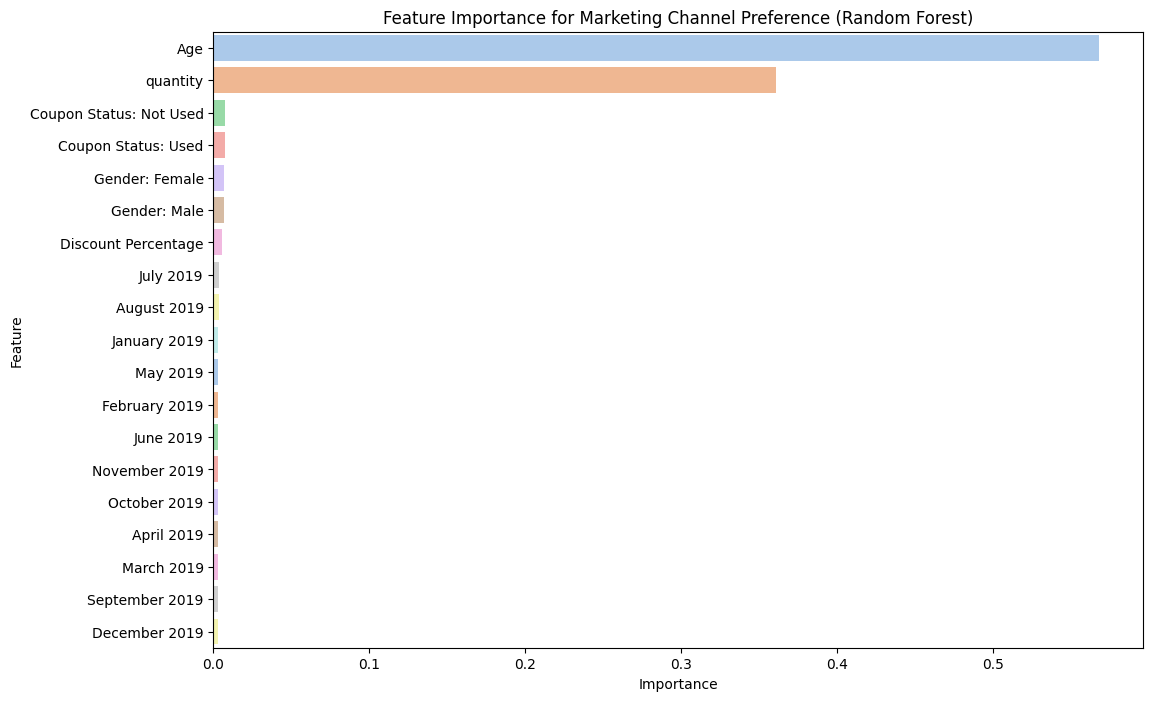

In [34]:
# Visualize the renamed feature importance
plt.figure(figsize=(12, 8))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='pastel')
plt.title('Feature Importance for Marketing Channel Preference (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Observation:
1. Age: Age significantly influences channel preference, showing that different demographics prefer different channels.
2. Quantity: Quantity is also an important feature. A higher quantity of items purchased could indicate high engagement with certain marketing channels (for example, bulk discounts might be promoted more on certain channels).
3. Coupon Status: Coupon usage has some impact but appears lower than age and quantity. This could mean that, while coupon usage impacts overall engagement, it might not be a strong predictor of specific channel preference.
4. Minimal influence of temporal and demographic features. 

## 2. Analyze the impact of various promotional campaigns on sales.

### Analysis of the Overall Impact of Promotional Campaigns on Sales

In [35]:
# Calculate total and average quantity sold per unique transaction for each Coupon Status
quantity_by_coupon = sales_data.groupby('coupon_status').agg(
    Total_Quantity_Sold=('quantity', 'sum'),
    Avg_Quantity_Sold=('quantity', 'mean')
).reset_index()

quantity_by_coupon

coupon_status  Total_Quantity_Sold  Avg_Quantity_Sold
0      Not Used               156529           4.742010
1          Used                83367           4.778026

/var/folders/cr/yg8f_zlx5w1_6mw1x0jdd6mr0000gn/T/ipykernel_67542/591892304.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=quantity_by_coupon, x='coupon_status', y='Total_Quantity_Sold', palette='pastel')
/var/folders/cr/yg8f_zlx5w1_6mw1x0jdd6mr0000gn/T/ipykernel_67542/591892304.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=quantity_by_coupon, x='coupon_status', y='Avg_Quantity_Sold', palette='pastel')


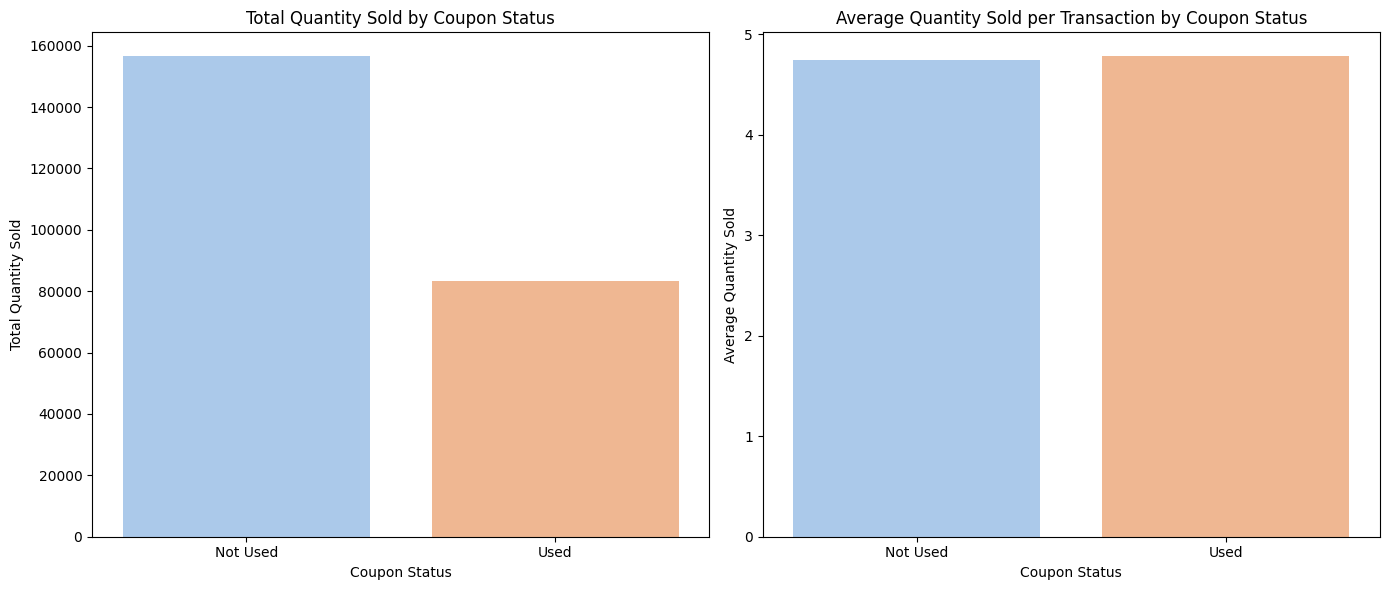

In [36]:
# Plot Total Quantity Sold
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(data=quantity_by_coupon, x='coupon_status', y='Total_Quantity_Sold', palette='pastel')
plt.title('Total Quantity Sold by Coupon Status')
plt.xlabel('Coupon Status')
plt.ylabel('Total Quantity Sold')

# Plot Average Quantity Sold
plt.subplot(1, 2, 2)
sns.barplot(data=quantity_by_coupon, x='coupon_status', y='Avg_Quantity_Sold', palette='pastel')
plt.title('Average Quantity Sold per Transaction by Coupon Status')
plt.xlabel('Coupon Status')
plt.ylabel('Average Quantity Sold')

plt.tight_layout()
plt.show()

In [37]:
# Calculate total and average revenue per unique transaction for each Coupon Status
revenue_by_coupon = sales_data.groupby('coupon_status').agg(
    Total_Revenue=('revenue', 'sum'),
    Avg_Revenue=('revenue', 'mean')
).reset_index()

revenue_by_coupon

coupon_status  Total_Revenue  Avg_Revenue
0      Not Used   2.165453e+07   656.018912
1          Used   9.270896e+06   531.344343

/var/folders/cr/yg8f_zlx5w1_6mw1x0jdd6mr0000gn/T/ipykernel_67542/3455168576.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=revenue_by_coupon, x='coupon_status', y='Total_Revenue', palette='pastel')
/var/folders/cr/yg8f_zlx5w1_6mw1x0jdd6mr0000gn/T/ipykernel_67542/3455168576.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=revenue_by_coupon, x='coupon_status', y='Avg_Revenue', palette='pastel')


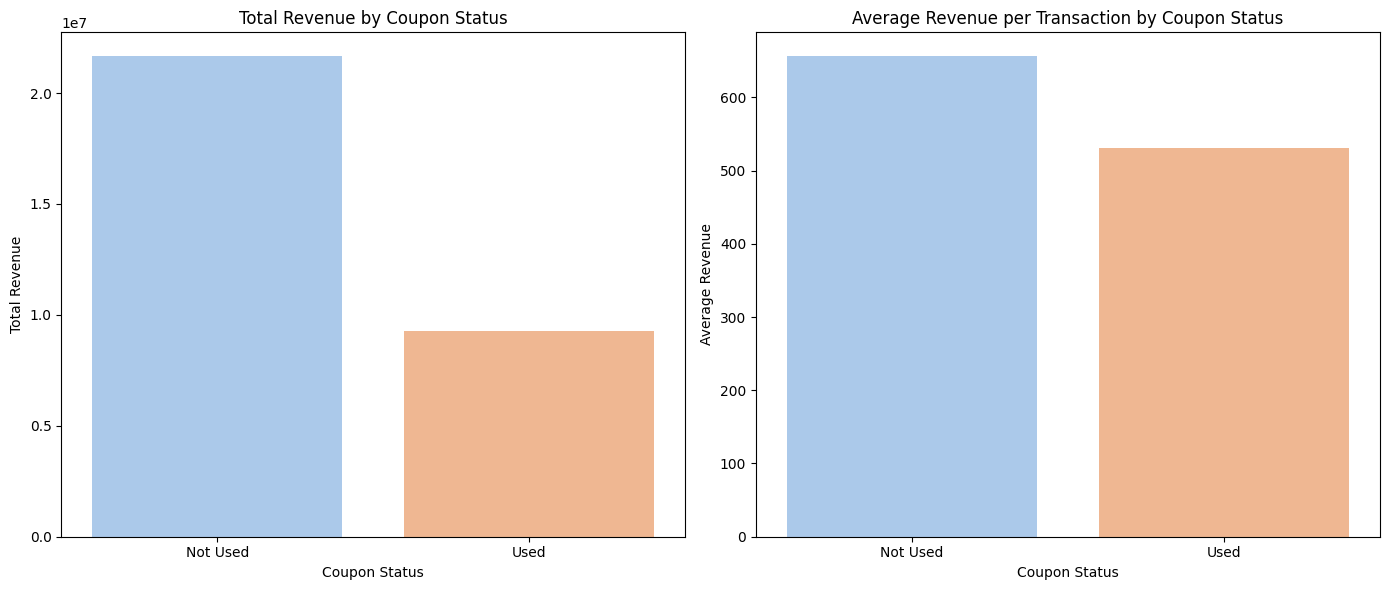

In [38]:
# Plot Total Revenue
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(data=revenue_by_coupon, x='coupon_status', y='Total_Revenue', palette='pastel')
plt.title('Total Revenue by Coupon Status')
plt.xlabel('Coupon Status')
plt.ylabel('Total Revenue')

# Plot Average Revenue per Transaction
plt.subplot(1, 2, 2)
sns.barplot(data=revenue_by_coupon, x='coupon_status', y='Avg_Revenue', palette='pastel')
plt.title('Average Revenue per Transaction by Coupon Status')
plt.xlabel('Coupon Status')
plt.ylabel('Average Revenue')

plt.tight_layout()
plt.show()

In [39]:
# Calculate total transactions for each Coupon Status
transactions_by_coupon = sales_data.groupby('coupon_status').agg(
    Total_Transactions=('transaction_id', 'nunique')  # Unique transactions
).reset_index()

transactions_by_coupon

coupon_status  Total_Transactions
0      Not Used               19455
1          Used               12258

/var/folders/cr/yg8f_zlx5w1_6mw1x0jdd6mr0000gn/T/ipykernel_67542/2983999287.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=transactions_by_coupon, x='coupon_status', y='Total_Transactions', palette='pastel')


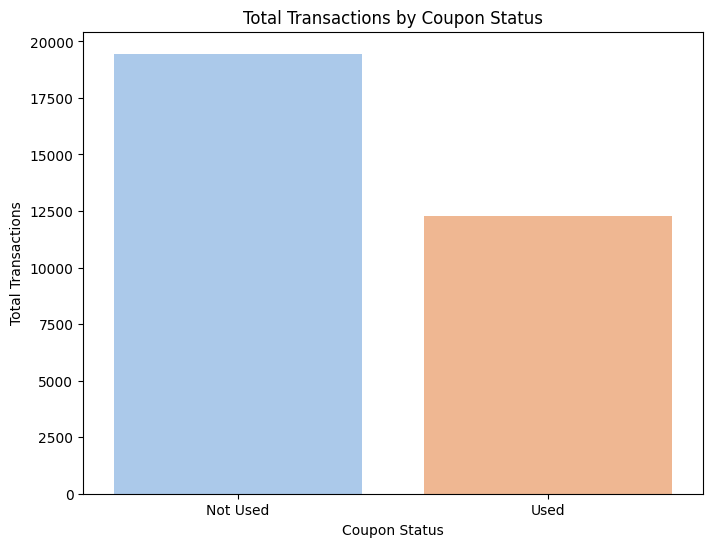

In [40]:
# Plot Total Transactions by Coupon Status
plt.figure(figsize=(8, 6))
sns.barplot(data=transactions_by_coupon, x='coupon_status', y='Total_Transactions', palette='pastel')
plt.title('Total Transactions by Coupon Status')
plt.xlabel('Coupon Status')
plt.ylabel('Total Transactions')
plt.show()

In [41]:
# Identify repeat purchases by counting unique transactions for each user by Coupon Status
repeat_customers = sales_data.groupby(['user_id', 'coupon_status'])['transaction_id'].nunique().reset_index(name='Unique_Transactions')

# Determine customers with repeat purchases (more than one unique transaction)
repeat_customers['Is_Repeat_Customer'] = repeat_customers['Unique_Transactions'] > 1

# Calculate repeat purchase rate by Coupon Status
repeat_rate = repeat_customers.groupby('coupon_status')['Is_Repeat_Customer'].mean()
print("Repeat Purchase Rate by Coupon Status:")
print(repeat_rate)


Repeat Purchase Rate by Coupon Status:
coupon_status
Not Used    0.908333
Used        0.872635
Name: Is_Repeat_Customer, dtype: float64


/var/folders/cr/yg8f_zlx5w1_6mw1x0jdd6mr0000gn/T/ipykernel_67542/3440641875.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=repeat_rate.index, y=repeat_rate.values, palette='pastel')


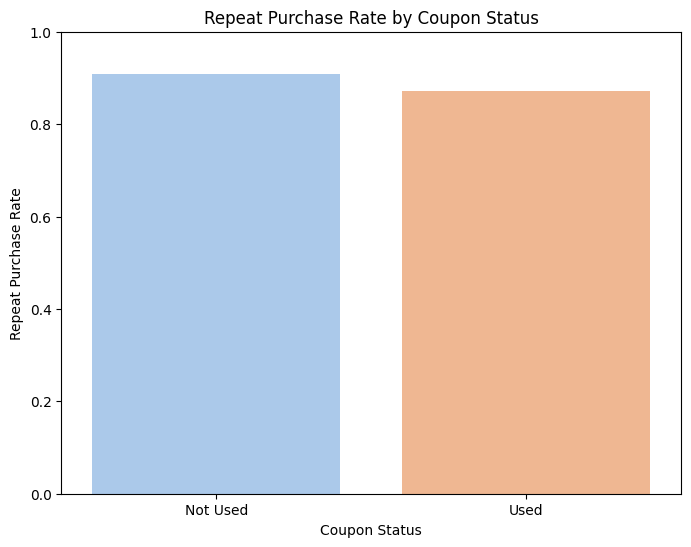

In [42]:
# Plot Repeat Purchase Rate by Coupon Status
plt.figure(figsize=(8, 6))
sns.barplot(x=repeat_rate.index, y=repeat_rate.values, palette='pastel')
plt.title('Repeat Purchase Rate by Coupon Status')
plt.xlabel('Coupon Status')
plt.ylabel('Repeat Purchase Rate')
plt.ylim(0, 1)  # Since it's a rate, set y-axis to max 1 for better interpretation
plt.show()

In [43]:
# Calculate the average number of unique products purchased by coupon status
product_variety = sales_data.groupby(['user_id', 'coupon_status'])['product_id'].nunique().reset_index()
avg_product_variety = product_variety.groupby('coupon_status')['product_id'].mean()

print("Average Product Variety by Coupon Status:")
print(avg_product_variety)

Average Product Variety by Coupon Status:
coupon_status
Not Used    13.424306
Used         8.842795
Name: product_id, dtype: float64


/var/folders/cr/yg8f_zlx5w1_6mw1x0jdd6mr0000gn/T/ipykernel_67542/1757288913.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_product_variety.index, y=avg_product_variety.values, palette='pastel')


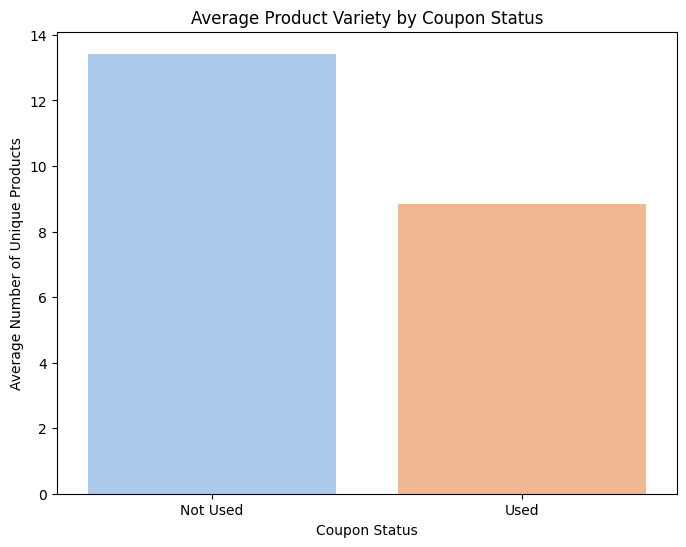

In [44]:
# Plot Average Product Variety by Coupon Status
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_product_variety.index, y=avg_product_variety.values, palette='pastel')
plt.title('Average Product Variety by Coupon Status')
plt.xlabel('Coupon Status')
plt.ylabel('Average Number of Unique Products')
plt.show()

In [45]:
# Identify first-time customers
first_purchase = sales_data.groupby('user_id')['date'].min().reset_index()
sales_data = sales_data.merge(first_purchase, on='user_id', suffixes=('', '_first_purchase'))
sales_data['Is_First_Purchase'] = sales_data['date'] == sales_data['date_first_purchase']

# Calculate new customer rate by coupon status
new_customer_rate = sales_data.groupby('coupon_status')['Is_First_Purchase'].mean()
print("New Customer Rate by Coupon Status:")
print(new_customer_rate)

New Customer Rate by Coupon Status:
coupon_status
Not Used    0.493108
Used        0.487563
Name: Is_First_Purchase, dtype: float64


/var/folders/cr/yg8f_zlx5w1_6mw1x0jdd6mr0000gn/T/ipykernel_67542/3815646512.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=new_customer_rate.index, y=new_customer_rate.values, palette='pastel')


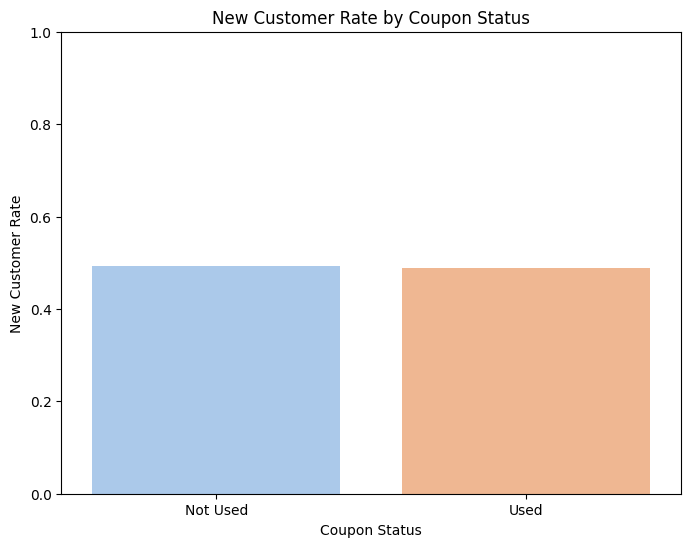

In [46]:
plt.figure(figsize=(8, 6))
sns.barplot(x=new_customer_rate.index, y=new_customer_rate.values, palette='pastel')
plt.title('New Customer Rate by Coupon Status')
plt.xlabel('Coupon Status')
plt.ylabel('New Customer Rate')
plt.ylim(0, 1)  # Since it's a rate, setting y-axis from 0 to 1 for better interpretation
plt.show()

In [47]:
# Calculate average ROI for each Coupon Status
roi_by_coupon = sales_data.groupby('coupon_status').agg(
    Avg_ROI=('ROI', 'mean')
).reset_index()

roi_by_coupon

coupon_status   Avg_ROI
0      Not Used  4.722314
1          Used  3.913313

/var/folders/cr/yg8f_zlx5w1_6mw1x0jdd6mr0000gn/T/ipykernel_67542/3509990815.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=roi_by_coupon, x='coupon_status', y='Avg_ROI', palette='pastel')


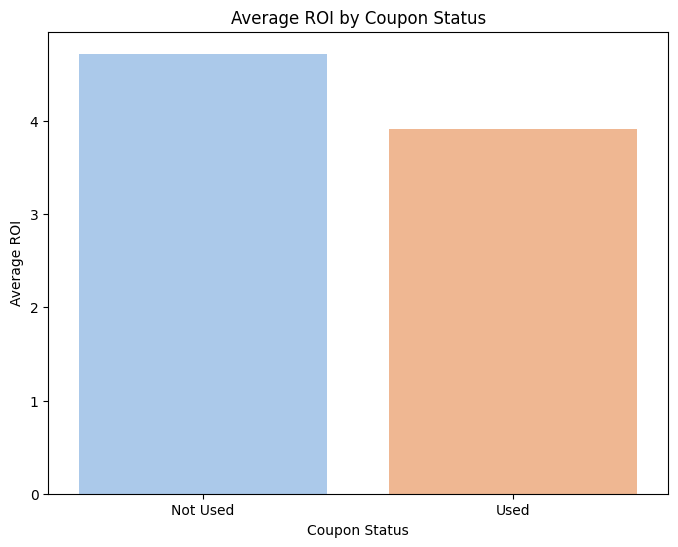

In [48]:
# Plot Average ROI by Coupon Status
plt.figure(figsize=(8, 6))
sns.barplot(data=roi_by_coupon, x='coupon_status', y='Avg_ROI', palette='pastel')
plt.title('Average ROI by Coupon Status')
plt.xlabel('Coupon Status')
plt.ylabel('Average ROI')
plt.show()

In [49]:
# Calculate average ROI_adjusted for each Coupon Status
roi_adjusted_by_coupon = sales_data.groupby('coupon_status').agg(
    Avg_ROI_Adjusted=('ROI_adjusted', 'mean')
).reset_index()

roi_adjusted_by_coupon

coupon_status  Avg_ROI_Adjusted
0      Not Used          5.750713
1          Used          4.761130

/var/folders/cr/yg8f_zlx5w1_6mw1x0jdd6mr0000gn/T/ipykernel_67542/932694957.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=roi_adjusted_by_coupon, x='coupon_status', y='Avg_ROI_Adjusted', palette='pastel')


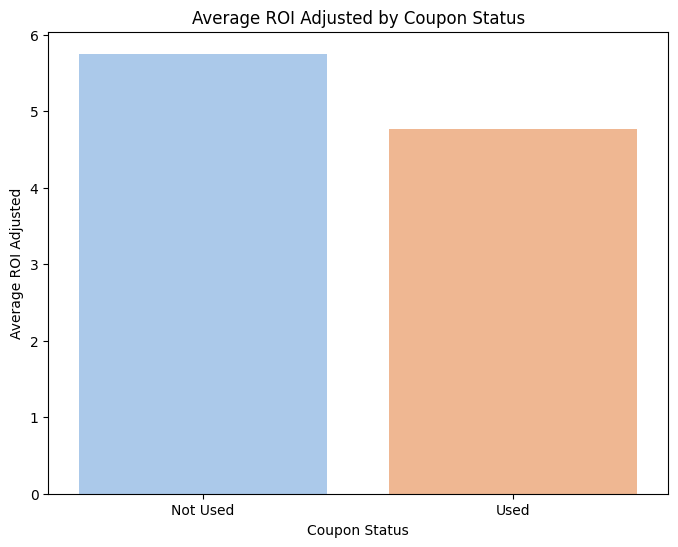

In [50]:
# Plot Average ROI_adjusted by Coupon Status
plt.figure(figsize=(8, 6))
sns.barplot(data=roi_adjusted_by_coupon, x='coupon_status', y='Avg_ROI_Adjusted', palette='pastel')
plt.title('Average ROI Adjusted by Coupon Status')
plt.xlabel('Coupon Status')
plt.ylabel('Average ROI Adjusted')
plt.show()

/var/folders/cr/yg8f_zlx5w1_6mw1x0jdd6mr0000gn/T/ipykernel_67542/1998691031.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=roi_by_coupon, x='coupon_status', y='Avg_ROI', palette='pastel')
/var/folders/cr/yg8f_zlx5w1_6mw1x0jdd6mr0000gn/T/ipykernel_67542/1998691031.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=roi_by_coupon, x='coupon_status', y='Avg_ROI_Adjusted', palette='pastel')


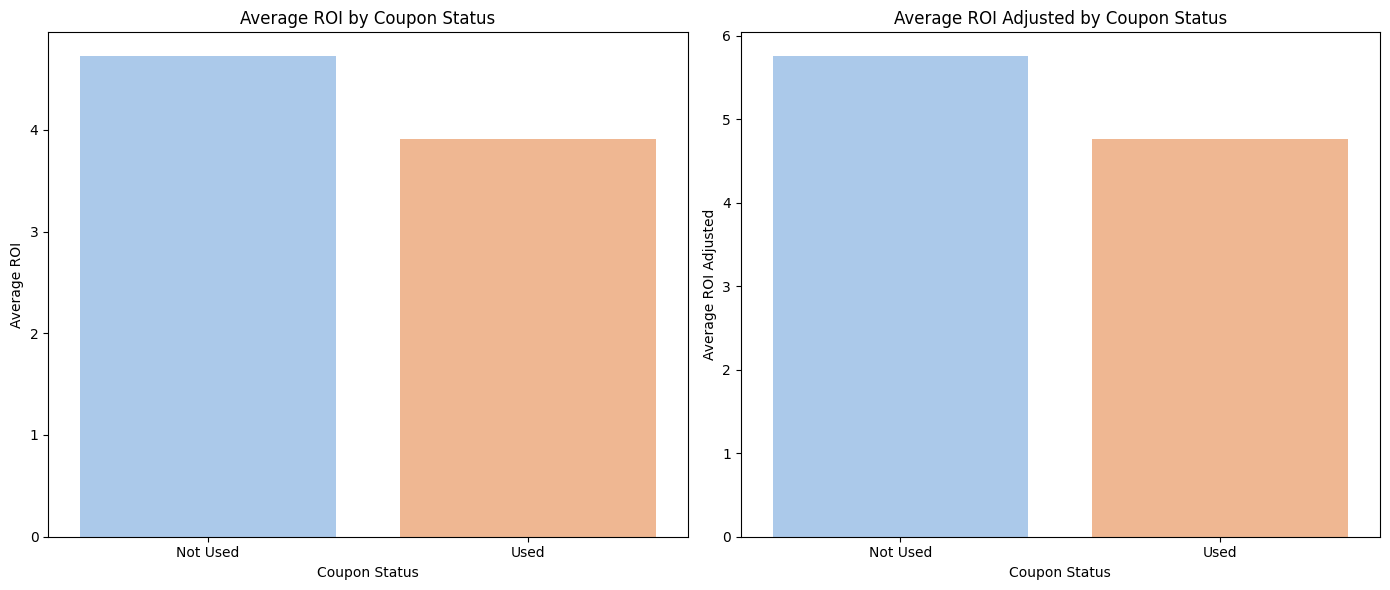

In [51]:
# Calculate average ROI and average ROI_adjusted for each Coupon Status
roi_by_coupon = sales_data.groupby('coupon_status').agg(
    Avg_ROI=('ROI', 'mean'),
    Avg_ROI_Adjusted=('ROI_adjusted', 'mean')
).reset_index()

# Create a side-by-side plot
plt.figure(figsize=(14, 6))

# Plot Average ROI by Coupon Status
plt.subplot(1, 2, 1)
sns.barplot(data=roi_by_coupon, x='coupon_status', y='Avg_ROI', palette='pastel')
plt.title('Average ROI by Coupon Status')
plt.xlabel('Coupon Status')
plt.ylabel('Average ROI')

# Plot Average ROI Adjusted by Coupon Status
plt.subplot(1, 2, 2)
sns.barplot(data=roi_by_coupon, x='coupon_status', y='Avg_ROI_Adjusted', palette='pastel')
plt.title('Average ROI Adjusted by Coupon Status')
plt.xlabel('Coupon Status')
plt.ylabel('Average ROI Adjusted')

plt.tight_layout()
plt.show()

Observation: While promotions may encourage purchases, they seem to lower the ROI. This could imply that although coupons boost sales volume, they may not be as profitable when ROI is taken into account. If the goal of Amazon is to maximize ROI, it might be beneficial to reconsider the scale or structure of coupon-based promotions. However, if the goal is more customer engagement or market share, promotions might still be justified despite a lower ROI. From the previous section, coupon usage has led to increased quantity purchased per transaction, which shows that coupon usage can promote more market share and customer loyalty.

### Analysis of Different Promotional Campaigns on Sales

In [52]:
coupon_revenue = sales_data.groupby(['coupon_code', 'coupon_status'])['discounted_revenue'].sum().reset_index()
coupon_revenue_pivot = coupon_revenue.pivot(index='coupon_code', columns='coupon_status', values='discounted_revenue').fillna(0)

# Calculate the impact (difference in revenue between "Used" and "Not Used")
coupon_revenue_pivot['Impact'] = coupon_revenue_pivot['Used'] - coupon_revenue_pivot['Not Used']
coupon_revenue_pivot['Percentage_Change'] = ((coupon_revenue_pivot['Used'] - coupon_revenue_pivot['Not Used']) / coupon_revenue_pivot['Not Used']) * 100

coupon_revenue_pivot = coupon_revenue_pivot.sort_values(by='Impact', ascending=False)
coupon_revenue_pivot

coupon_status     Not Used         Used       Impact  Percentage_Change
coupon_code                                                            
NJ20              8866.392    13475.872     4609.480          51.988227
ACC20             3538.624     4015.320      476.696          13.471225
GC30               125.804       62.895      -62.909         -50.005564
GC10               323.460      194.076     -129.384         -40.000000
GC20               282.792       57.520     -225.272         -79.659962
NJ30              4088.224     3066.406    -1021.818         -24.994178
ACC30             2904.447     1674.386    -1230.061         -42.350954
NCA30             2790.067     1446.284    -1343.783         -48.163109
NCA20             2353.584      982.680    -1370.904         -58.247507
AND20             2111.920      633.576    -1478.344         -70.000000
HOU30             2935.597     1396.864    -1538.733         -52.416357
AND10             2613.501      950.364    -1663.137         -63.636364
ACC10             5573.817     3606.975    -1966.842         -35.287165
AND30             2587.102      554.379    -2032.723         -78.571429
NCA10             3980.394     1721.322    -2259.072         -56.754985
HOU20             8293.880     2257.432    -6036.448         -72.781955
WEMP30           20200.670    13036.198    -7164.472         -35.466507
HOU10            14157.279     3255.192   -10902.087         -77.006938
NE10             21205.206     8534.988   -12670.218         -59.750507
NE30             28306.236    14427.196   -13879.040         -49.031740
NE20             29317.632    15420.696   -13896.936         -47.401291
HGEAR30          48994.232    29795.311   -19198.921         -39.186084
WEMP10           39858.219    20545.317   -19312.902         -48.454001
WEMP20           24801.816     4192.176   -20609.640         -83.097302
NJ10             34165.125    12041.406   -22123.719         -64.755270
BT30             66370.801    43315.979   -23054.822         -34.736393
HGEAR20          59448.464    32773.104   -26675.360         -44.871403
AIO30            82552.330    55379.863   -27172.467         -32.915445
HGEAR10          75348.216    39581.856   -35766.360         -47.468091
BT10             72339.363    30068.271   -42271.092         -58.434427
BT20             59562.168    11329.944   -48232.224         -80.977952
ELEC30          111817.391    57630.265   -54187.126         -48.460374
ELEC20          124972.904    61587.728   -63385.176         -50.719135
ELEC10          151854.579    73442.097   -78412.482         -51.636561
AIO20           150693.096    53947.216   -96745.880         -64.200605
AIO10           205437.330    92665.314  -112772.016         -54.893634
SALE10          968646.105   458769.123  -509876.982         -52.638108
SALE20         1052853.456   500816.096  -552037.360         -52.432497
OFF30          1466839.577   906679.396  -560160.181         -38.188237
SALE30         1062356.778   463982.526  -598374.252         -56.325169
OFF10          1482852.312   820306.089  -662546.223         -44.680527
EXTRA20        2115354.392  1220871.888  -894482.504         -42.285232
EXTRA30        2129740.886  1037571.934 -1092168.952         -51.281776
EXTRA10        3484044.486  2346613.659 -1137430.827         -32.646851
OFF20          2096373.136   806218.920 -1290154.216         -61.542203

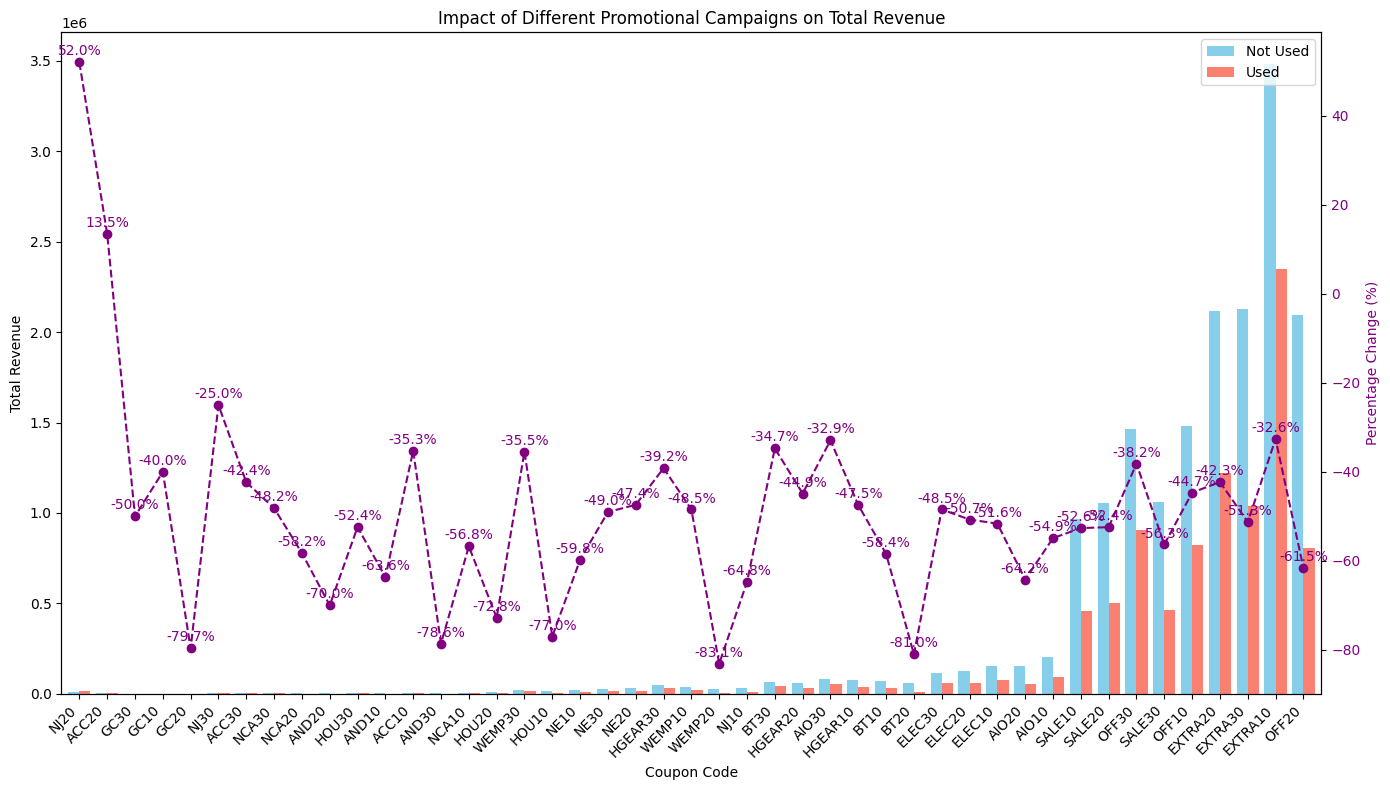

In [53]:
# Plot the bar chart for total revenue
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plotting the average revenue per transaction bar chart
coupon_revenue_pivot[['Not Used', 'Used']].plot(kind='bar', ax=ax1, color=['skyblue', 'salmon'], width=0.8)
ax1.set_title('Impact of Different Promotional Campaigns on Total Revenue')
ax1.set_xlabel('Coupon Code')
ax1.set_ylabel('Total Revenue')
ax1.legend(['Not Used', 'Used'], loc='upper right')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Create a secondary y-axis for the percentage change line plot
ax2 = ax1.twinx()
ax2.plot(coupon_revenue_pivot.index, coupon_revenue_pivot['Percentage_Change'], color='purple', marker='o', linestyle='--')
ax2.set_ylabel('Percentage Change (%)', color='purple')
ax2.tick_params(axis='y', labelcolor='purple')

# Annotate the percentage change values on the line plot
for i, (idx, pct) in enumerate(coupon_revenue_pivot['Percentage_Change'].items()):
    ax2.annotate(f'{pct:.1f}%', (i, pct), textcoords="offset points", xytext=(0,5), ha='center', color='purple')

plt.tight_layout()
plt.show()

Observation:
- Positive Impact of Specific Coupons: As the chart is sorted in decreasing order of absolute impact (change in total revenue with usage of coupons), NJ20 and ACC20 are the only coupon codes that generated increased total revenue upon usage of coupons

In [54]:
# Calculate total revenue and transaction count for each coupon_code and Coupon_Status
coupon_revenue_stats = sales_data.groupby(['coupon_code', 'coupon_status']).agg(
    total_revenue=('revenue', 'sum'),
    transaction_count=('transaction_id', 'nunique')
).reset_index()

# Calculate average revenue per transaction
coupon_revenue_stats['avg_revenue_per_transaction'] = (
    coupon_revenue_stats['total_revenue'] / coupon_revenue_stats['transaction_count']
)

coupon_avg_revenue = coupon_revenue_stats.pivot(index='coupon_code', columns='coupon_status', values='avg_revenue_per_transaction').fillna(0)
coupon_avg_revenue['Impact'] = coupon_avg_revenue['Used'] - coupon_avg_revenue['Not Used']

# Sort by impact in descending order
coupon_avg_revenue = coupon_avg_revenue.sort_values(by='Impact', ascending=False)

coupon_avg_revenue['Percentage_Change'] = ((coupon_avg_revenue['Used'] - coupon_avg_revenue['Not Used']) / coupon_avg_revenue['Not Used']) * 100

coupon_avg_revenue

coupon_status     Not Used         Used       Impact  Percentage_Change
coupon_code                                                            
BT30           1115.475647  1443.865967   328.390320          29.439488
NJ20             64.063526   130.833709    66.770183         104.224957
ACC10            72.860353   100.193750    27.333397          37.514774
ACC20            58.201053    78.731765    20.530712          35.275500
HGEAR20         437.121059   448.946630    11.825571           2.705331
GC10              6.655556     5.545029    -1.110527         -16.685714
GC30              9.458947     6.289500    -3.169447         -33.507400
NJ30             58.993131    53.796596    -5.196535          -8.808712
GC20             12.189310     5.229091    -6.960219         -57.101011
ACC30            56.070405    47.839600    -8.230805         -14.679411
NCA20            53.490545    44.667273    -8.823273         -16.495014
NCA10            62.290986    52.161273   -10.129713         -16.261925
ELEC10           60.389159    48.032765   -12.356394         -20.461279
NE20             78.980690    65.341932   -13.638757         -17.268471
NCA30            57.765362    43.826788   -13.938574         -24.129641
ELEC20           58.727868    43.341118   -15.386751         -26.200084
ELEC30           58.533943    39.338065   -19.195878         -32.794439
NE10             80.414130    60.964200   -19.449930         -24.187204
NE30             65.432816    45.226320   -20.206496         -30.881287
WEMP30          274.839048   250.696115   -24.142932          -8.784389
AIO30           321.340327   274.157738   -47.182589         -14.683059
AND10           290.389000   237.591000   -52.798000         -18.181818
AND20           263.990000   211.192000   -52.798000         -20.000000
HGEAR10         526.542390   434.965451   -91.576939         -17.392130
NJ10            237.257812   140.016349   -97.241464         -40.985569
AND30           284.296923   184.793000   -99.503923         -35.000000
HGEAR30         469.743356   367.843346  -101.900010         -21.692699
HOU10           476.676061   361.688000  -114.988061         -24.122894
HOU20           287.981944   161.245143  -126.736802         -44.008593
WEMP10          503.260341   366.880661  -136.379680         -27.099231
HOU30           246.688824   107.451077  -139.237747         -56.442665
AIO10           573.526884   421.205973  -152.320912         -26.558635
SALE10          530.968648   344.162883  -186.805765         -35.182071
WEMP20          254.116967    64.495015  -189.621952         -74.619949
AIO20           491.818198   271.091538  -220.726661         -44.879726
SALE20          567.270181   335.892754  -231.377427         -40.787871
BT10            873.663804   639.750447  -233.913358         -26.773841
EXTRA10        4062.078216  3809.437758  -252.640458          -6.219488
OFF10          1743.506540  1402.232631  -341.273909         -19.573996
SALE30          704.574067   324.463305  -380.110762         -53.949014
BT20            919.169259   333.233647  -585.935612         -63.746215
OFF30          2397.580217  1679.035919  -718.544299         -29.969562
EXTRA20        2824.992511  2024.663164  -800.329347         -28.330317
OFF20          2741.073661  1334.799536 -1406.274125         -51.303770
EXTRA30        3575.190341  1924.994312 -1650.196029         -46.156872

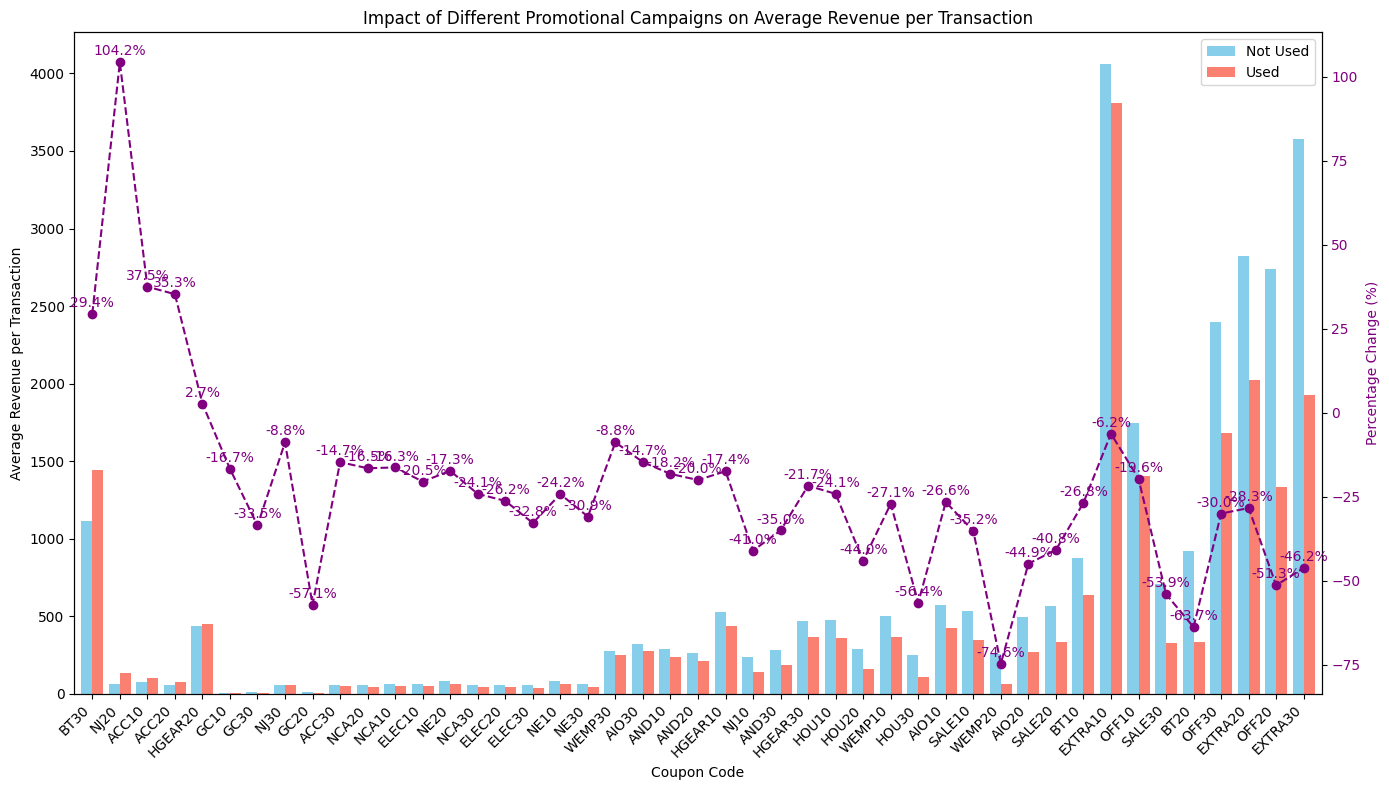

In [55]:
# Plot the bar chart for average revenue per transaction
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plotting the average revenue per transaction bar chart
coupon_avg_revenue[['Not Used', 'Used']].plot(kind='bar', ax=ax1, color=['skyblue', 'salmon'], width=0.8)
ax1.set_title('Impact of Different Promotional Campaigns on Average Revenue per Transaction')
ax1.set_xlabel('Coupon Code')
ax1.set_ylabel('Average Revenue per Transaction')
ax1.legend(['Not Used', 'Used'], loc='upper right')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Create a secondary y-axis for the percentage change line plot
ax2 = ax1.twinx()
ax2.plot(coupon_avg_revenue.index, coupon_avg_revenue['Percentage_Change'], color='purple', marker='o', linestyle='--')
ax2.set_ylabel('Percentage Change (%)', color='purple')
ax2.tick_params(axis='y', labelcolor='purple')

# Annotate the percentage change values on the line plot
for i, (idx, pct) in enumerate(coupon_avg_revenue['Percentage_Change'].items()):
    ax2.annotate(f'{pct:.1f}%', (i, pct), textcoords="offset points", xytext=(0,5), ha='center', color='purple')

plt.tight_layout()
plt.show()

Observation:
- Positive Impact of Specific Coupons: Certain coupon codes (BT30, NJ20, ACC10, ACC20, HGEAR20) show an increase in average revenue per transaction when used. The bar heights and the positive percentage change suggest that these coupons likely encourage higher spending per transaction compared to when the coupon is not used. These are the promotional campaigns that promotes increased expenditure from customers

In [56]:
# Group by Coupon_Code and Coupon_Status to calculate total transactions
coupon_total_transactions = (
    sales_data.groupby(['coupon_code', 'coupon_status'])['transaction_id']
    .nunique()  # Count unique transactions
    .reset_index()
    .pivot(index='coupon_code', columns='coupon_status', values='transaction_id')
    .fillna(0)
)

coupon_total_transactions['Impact'] = coupon_total_transactions['Used'] - coupon_total_transactions['Not Used']

# Sort by the change in descending order
coupon_total_transactions = coupon_total_transactions.sort_values(by='Impact', ascending=False)
coupon_total_transactions

coupon_status  Not Used  Used  Impact
coupon_code                          
HOU30                17    13      -4
AND10                10     4      -6
AND20                10     3      -7
GC30                 19    10      -9
AND30                13     3     -10
GC20                 29    11     -18
GC10                 54    35     -19
HOU20                36    14     -22
HOU10                33     9     -24
ACC20                76    51     -25
WEMP10               88    56     -32
NCA20                55    22     -33
NCA30                69    33     -36
NCA10                71    33     -38
ACC30                74    35     -39
NJ30                 99    57     -42
BT10                 92    47     -45
BT20                 81    34     -47
ACC10                85    36     -49
WEMP30              105    52     -53
BT30                 85    30     -55
WEMP20              122    65     -57
HGEAR30             149    81     -68
HGEAR10             159    91     -68
NJ20                173   103     -70
NJ10                160    86     -74
HGEAR20             170    73     -97
NE10                293   140    -153
AIO30               367   202    -165
AIO10               398   220    -178
AIO20               383   199    -184
NE20                464   236    -228
NE30                618   319    -299
EXTRA30             851   539    -312
EXTRA20             936   603    -333
OFF30               874   540    -334
EXTRA10             953   616    -337
OFF20               956   604    -352
OFF10               945   585    -360
SALE10             2027  1333    -694
SALE30             2154  1430    -724
SALE20             2320  1491    -829
ELEC20             2660  1421   -1239
ELEC30             2729  1465   -1264
ELEC10             2794  1529   -1265

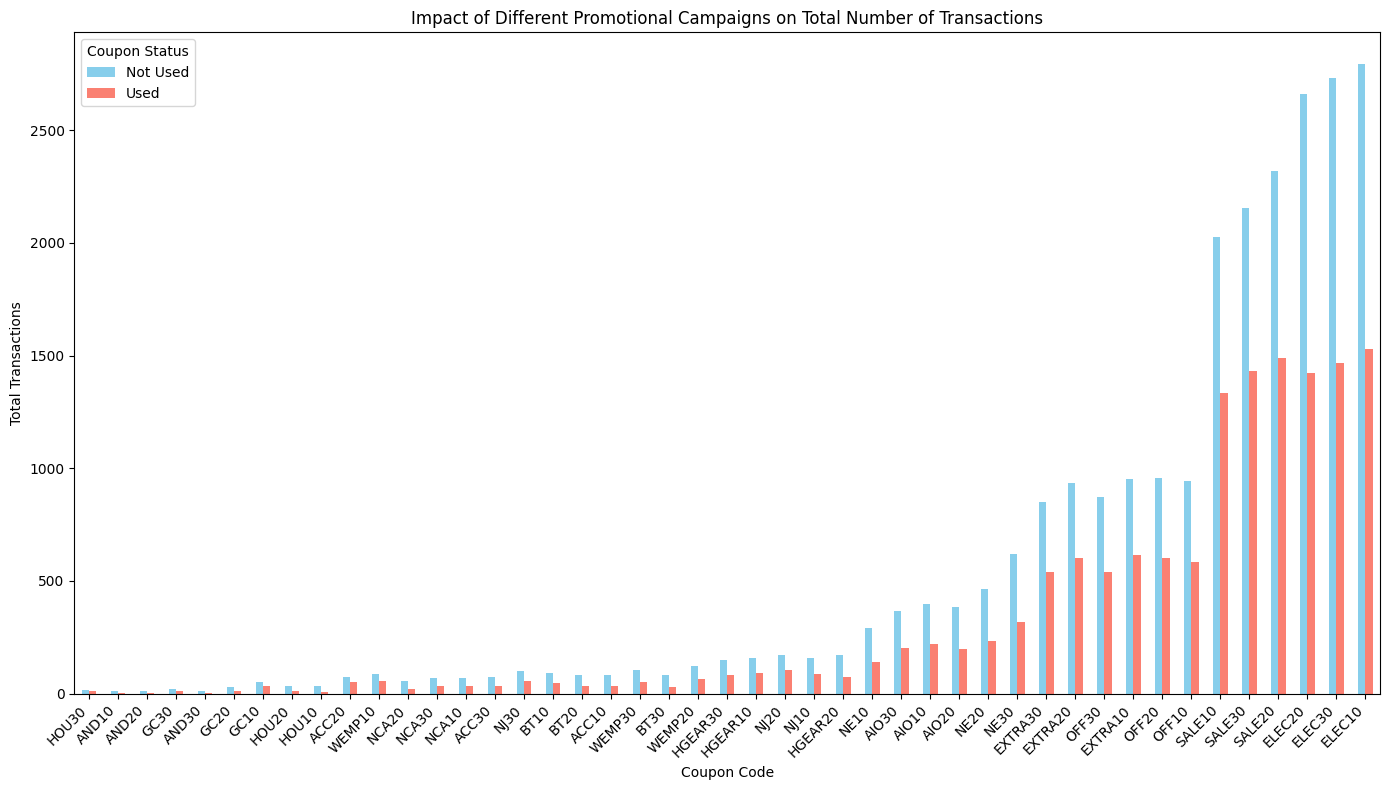

In [57]:
# Plot the results
fig, ax = plt.subplots(figsize=(14, 8))

# Plotting the bar chart for total transactions
coupon_total_transactions[['Not Used', 'Used']].plot(kind='bar', stacked=False, ax=ax, color=['skyblue', 'salmon'])

# Customizing the plot
ax.set_title("Impact of Different Promotional Campaigns on Total Number of Transactions")
ax.set_xlabel("Coupon Code")
ax.set_ylabel("Total Transactions")
ax.legend(title="Coupon Status", loc='upper left')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Observation:
- There are fewer transactions for the "Used" coupon status across all coupon codes. This suggests that there may potentially be promotion strategy issues such as coupon use being limited to only a subset of customers or specific products, fewer transactions may involve a coupon. There may also be barriers present such as the redemption process for coupons being too complex or inconvenient or insufficient awareness or appeal for coupon usage

In [58]:
# Calculate repeat customer rate by coupon_code and Coupon_Status
repeat_customers = sales_data.groupby(['user_id', 'coupon_code', 'coupon_status'])['transaction_id'].nunique().reset_index(name='Unique_Transactions')
repeat_customers['Is_Repeat_Customer'] = repeat_customers['Unique_Transactions'] > 1
repeat_rate = repeat_customers.groupby(['coupon_code', 'coupon_status'])['Is_Repeat_Customer'].mean().unstack().fillna(0)

# Calculate percentage change between 'Not Used' and 'Used'
repeat_rate['Percentage_Change'] = ((repeat_rate['Used'] - repeat_rate['Not Used']) / repeat_rate['Not Used']) * 100

# Remove NaN values and sort by Percentage Change in descending order
repeat_rate = repeat_rate.dropna(subset=['Percentage_Change']).sort_values(by='Percentage_Change', ascending=False)

repeat_rate

coupon_status  Not Used      Used  Percentage_Change
coupon_code                                         
GC20           0.200000  0.250000          25.000000
ACC20          0.107692  0.133333          23.809524
GC10           0.280000  0.294118           5.042017
BT20           0.097222  0.096774          -0.460829
WEMP10         0.148649  0.145833          -1.893939
NE10           0.504132  0.478873          -5.010390
ACC10          0.135135  0.125000          -7.500000
SALE20         0.736940  0.667364          -9.441237
OFF10          0.487179  0.435976         -10.510270
SALE10         0.696364  0.608696         -12.589397
SALE30         0.701695  0.603053         -14.057602
NE20           0.584795  0.500000         -14.500000
ELEC30         0.779310  0.663158         -14.904518
ELEC10         0.796190  0.677273         -14.935842
ELEC20         0.814050  0.673810         -17.227460
EXTRA10        0.546341  0.438272         -19.780644
OFF30          0.515663  0.401274         -22.182868
OFF20          0.588689  0.450151         -23.533292
NE30           0.641148  0.481250         -24.939366
EXTRA20        0.566502  0.419255         -25.992439
NJ20           0.242424  0.178571         -26.339286
EXTRA30        0.512315  0.372240         -27.341665
AIO20          0.357724  0.244898         -31.539889
WEMP20         0.211111  0.132075         -37.437934
AIO30          0.385650  0.226027         -41.390570
HGEAR10        0.225806  0.125000         -44.642857
BT10           0.229730  0.119048         -48.179272
AIO10          0.380753  0.191358         -49.742233
ACC30          0.058824  0.029412         -50.000000
NJ30           0.192308  0.096154         -50.000000
HGEAR30        0.200000  0.098592         -50.704225
NJ10           0.253968  0.125000         -50.781250
NCA30          0.137931  0.062500         -54.687500
WEMP30         0.195402  0.083333         -57.352941
HGEAR20        0.228346  0.073529         -67.799189
BT30           0.136986  0.034483         -74.827586
NCA20          0.056604  0.000000        -100.000000
GC30           0.133333  0.000000        -100.000000
NCA10          0.175439  0.000000        -100.000000
HOU20          0.028571  0.000000        -100.000000
HOU10          0.100000  0.000000        -100.000000

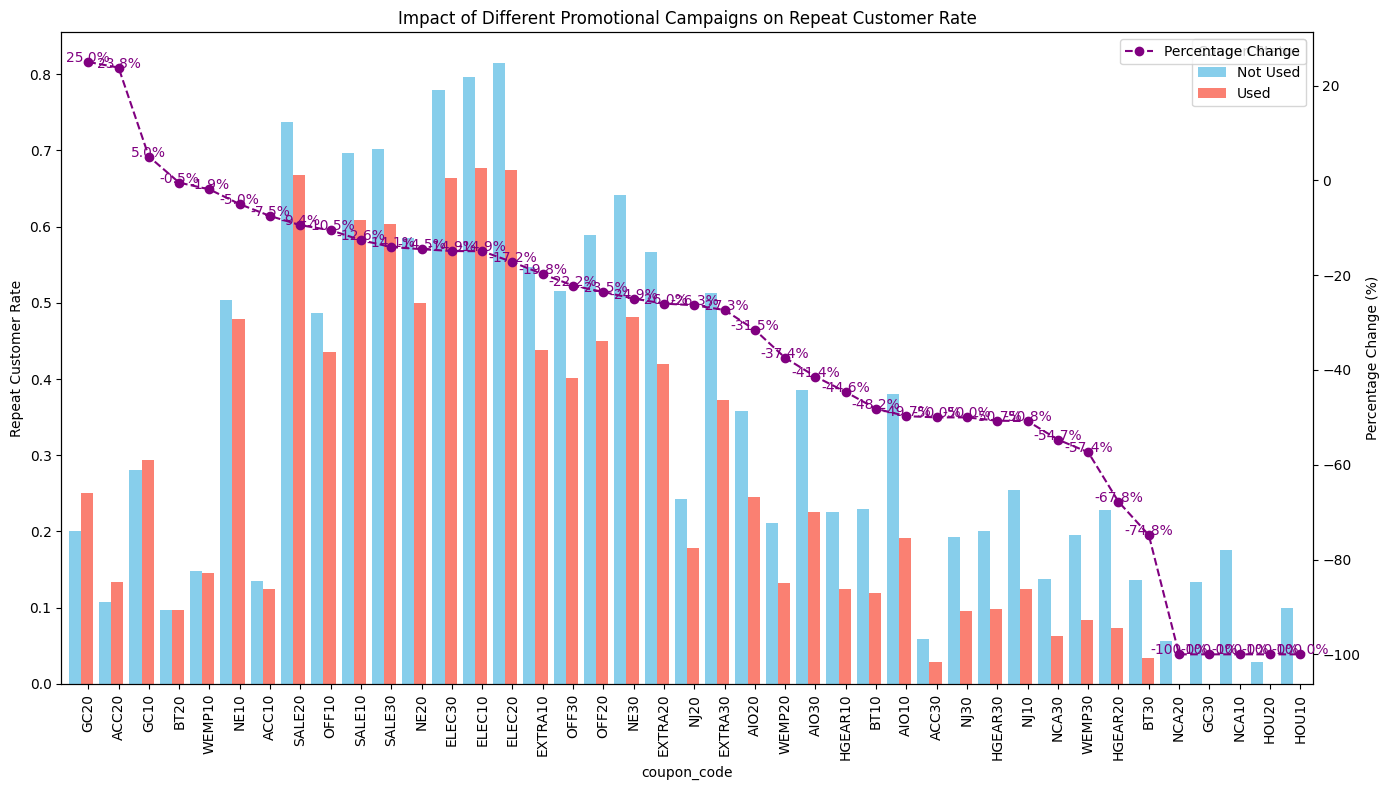

In [59]:
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot Repeat Customer Rate
repeat_rate[['Not Used', 'Used']].plot(kind='bar', ax=ax1, color=['skyblue', 'salmon'], position=0.8, width=0.8)
ax1.set_ylabel("Repeat Customer Rate")
ax1.set_title("Impact of Different Promotional Campaigns on Repeat Customer Rate")
ax1.legend(title="Coupon Status")

# Plot Percentage Change on Secondary Axis
ax2 = ax1.twinx()
ax2.plot(repeat_rate.index, repeat_rate['Percentage_Change'], color='purple', marker='o', linestyle='--', label='Percentage Change')
ax2.set_ylabel("Percentage Change (%)")
ax2.legend(loc="upper right")

# Display percentage change as labels on the line plot
for i, txt in enumerate(repeat_rate['Percentage_Change']):
    ax2.annotate(f"{txt:.1f}%", (i, repeat_rate['Percentage_Change'].iloc[i]), color="purple", ha="center")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Observation:
- Specific coupon code (GC20, ACC20, GC10) has an increase in repeat customers using the coupons, proving that these promotional campaigns are enticing customers to return to purchase more products

In [60]:
# Calculate the average product variety per transaction by coupon_code and Coupon_Status
product_variety = sales_data.groupby(['transaction_id', 'coupon_code', 'coupon_status'])['product_id'].nunique().reset_index(name='Product_Variety')
avg_product_variety = product_variety.groupby(['coupon_code', 'coupon_status'])['Product_Variety'].mean().unstack().fillna(0)
avg_product_variety['Percentage_Change'] = ((avg_product_variety['Used'] - avg_product_variety['Not Used']) / avg_product_variety['Not Used']) * 100

# Remove NaN values and sort by Percentage Change in descending order
avg_product_variety = avg_product_variety.dropna(subset=['Percentage_Change']).sort_values(by='Percentage_Change', ascending=False)
avg_product_variety

coupon_status  Not Used      Used  Percentage_Change
coupon_code                                         
WEMP10         1.818182  2.053571          12.946429
HGEAR20        1.158824  1.191781           2.844030
WEMP30         1.685714  1.730769           2.672751
NJ30           1.030303  1.035088           0.464396
AND10          1.000000  1.000000           0.000000
GC30           1.000000  1.000000           0.000000
GC10           1.000000  1.000000           0.000000
GC20           1.000000  1.000000           0.000000
HOU20          1.000000  1.000000           0.000000
BT20           1.000000  1.000000           0.000000
AND30          1.000000  1.000000           0.000000
AND20          1.000000  1.000000           0.000000
HOU10          1.000000  1.000000           0.000000
HOU30          1.000000  1.000000           0.000000
NE20           1.058190  1.055085          -0.293417
NJ20           1.040462  1.029126          -1.089536
NCA30          1.072464  1.060606          -1.105651
ACC10          1.047059  1.027778          -1.841448
BT10           1.021739  1.000000          -2.127660
BT30           1.023529  1.000000          -2.298851
HGEAR30        1.100671  1.074074          -2.416441
AIO30          1.098093  1.059406          -3.523082
ACC20          1.078947  1.039216          -3.682449
ELEC30         1.093807  1.053242          -3.708600
ELEC10         1.098067  1.052322          -4.166002
AIO10          1.110553  1.063636          -4.224599
NE30           1.088997  1.034483          -5.005892
ELEC20         1.107143  1.047150          -5.418719
NE10           1.071672  1.007143          -6.021383
HGEAR10        1.194969  1.109890          -7.119722
NCA10          1.112676  1.030303          -7.403145
NJ10           1.106250  1.023256          -7.502299
ACC30          1.094595  1.000000          -8.641975
AIO20          1.151436  1.030151         -10.533393
NCA20          1.181818  1.045455         -11.538462
OFF30          1.441648  1.274074         -11.623751
OFF20          1.421548  1.253311         -11.834764
EXTRA30        1.364277  1.202226         -11.878155
EXTRA20        1.310897  1.154229         -11.951246
OFF10          1.460317  1.261538         -13.612040
EXTRA10        1.351522  1.159091         -14.238072
SALE20         1.669828  1.389001         -16.817719
SALE30         1.618849  1.343357         -17.017774
SALE10         1.725210  1.414854         -17.989463
WEMP20         1.606557  1.200000         -25.306122

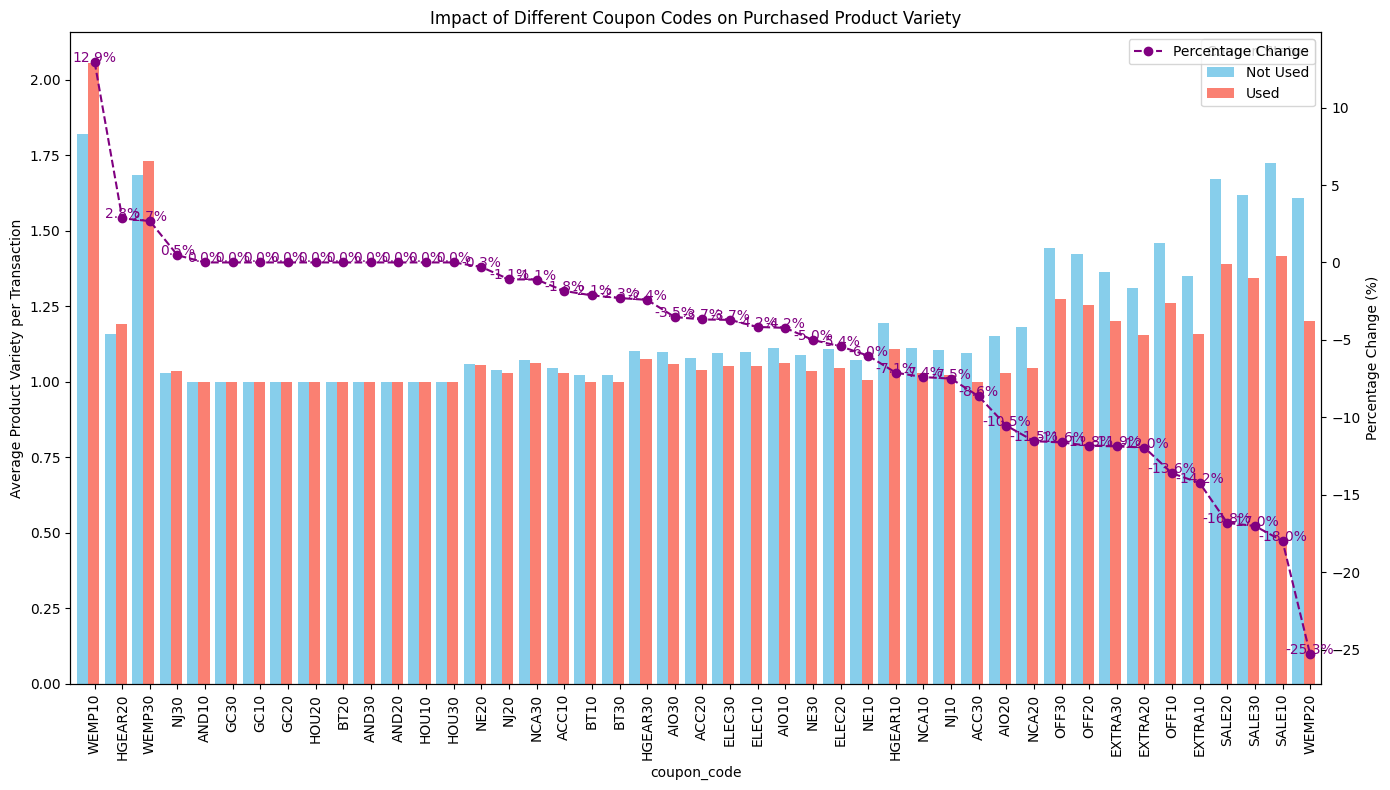

In [61]:
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot Average Product Variety
avg_product_variety[['Not Used', 'Used']].plot(kind='bar', ax=ax1, color=['skyblue', 'salmon'], position=0.8, width=0.8)
ax1.set_ylabel("Average Product Variety per Transaction")
ax1.set_title("Impact of Different Coupon Codes on Purchased Product Variety")
ax1.legend(title="Coupon Status")

# Plot Percentage Change on Secondary Axis
ax2 = ax1.twinx()
ax2.plot(avg_product_variety.index, avg_product_variety['Percentage_Change'], color='purple', marker='o', linestyle='--', label='Percentage Change')
ax2.set_ylabel("Percentage Change (%)")
ax2.legend(loc="upper right")

# Display percentage change as labels on the line plot
for i, txt in enumerate(avg_product_variety['Percentage_Change']):
    ax2.annotate(f"{txt:.1f}%", (i, avg_product_variety['Percentage_Change'].iloc[i]), color="purple", ha="center")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [62]:
# Calculate the new customer rate for each discount code and coupon status
new_customer_rate = sales_data.groupby(['coupon_code', 'coupon_status'])['Is_First_Purchase'].mean().unstack().fillna(0)

# Calculate the percentage change between "Not Used" and "Used" for each discount code
new_customer_rate['Percentage_Change'] = ((new_customer_rate['Used'] - new_customer_rate['Not Used']) / new_customer_rate['Not Used']) * 100

# Remove NaN values and sort by Percentage Change in descending order
new_customer_rate = new_customer_rate.dropna(subset=['Percentage_Change']).sort_values(by='Percentage_Change', ascending=False)

new_customer_rate

coupon_status  Not Used      Used  Percentage_Change
coupon_code                                         
AND10          0.300000  1.000000         233.333333
AND30          0.461538  0.666667          44.444444
GC20           0.448276  0.636364          41.958042
HOU10          0.393939  0.555556          41.025641
NE10           0.375796  0.496454          32.107224
HGEAR20        0.411168  0.528736          28.593728
NCA30          0.513514  0.628571          22.406015
NJ30           0.485437  0.593220          22.203390
HGEAR10        0.468421  0.554455          18.366893
NCA20          0.446154  0.521739          16.941529
BT30           0.494253  0.566667          14.651163
AND20          0.600000  0.666667          11.111111
NCA10          0.481013  0.529412          10.061920
BT10           0.468085  0.510638           9.090909
ACC10          0.382022  0.405405           6.120827
OFF20          0.494860  0.519104           4.899075
HOU30          0.588235  0.615385           4.615385
HOU20          0.555556  0.571429           2.857143
SALE10         0.476406  0.489742           2.799394
OFF10          0.509677  0.522788           2.572369
AIO10          0.480813  0.491453           2.212993
ACC30          0.419753  0.428571           2.100840
WEMP20         0.454082  0.461538           1.642178
NE30           0.344725  0.348485           1.090648
ELEC30         0.475585  0.480570           1.048111
SALE30         0.482651  0.486010           0.696078
HGEAR30        0.536585  0.540230           0.679206
ELEC20         0.500847  0.498656          -0.437396
ELEC10         0.550065  0.546526          -0.643372
NE20           0.391039  0.381526          -2.432647
OFF30          0.512195  0.491304          -4.078675
AIO20          0.527027  0.502439          -4.665416
GC30           0.210526  0.200000          -5.000000
SALE20         0.506663  0.473634          -6.519024
EXTRA20        0.510417  0.476529          -6.639185
ACC20          0.487805  0.452830          -7.169811
EXTRA10        0.477829  0.436893          -8.566990
BT20           0.518519  0.470588          -9.243697
EXTRA30        0.534410  0.482335          -9.744334
AIO30          0.486352  0.437209         -10.104414
WEMP30         0.564972  0.488889         -13.466667
NJ10           0.434066  0.370787         -14.578296
NJ20           0.516484  0.401869         -22.191291
WEMP10         0.675000  0.504348         -25.281804
GC10           0.314815  0.200000         -36.470588

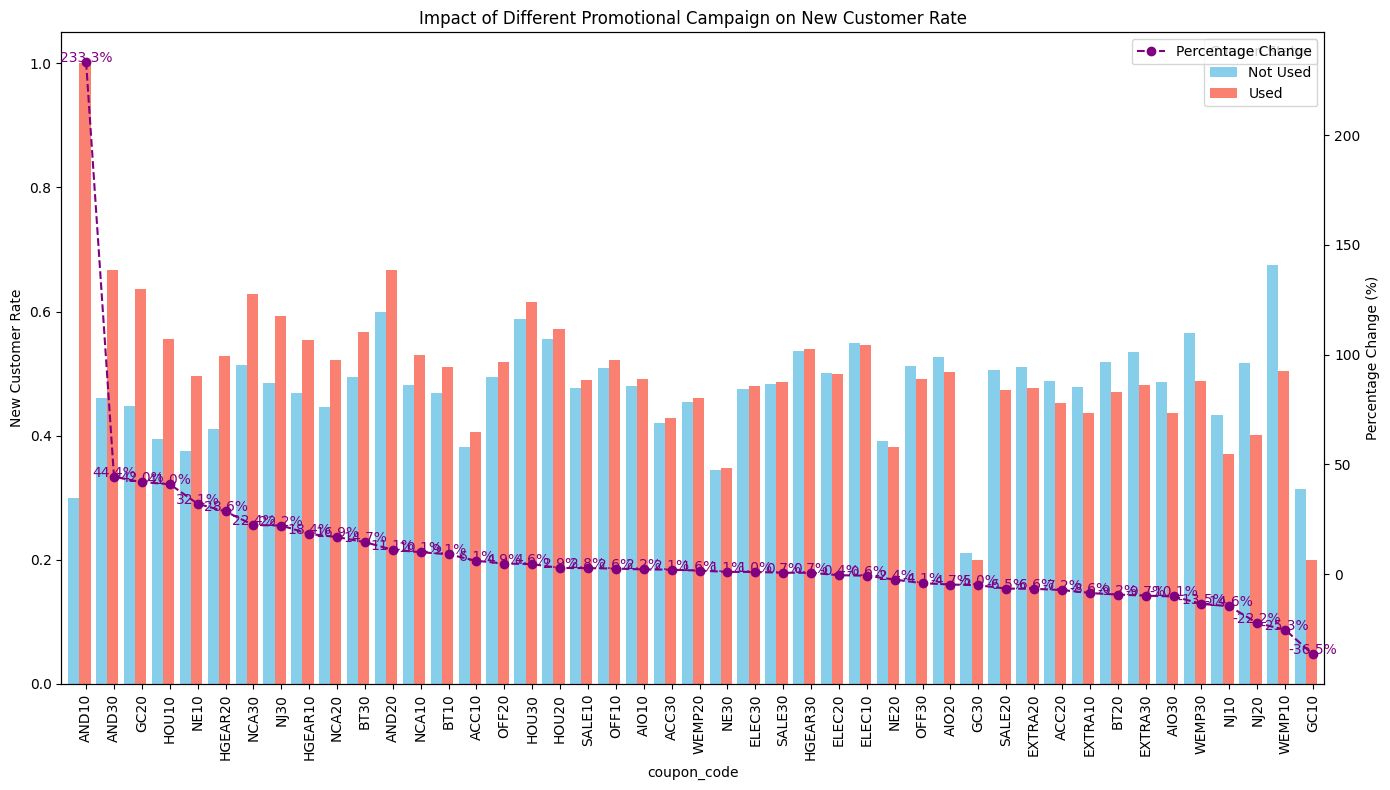

In [63]:
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot New Customer Rate
new_customer_rate[['Not Used', 'Used']].plot(kind='bar', ax=ax1, color=['skyblue', 'salmon'], position=0.8, width=0.8)
ax1.set_ylabel("New Customer Rate")
ax1.set_title("Impact of Different Promotional Campaign on New Customer Rate")
ax1.legend(title="Coupon Status")

# Plot Percentage Change on Secondary Axis
ax2 = ax1.twinx()
ax2.plot(new_customer_rate.index, new_customer_rate['Percentage_Change'], color='purple', marker='o', linestyle='--', label='Percentage Change')
ax2.set_ylabel("Percentage Change (%)")
ax2.legend(loc="upper right")

# Display percentage change as labels on the line plot
for i, txt in enumerate(new_customer_rate['Percentage_Change']):
    ax2.annotate(f"{txt:.1f}%", (i, new_customer_rate['Percentage_Change'].iloc[i]), color="purple", ha="center")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Observation: 
- Large Percentage Change for Specific Codes: The purple dashed line showing the percentage change in new customer rates indicates that some coupons have a substantial positive impact on attracting new customers. For example, AND10 has a high percentage change, showing that this coupon code is particularly effective in attracting new customers when used.

In [64]:
# Calculate the percentage change in ROI between "Used" and "Not Used"
coupon_roi = sales_data.groupby(['coupon_code', 'coupon_status'])['ROI'].mean().unstack()
coupon_roi['Percentage_Change'] = ((coupon_roi['Used'] - coupon_roi['Not Used']) / coupon_roi['Not Used']) * 100
coupon_roi = coupon_roi.sort_values(by='Percentage_Change', ascending=False)

coupon_roi

coupon_status  Not Used      Used  Percentage_Change
coupon_code                                         
HGEAR10        6.948374  6.823275          -1.800400
ACC10          6.646082  6.466926          -2.695656
WEMP10         7.858584  7.562188          -3.771625
EXTRA10        7.815373  7.213549          -7.700517
BT10           8.900563  8.155830          -8.367260
AIO10          7.068845  6.448437          -8.776644
NCA10          7.988349  7.272537          -8.960705
NE10           7.274110  6.543641         -10.042039
AND10          9.652933  8.671521         -10.166982
HOU10          8.413299  7.503261         -10.816657
SALE10         6.590929  5.862143         -11.057407
ELEC10         7.904160  7.005380         -11.370969
GC10           3.878673  3.415308         -11.946498
OFF10          6.862850  5.923168         -13.692298
NJ20           3.196284  2.634429         -17.578387
NCA20          4.350518  3.581166         -17.684152
AIO20          4.128258  3.364394         -18.503299
EXTRA20        4.297893  3.500051         -18.563569
HOU20          4.530219  3.656126         -19.294724
SALE20         3.843098  3.084578         -19.737196
ELEC20         4.341359  3.482817         -19.775867
NE20           3.951765  3.169676         -19.790871
NJ10           6.114170  4.899748         -19.862413
AND20          4.907060  3.925648         -20.000000
HGEAR20        3.887358  3.102699         -20.184902
ACC20          4.080298  3.222022         -21.034658
OFF20          3.931268  3.087745         -21.456768
BT20           4.766454  3.732157         -21.699505
WEMP20         4.275461  3.276631         -23.361939
GC20           3.071777  2.238652         -27.121933
NJ30           2.380421  1.729476         -27.345763
ACC30          2.839204  2.039070         -28.181648
OFF30          2.748439  1.955240         -28.859989
AIO30          2.898629  2.059942         -28.933921
WEMP30         2.998491  2.130368         -28.951993
GC30           2.290569  1.619296         -29.305976
BT30           3.207208  2.266762         -29.322887
SALE30         2.775954  1.954768         -29.582112
NE30           2.759443  1.940375         -29.682356
ELEC30         3.033668  2.123130         -30.014440
AND30          3.293358  2.304238         -30.033765
NCA30          3.054419  2.136416         -30.054912
EXTRA30        2.917775  2.025777         -30.571169
HGEAR30        2.823834  1.945308         -31.111110
HOU30          3.173537  2.153184         -32.151895

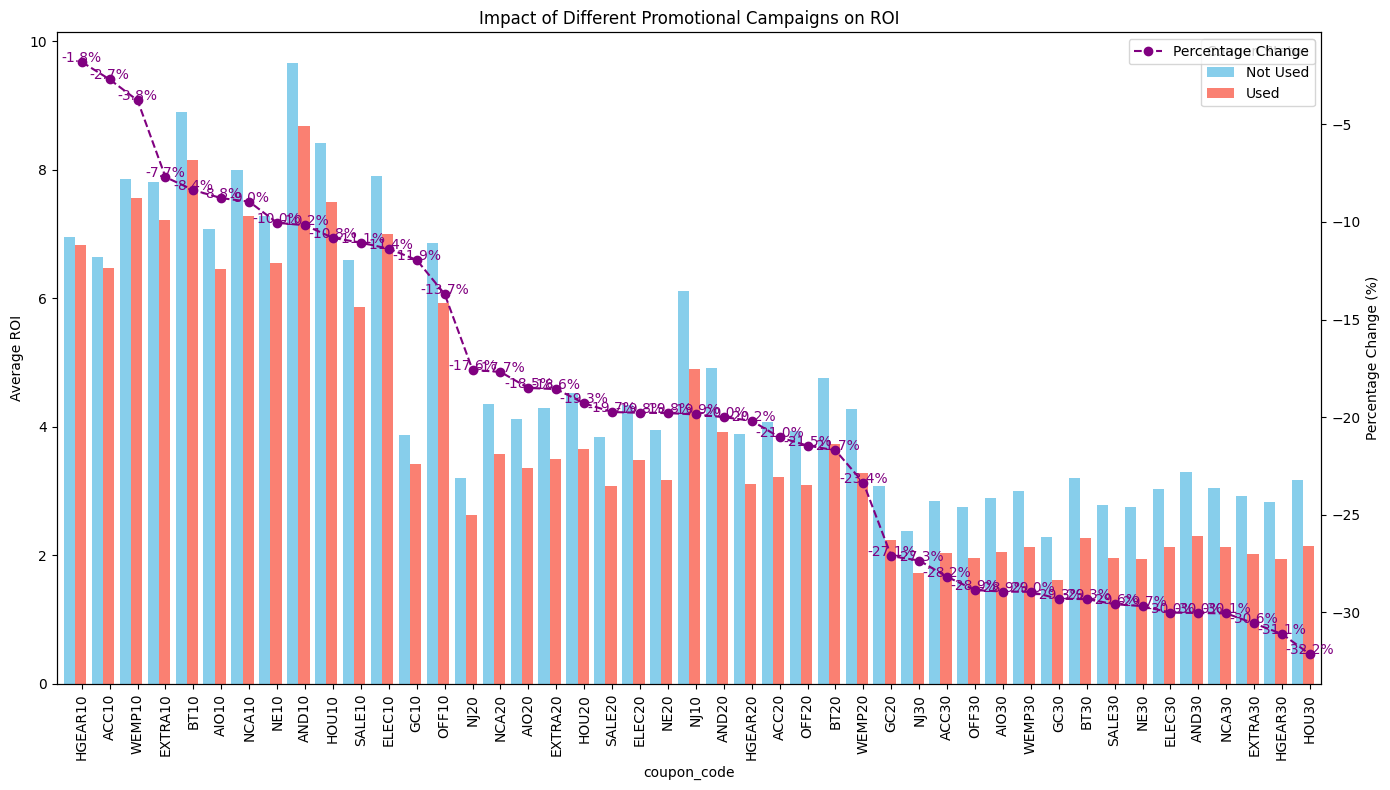

In [65]:
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot ROI for "Not Used" and "Used" as side-by-side bars
coupon_roi[['Not Used', 'Used']].plot(kind='bar', ax=ax1, color=['skyblue', 'salmon'], position=0.8, width=0.8)
ax1.set_ylabel("Average ROI")
ax1.set_title("Impact of Different Promotional Campaigns on ROI")
ax1.legend(title="Coupon Status")

# Plot percentage change on the secondary y-axis
ax2 = ax1.twinx()
ax2.plot(coupon_roi.index, coupon_roi['Percentage_Change'], color='purple', marker='o', linestyle='--', label='Percentage Change')
ax2.set_ylabel("Percentage Change (%)")
ax2.legend(loc="upper right")

# Display percentage change as labels on the line plot
for i, txt in enumerate(coupon_roi['Percentage_Change'].round(1)):
    ax2.annotate(f"{txt}%", (i, coupon_roi['Percentage_Change'].iloc[i]), color="purple", ha="center")

# Adjust x-axis for better readability
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [66]:
# Calculate the percentage change in adjusted ROI between "Used" and "Not Used"
coupon_adj_roi = sales_data.groupby(['coupon_code', 'coupon_status'])['ROI_adjusted'].mean().unstack()
coupon_adj_roi['Percentage_Change'] = ((coupon_adj_roi['Used'] - coupon_adj_roi['Not Used']) / coupon_adj_roi['Not Used']) * 100

# Sort by percentage change for easier interpretation
coupon_adj_roi = coupon_adj_roi.sort_values(by='Percentage_Change', ascending=False)
coupon_adj_roi

coupon_status   Not Used       Used  Percentage_Change
coupon_code                                           
HGEAR10         8.444468   8.113445          -3.919997
NCA10           9.509059   9.135890          -3.924346
WEMP10          9.728806   9.284863          -4.563185
ACC10           8.363465   7.903727          -5.496985
BT10           10.605783   9.977777          -5.921358
AIO10           8.606616   7.989625          -7.168799
EXTRA10         9.581362   8.803213          -8.121483
NE10            8.876310   8.104713          -8.692765
HOU20           5.498223   4.919579         -10.524208
SALE10          8.041100   7.178231         -10.730732
GC10            4.767069   4.196195         -11.975364
HOU10          10.241223   9.001995         -12.100395
ELEC10          9.626922   8.460563         -12.115600
OFF10           8.387484   7.167806         -14.541637
AND10          12.508243  10.621406         -15.084749
NJ20            3.834559   3.234726         -15.642817
NCA20           4.956532   4.136367         -16.547145
EXTRA20         5.184902   4.238091         -18.260923
HGEAR20         4.630063   3.784036         -18.272475
AND20           5.882300   4.789051         -18.585404
SALE20          4.655173   3.752187         -19.397487
ELEC20          5.245529   4.226819         -19.420545
NJ10            7.435821   5.953283         -19.937792
OFF20           4.801862   3.791222         -21.046850
AIO20           5.080441   4.007007         -21.128747
NE20            4.821144   3.768612         -21.831584
AND30           4.281546   3.319827         -22.461946
BT20            5.737761   4.389643         -23.495550
WEMP20          5.143549   3.915039         -23.884476
ACC20           4.945181   3.721582         -24.743248
NCA30           3.761946   2.776611         -26.192161
ACC30           3.441971   2.533850         -26.383747
NJ30            2.867778   2.107833         -26.499444
OFF30           3.338318   2.418648         -27.548905
HOU30           3.868267   2.798032         -27.667036
GC20            3.986999   2.865117         -28.138498
AIO30           3.502115   2.503496         -28.514732
WEMP30          3.689452   2.617567         -29.052681
SALE30          3.385182   2.378989         -29.723471
ELEC30          3.715224   2.584449         -30.436247
NE30            3.379752   2.335419         -30.899678
GC30            2.729755   1.881099         -31.089105
EXTRA30         3.572135   2.456774         -31.223954
HGEAR30         3.413490   2.317997         -32.093053
BT30            3.920526   2.662181         -32.096345

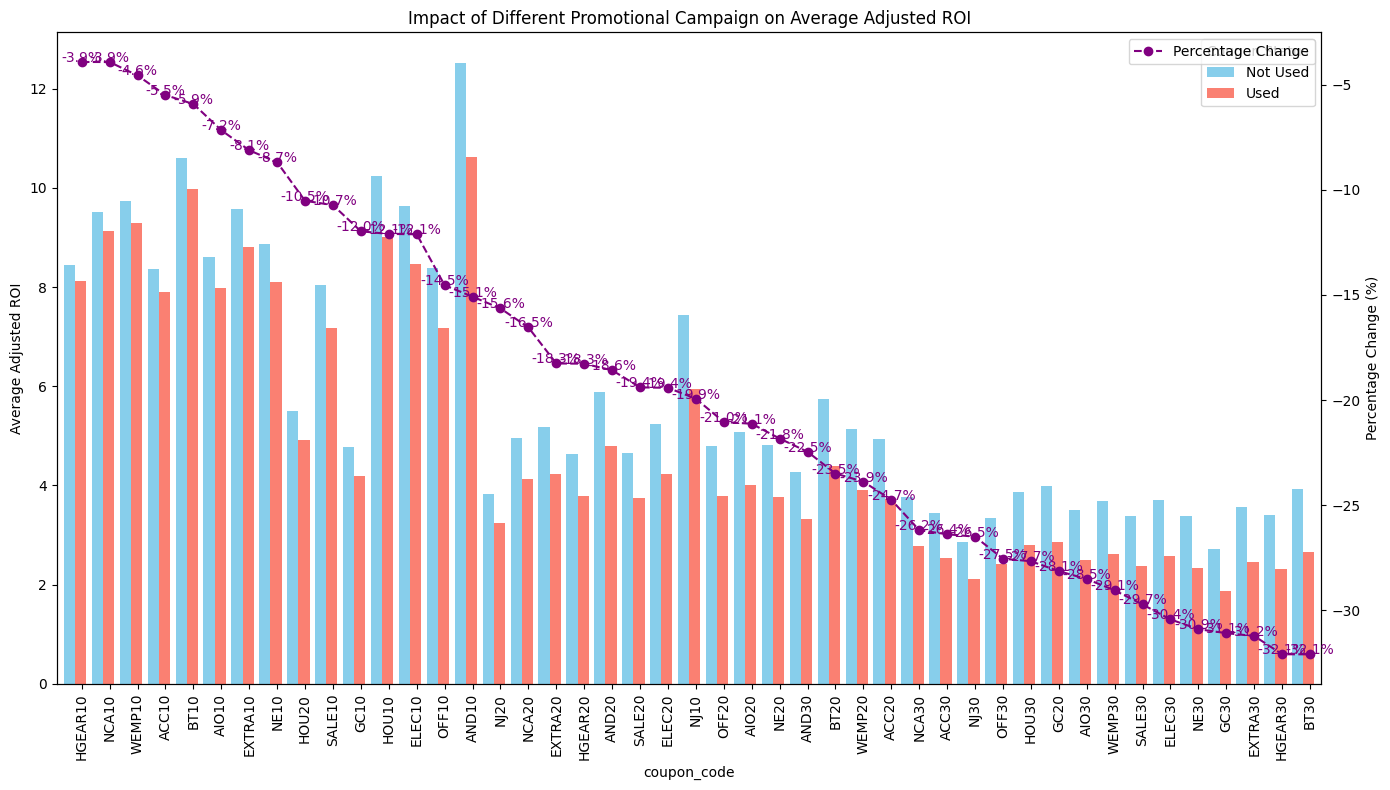

In [67]:
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot Adjusted ROI for "Not Used" and "Used" as side-by-side bars
coupon_adj_roi[['Not Used', 'Used']].plot(kind='bar', ax=ax1, color=['skyblue', 'salmon'], position=0.8, width=0.8)
ax1.set_ylabel("Average Adjusted ROI")
ax1.set_title("Impact of Different Promotional Campaign on Average Adjusted ROI")
ax1.legend(title="Coupon Status")

# Plot percentage change on the secondary y-axis
ax2 = ax1.twinx()
ax2.plot(coupon_adj_roi.index, coupon_adj_roi['Percentage_Change'], color='purple', marker='o', linestyle='--', label='Percentage Change')
ax2.set_ylabel("Percentage Change (%)")
ax2.legend(loc="upper right")

# Display percentage change as labels on the line plot
for i, txt in enumerate(coupon_adj_roi['Percentage_Change'].round(1)):
    ax2.annotate(f"{txt}%", (i, coupon_adj_roi['Percentage_Change'].iloc[i]), color="purple", ha="center")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Observation:
- Higher Adjusted ROI for Unused Coupons: The majority of coupons show a higher adjusted ROI when they are not used compared to when they are used. This suggests that promotions, while driving sales, may not necessarily contribute to a higher ROI in the short term due to the cost of discounts impacting profitability.
- Impact of High Discounts: Coupons with significant negative impacts on adjusted ROI have higher discount percentages which leads to reduced profitability. This could suggest a need for re-evaluating high discount strategies or targeting them more selectively.

### Analysis of Seasonality Usage of Coupons on Revenue

In [68]:
sales_data['date'] = pd.to_datetime(sales_data['date'])
sales_data['month'] = sales_data['date'].dt.month

# Calculate monthly averages for ROI, ROI_adjusted, and ROI_seasonal_adjusted by coupon status
monthly_metrics = sales_data.groupby(['month', 'coupon_status']).agg(
    Avg_ROI=('ROI', 'mean'),
    Avg_ROI_Adjusted=('ROI_adjusted', 'mean'),
    Avg_ROI_Seasonal_Adjusted=('ROI_seasonal_adjusted', 'mean')
).reset_index()

monthly_metrics

month coupon_status   Avg_ROI  Avg_ROI_Adjusted  Avg_ROI_Seasonal_Adjusted
0       1      Not Used  7.491328          9.125277                   9.125277
1       1          Used  6.637100          8.071289                   8.071289
2       2      Not Used  4.158364          5.016528                   5.016528
3       2          Used  3.288073          3.946916                   3.946916
4       3      Not Used  2.863897          3.483713                   3.483713
5       3          Used  2.008409          2.467782                   2.467782
6       4      Not Used  7.288176          8.908560                   8.908560
7       4          Used  6.458076          7.904616                   7.904616
8       5      Not Used  4.000595          4.849541                   4.849541
9       5          Used  3.178104          3.905103                   3.905103
10      6      Not Used  2.848284          3.477422                   3.838782
11      6          Used  2.002422          2.441050                   2.668243
12      7      Not Used  7.045444          8.611317                   9.460024
13      7          Used  6.253275          7.619816                   8.418015
14      8      Not Used  4.000658          4.867289                   5.382778
15      8          Used  3.223518          3.905355                   4.306688
16      9      Not Used  2.832896          3.469416                   3.848555
17      9          Used  1.986507          2.391126                   2.643074
18     10      Not Used  7.109778          8.661692                   8.661692
19     10          Used  6.500081          7.875606                   7.875606
20     11      Not Used  4.140270          4.994371                   5.947136
21     11          Used  3.336558          4.042341                   4.794756
22     12      Not Used  2.930902          3.580933                   4.218311
23     12          Used  2.062415          2.522395                   2.984057

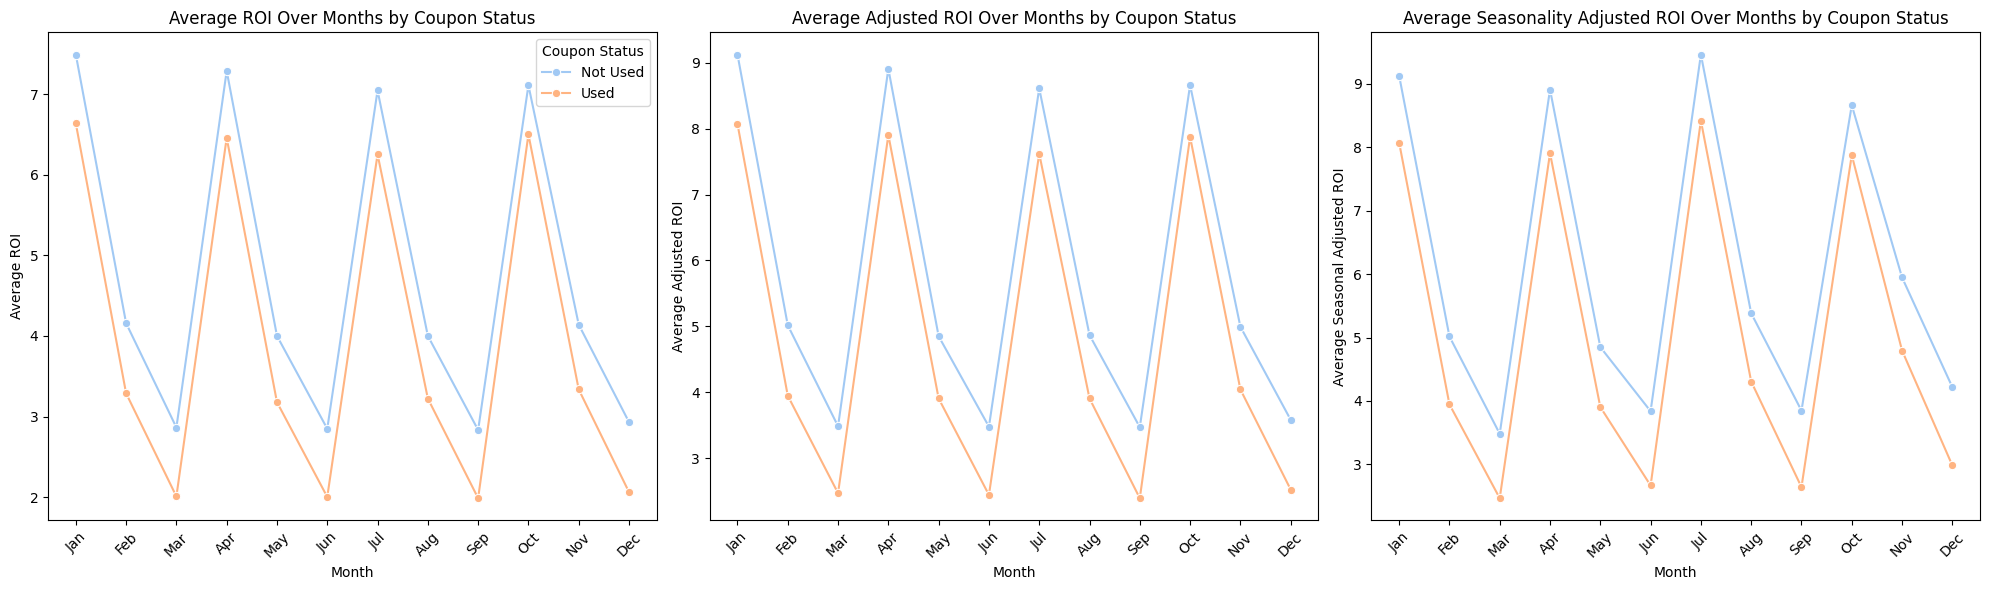

In [69]:
# Set up a wider figure with more spacing between subplots
plt.figure(figsize=(20, 6))

# Plot Average ROI by Month
plt.subplot(1, 3, 1)
sns.lineplot(data=monthly_metrics, x='month', y='Avg_ROI', hue='coupon_status', marker='o', palette='pastel')
plt.title('Average ROI Over Months by Coupon Status')
plt.xlabel('Month')
plt.ylabel('Average ROI')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.legend(title='Coupon Status')

# Plot Average Adjusted ROI by Month
plt.subplot(1, 3, 2)
sns.lineplot(data=monthly_metrics, x='month', y='Avg_ROI_Adjusted', hue='coupon_status', marker='o', palette='pastel')
plt.title('Average Adjusted ROI Over Months by Coupon Status')
plt.xlabel('Month')
plt.ylabel('Average Adjusted ROI')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.legend([],[], frameon=False)  # Hide legend to avoid repetition

# Plot Average Seasonality Adjusted ROI by Month
plt.subplot(1, 3, 3)
sns.lineplot(data=monthly_metrics, x='month', y='Avg_ROI_Seasonal_Adjusted', hue='coupon_status', marker='o', palette='pastel')
plt.title('Average Seasonality Adjusted ROI Over Months by Coupon Status')
plt.xlabel('Month')
plt.ylabel('Average Seasonal Adjusted ROI')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.legend([],[], frameon=False)  # Hide legend to avoid repetition

plt.tight_layout()
plt.show()


Observation: 
1. Higher ROI with No Coupon Usage: Across all three ROI metrics, the lines for "Not Used" consistently have higher values compared to "Used". This suggests that, on average, transactions where no coupon was used yielded a higher ROI. This might be due to the reduction in revenue associated with coupon discounts.
2. Impact of Adjusted ROI Metrics: Both the Adjusted ROI and Seasonally Adjusted ROI follow similar patterns to the unadjusted ROI, though they tend to have higher peaks. This suggests that when seasonality and specific marketing adjustments are factored in, the impact of promotional campaigns might be more favorable. The adjustments might help account for variations that impact baseline ROI.

Marketing Strategy:
1. During High ROI Periods: March, July, and October appear to be strong months in terms of ROI, suggesting these could be good months to leverage without relying heavily on discounts or coupons.
2. Coupon Strategy Adjustment: Since coupon usage correlates with lower ROI, it may be worth investigating the specific types or values of coupons used during these months to optimize for better returns.

### Analysis of Coupon Usage in Different Marketing Channels

In [70]:
coupon_usage = sales_data.groupby(['marketing_channel', 'coupon_status']).size().reset_index(name='Transaction_Count')
coupon_usage_pivot = coupon_usage.pivot(index='marketing_channel', columns='coupon_status', values='Transaction_Count').fillna(0)

# Calculate the percentage of "Used" and "Not Used" for each marketing channel
coupon_usage_pivot['Used_Percentage'] = coupon_usage_pivot['Used'] / (coupon_usage_pivot['Used'] + coupon_usage_pivot['Not Used']) * 100
coupon_usage_pivot['Not_Used_Percentage'] = coupon_usage_pivot['Not Used'] / (coupon_usage_pivot['Used'] + coupon_usage_pivot['Not Used']) * 100

coupon_usage_pivot = coupon_usage_pivot.reset_index()
coupon_usage_pivot

coupon_status       marketing_channel  Not Used  Used  Used_Percentage  \
0                   Affiliate Program      3265  1724        34.556023   
1                  Amazon Display Ads      3341  1746        34.322784   
2                   Amazon Search Ads      3232  1745        35.061282   
3                   Deals and Coupons      3419  1762        34.008879   
4                      Email Campaign      3207  1745        35.238288   
5                Influencer Marketing      3324  1771        34.759568   
6                    Referral Program      3337  1681        33.499402   
7                                 SEO      3257  1761        35.093663   
8                    Sponsored Brands      3297  1696        33.967555   
9              Video Ads (Amazon OTT)      3330  1817        35.302118   

coupon_status  Not_Used_Percentage  
0                        65.443977  
1                        65.677216  
2                        64.938718  
3                        65.991121  
4                        64.761712  
5                        65.240432  
6                        66.500598  
7                        64.906337  
8                        66.032445  
9                        64.697882

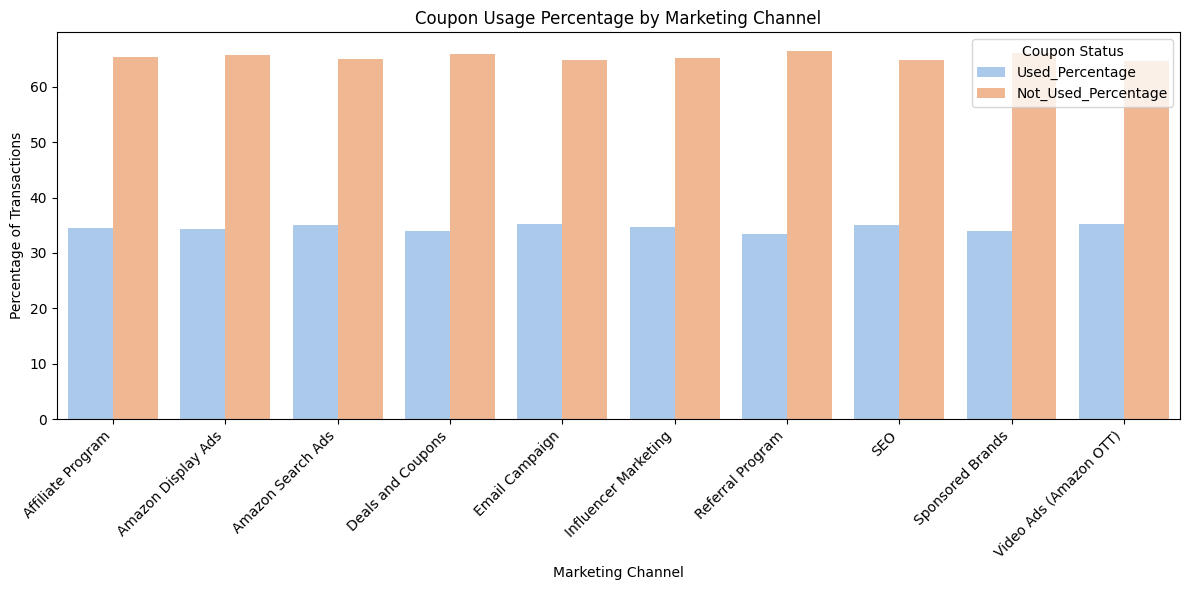

In [71]:
plt.figure(figsize=(12, 6))
sns.barplot(data=coupon_usage_pivot.melt(id_vars='marketing_channel', value_vars=['Used_Percentage', 'Not_Used_Percentage'], 
                                         var_name='coupon_status', value_name='Percentage'),
            x='marketing_channel', y='Percentage', hue='coupon_status', palette='pastel')

plt.title('Coupon Usage Percentage by Marketing Channel')
plt.xlabel('Marketing Channel')
plt.ylabel('Percentage of Transactions')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Coupon Status')
plt.tight_layout()
plt.show()

In [72]:
# Group data by marketing channel and coupon status, and calculate the average ROI metrics
channel_roi = sales_data.groupby(['marketing_channel', 'coupon_status']).agg(
    Avg_ROI=('ROI', 'mean'),
    Avg_ROI_Adjusted=('ROI_adjusted', 'mean'),
    Avg_ROI_Seasonal_Adjusted=('ROI_seasonal_adjusted', 'mean')
).reset_index()

channel_roi

marketing_channel coupon_status   Avg_ROI  Avg_ROI_Adjusted  \
0        Affiliate Program      Not Used  4.697361          5.167723   
1        Affiliate Program          Used  3.942607          4.341264   
2       Amazon Display Ads      Not Used  4.734309          3.791091   
3       Amazon Display Ads          Used  3.904761          3.124040   
4        Amazon Search Ads      Not Used  4.694477          6.569539   
5        Amazon Search Ads          Used  3.814348          5.340319   
6        Deals and Coupons      Not Used  4.652740          4.185861   
7        Deals and Coupons          Used  3.948381          3.545103   
8           Email Campaign      Not Used  4.784923          6.208351   
9           Email Campaign          Used  3.947514          5.127684   
10    Influencer Marketing      Not Used  4.797736          5.760749   
11    Influencer Marketing          Used  3.839680          4.609762   
12        Referral Program      Not Used  4.711746          7.542372   
13        Referral Program          Used  3.910960          6.250701   
14                     SEO      Not Used  4.737702          7.109710   
15                     SEO          Used  3.860748          5.795273   
16        Sponsored Brands      Not Used  4.709084          6.103194   
17        Sponsored Brands          Used  3.958599          5.144141   
18  Video Ads (Amazon OTT)      Not Used  4.706257          5.175999   
19  Video Ads (Amazon OTT)          Used  4.004546          4.413263   

    Avg_ROI_Seasonal_Adjusted  
0                    5.294507  
1                    4.434755  
2                    4.069017  
3                    3.323102  
4                    7.368803  
5                    5.910062  
6                    4.185861  
7                    3.545103  
8                    6.899341  
9                    5.716497  
10                   6.034688  
11                   4.815578  
12                   7.987482  
13                   6.642264  
14                   7.421734  
15                   6.055748  
16                   6.284309  
17                   5.278358  
18                   5.382212  
19                   4.582565

/var/folders/cr/yg8f_zlx5w1_6mw1x0jdd6mr0000gn/T/ipykernel_67542/2804400814.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(channel_roi['marketing_channel'].unique(), rotation=45, ha='right')
/var/folders/cr/yg8f_zlx5w1_6mw1x0jdd6mr0000gn/T/ipykernel_67542/2804400814.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(channel_roi['marketing_channel'].unique(), rotation=45, ha='right')
/var/folders/cr/yg8f_zlx5w1_6mw1x0jdd6mr0000gn/T/ipykernel_67542/2804400814.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(channel_roi['marketing_channel'].unique(), rotation=45, ha='right')


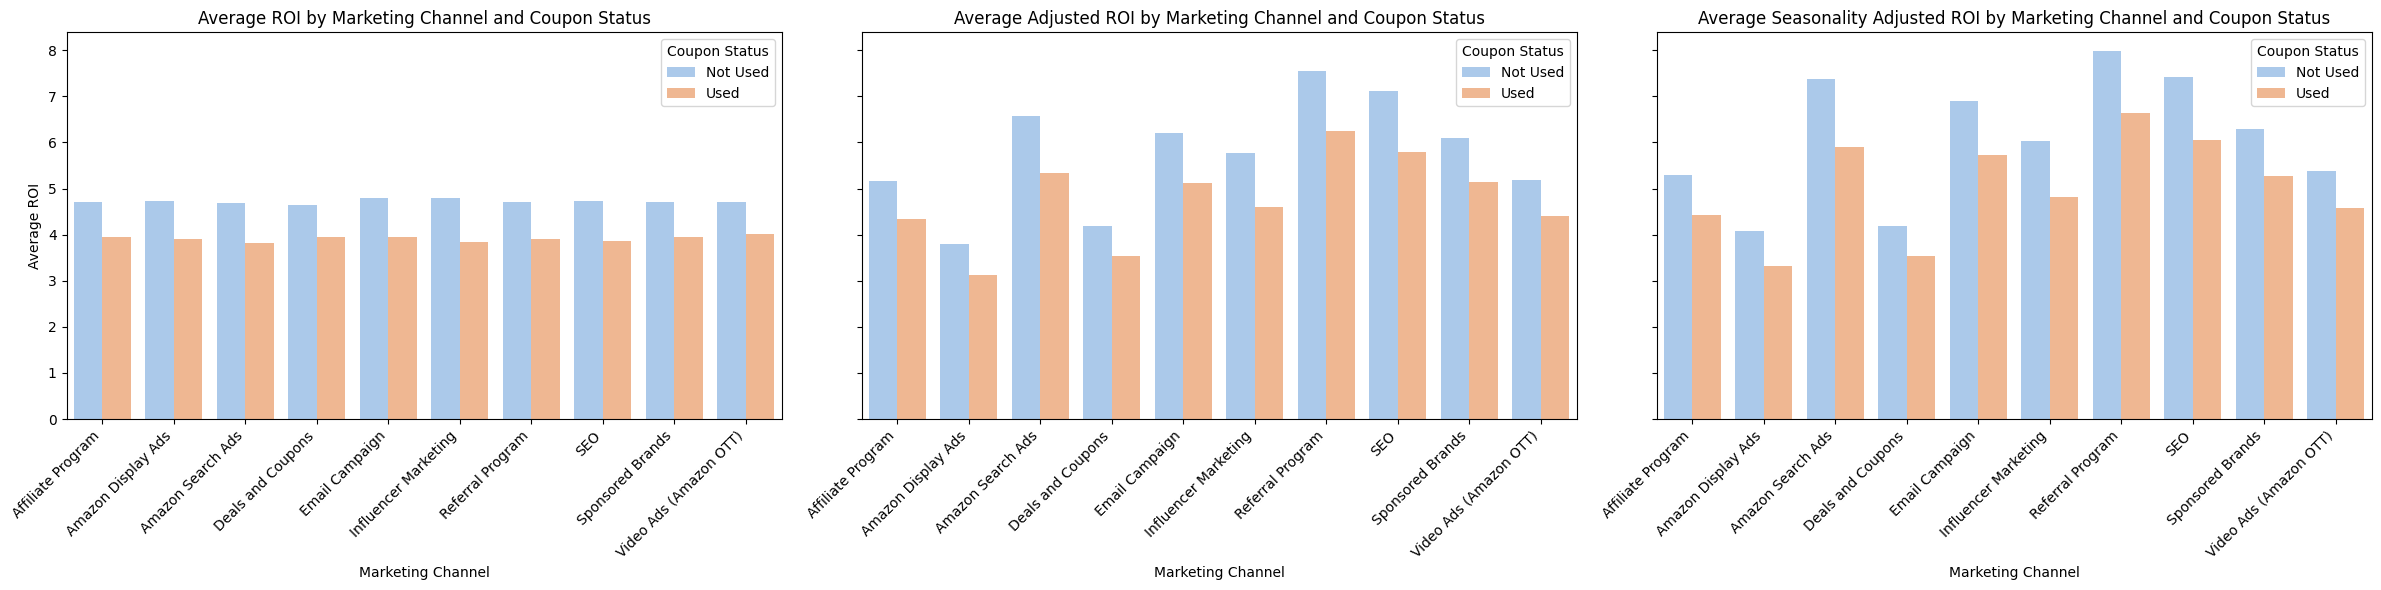

In [73]:
fig, axes = plt.subplots(1, 3, figsize=(24, 6), sharey=True)

# Plot Average ROI by Marketing Channel and Coupon Status
sns.barplot(data=channel_roi, x='marketing_channel', y='Avg_ROI', hue='coupon_status', ax=axes[0], palette='pastel')
axes[0].set_title('Average ROI by Marketing Channel and Coupon Status')
axes[0].set_xlabel('Marketing Channel')
axes[0].set_ylabel('Average ROI')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title='Coupon Status')

# Plot Average Adjusted ROI by Marketing Channel and Coupon Status
sns.barplot(data=channel_roi, x='marketing_channel', y='Avg_ROI_Adjusted', hue='coupon_status', ax=axes[1], palette='pastel')
axes[1].set_title('Average Adjusted ROI by Marketing Channel and Coupon Status')
axes[1].set_xlabel('Marketing Channel')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title='Coupon Status')

# Plot Average Seasonality Adjusted ROI by Marketing Channel and Coupon Status
sns.barplot(data=channel_roi, x='marketing_channel', y='Avg_ROI_Seasonal_Adjusted', hue='coupon_status', ax=axes[2], palette='pastel')
axes[2].set_title('Average Seasonality Adjusted ROI by Marketing Channel and Coupon Status')
axes[2].set_xlabel('Marketing Channel')
axes[2].tick_params(axis='x', rotation=45)
axes[2].legend(title='Coupon Status')

for ax in axes:
    ax.set_xticklabels(channel_roi['marketing_channel'].unique(), rotation=45, ha='right')

plt.tight_layout()
plt.show()



### Analysis of Coupon Usage in Different User Demographics

In [74]:
# Group by age
bins = [18, 25, 35, 45, 55, 65, 100]  # Age ranges
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']
sales_data['age_group'] = pd.cut(sales_data['age'], bins=bins, labels=labels, right=False)

age_coupon_usage = sales_data.groupby(['age_group', 'coupon_status']).size().reset_index(name='Transaction_Count')

age_coupon_usage

/var/folders/cr/yg8f_zlx5w1_6mw1x0jdd6mr0000gn/T/ipykernel_67542/3248338266.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_coupon_usage = sales_data.groupby(['age_group', 'coupon_status']).size().reset_index(name='Transaction_Count')


age_group coupon_status  Transaction_Count
0      18-25      Not Used               5210
1      18-25          Used               2802
2      26-35      Not Used               8728
3      26-35          Used               4567
4      36-45      Not Used               7436
5      36-45          Used               3888
6      46-55      Not Used               8012
7      46-55          Used               4224
8      56-65      Not Used               3623
9      56-65          Used               1967
10       65+      Not Used                  0
11       65+          Used                  0

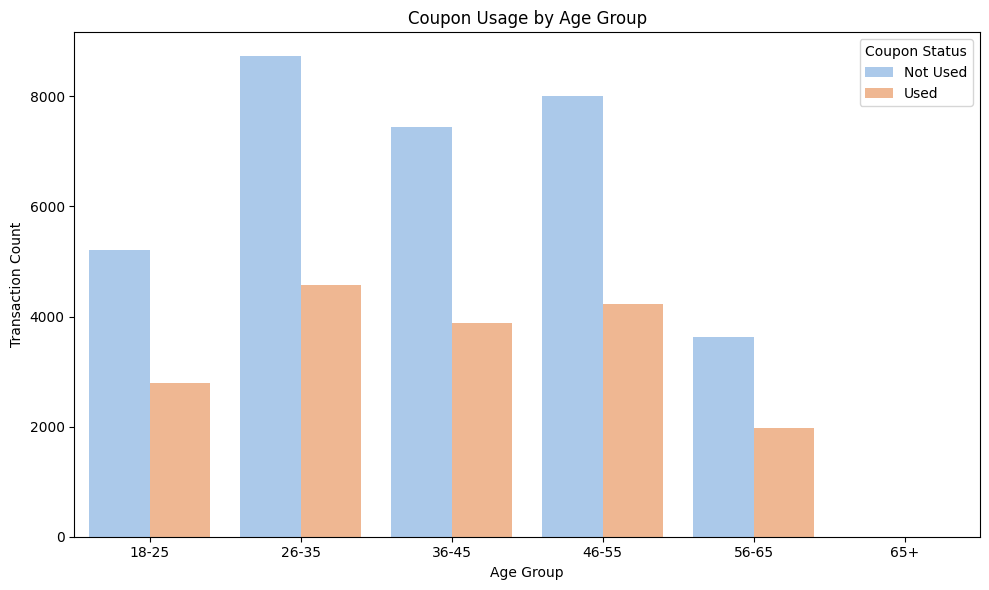

In [75]:
# Plot of coupon usage with age
plt.figure(figsize=(10, 6))
sns.barplot(data=age_coupon_usage, x='age_group', y='Transaction_Count', hue='coupon_status', palette='pastel')

plt.title('Coupon Usage by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Transaction Count')
plt.legend(title='Coupon Status')
plt.tight_layout()
plt.show()

Observation:
1. Higher Coupon Usage in Younger Age Groups: The age groups 18-25, 26-35, and 36-45 show a higher percentage of transactions where coupons were used. These younger age groups may be more responsive to promotions or inclined to use discounts.
2. Declining Coupon Usage with Age: As we move to older age groups (46-55 and 56-65), the percentage of transactions with coupon usage decreases. This suggests that older age groups may be less likely to use coupons or may respond differently to promotions.
3. Most Active Age Groups: The 26-35 and 46-55 age groups have the highest transaction counts overall (both "Used" and "Not Used"). These age groups are potentially the most engaged with the platform, making them key targets for any campaigns aiming to increase transactions.
4. Potential for Targeted Campaigns: Since younger age groups seem more responsive to coupon usage, targeted promotions could be designed to further enhance engagement with these groups. Meanwhile, different strategies might be needed for older age groups, who seem less inclined to use coupons.

In [76]:
# Group by gender
gender_coupon_usage = sales_data.groupby(['gender', 'coupon_status']).size().reset_index(name='Transaction_Count')

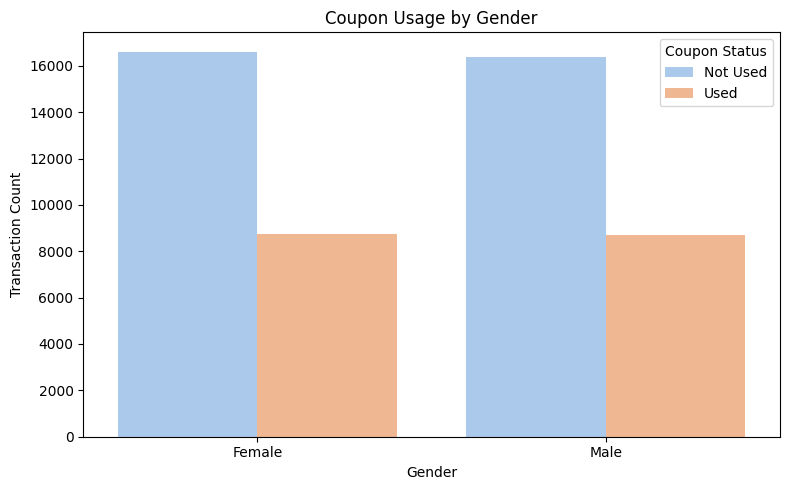

In [77]:
# Plot of coupon usage with gender
plt.figure(figsize=(8, 5))
sns.barplot(data=gender_coupon_usage, x='gender', y='Transaction_Count', hue='coupon_status', palette='pastel')

plt.title('Coupon Usage by Gender')
plt.xlabel('Gender')
plt.ylabel('Transaction Count')
plt.legend(title='Coupon Status')
plt.tight_layout()
plt.show()

Observation: The relative proportions of "Used" to "Not Used" transactions seem similar for both genders, indicating that gender might not play a strong role in determining coupon usage behavior.

### Analysis of Different Tiers of Discount on Sales

In [78]:
# Group by Discount_pct to calculate metrics
discount_metrics = sales_data.groupby('discount_percentage').agg({
    'revenue': 'sum',  
    'ROI': 'mean',    
    'ROI_adjusted': 'mean',
    'ROI_seasonal_adjusted': 'mean' 
}).reset_index()

# Rename columns for clarity
discount_metrics.columns = ['Discount Percentage', 'Total Revenue', 'Average ROI', 'Average Adjusted ROI', 'Average Seasonal Adjusted ROI']

discount_metrics

Discount Percentage  Total Revenue  Average ROI  Average Adjusted ROI  \
0                  0.1   1.120385e+07     6.953179              8.479061   
1                  0.2   9.902110e+06     3.782303              4.583868   
2                  0.3   9.819463e+06     2.573432              3.140379   

   Average Seasonal Adjusted ROI  
0                       8.724447  
1                       4.943268  
2                       3.449138

/var/folders/cr/yg8f_zlx5w1_6mw1x0jdd6mr0000gn/T/ipykernel_67542/3697174191.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=discount_metrics, x='Discount Percentage', y='Total Revenue', palette="Blues")


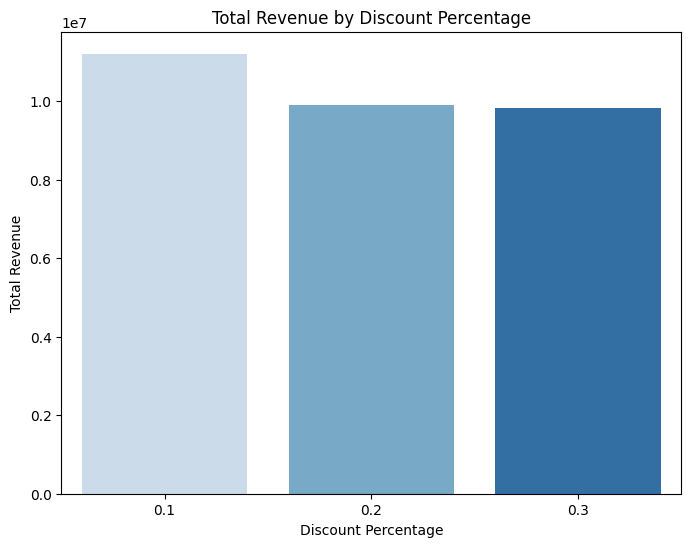

In [79]:
# Plot total revenue by discount percentage
plt.figure(figsize=(8, 6))
sns.barplot(data=discount_metrics, x='Discount Percentage', y='Total Revenue', palette="Blues")
plt.title('Total Revenue by Discount Percentage')
plt.ylabel('Total Revenue')
plt.xlabel('Discount Percentage')
plt.show()

Observations:
1. Higher Revenue at Lower Discount: It appears that the 10% discount has generated the highest total revenue compared to 20% and 30% discounts. This suggests that while the higher discount rates may appeal to some customers, they do not necessarily lead to a proportional increase in total revenue.
2. Decline with Increased Discount: The total revenue slightly decreases as the discount percentage increases. This could imply that the increased discount does not attract a sufficiently larger volume of transactions to offset the lower price per sale, resulting in a lower total revenue.
3. Price Sensitivity: Customers may be less price-sensitive than anticipated, meaning that higher discounts are not as effective in boosting sales volume to the extent necessary to increase overall revenue.

/var/folders/cr/yg8f_zlx5w1_6mw1x0jdd6mr0000gn/T/ipykernel_67542/2630996230.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=discount_metrics, x='Discount Percentage', y='Average ROI', ax=axes[0], palette="Greens")
/var/folders/cr/yg8f_zlx5w1_6mw1x0jdd6mr0000gn/T/ipykernel_67542/2630996230.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=discount_metrics, x='Discount Percentage', y='Average Adjusted ROI', ax=axes[1], palette="Purples")
/var/folders/cr/yg8f_zlx5w1_6mw1x0jdd6mr0000gn/T/ipykernel_67542/2630996230.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=Fals

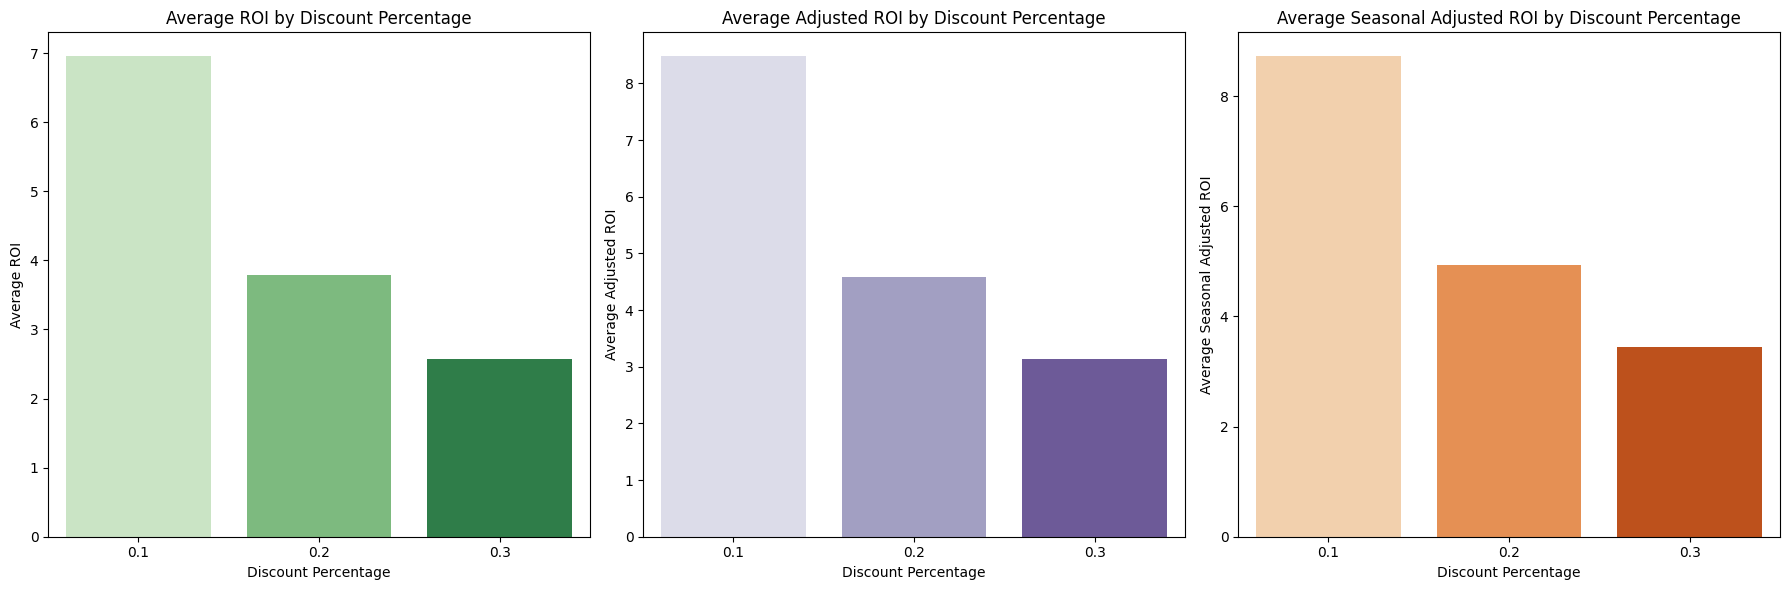

In [80]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot average ROI by discount percentage
sns.barplot(data=discount_metrics, x='Discount Percentage', y='Average ROI', ax=axes[0], palette="Greens")
axes[0].set_title('Average ROI by Discount Percentage')
axes[0].set_ylabel('Average ROI')
axes[0].set_xlabel('Discount Percentage')

# Plot average adjusted ROI by discount percentage
sns.barplot(data=discount_metrics, x='Discount Percentage', y='Average Adjusted ROI', ax=axes[1], palette="Purples")
axes[1].set_title('Average Adjusted ROI by Discount Percentage')
axes[1].set_ylabel('Average Adjusted ROI')
axes[1].set_xlabel('Discount Percentage')

# Plot average seasonal adjusted ROI by discount percentage
sns.barplot(data=discount_metrics, x='Discount Percentage', y='Average Seasonal Adjusted ROI', ax=axes[2], palette="Oranges")
axes[2].set_title('Average Seasonal Adjusted ROI by Discount Percentage')
axes[2].set_ylabel('Average Seasonal Adjusted ROI')
axes[2].set_xlabel('Discount Percentage')

# Adjust layout for clarity
plt.tight_layout()
plt.show()

Observation:
1. ROI Decline with Higher Discounts: Across all three ROI metrics, the 10% discount consistently yields the highest ROI, followed by the 20% discount, and then the 30% discount. This pattern indicates that a smaller discount percentage is associated with higher profitability relative to costs. As discounts increase, the ROI metrics decline, which suggests that higher discounts may erode profitability without proportionately increasing the benefits or sales volume.
2. Price Sensitivity and ROI Impact: This trend could indicate that customers are not significantly more responsive to higher discounts as higher discounts do not result in enough additional sales to compensate for the lower per-unit profitability.

### Market Basket Analysis to Enhance Promotional Campaigns

In [81]:
basket = sales_data.groupby(['transaction_id', 'product_id'])['quantity'].sum().unstack().reset_index().fillna(0).set_index('transaction_id')
# Convert table to binary form (1 if purchased, 0 if not)
basket = basket.map(lambda x: 1 if x > 0 else 0)  

frequent_itemsets = apriori(basket, min_support=0.005, use_colnames=True) 
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

# List to store rows of data
association_data = []
unique_products = basket.columns 

for product in unique_products:
    product_set = frozenset([product])
    related_rules = rules[rules['antecedents'].apply(lambda x: product_set.issubset(x)) |
                          rules['consequents'].apply(lambda x: product_set.issubset(x))]
    for _, row in related_rules.iterrows():
        association_data.append({
            'Product': product,
            'Antecedents': row['antecedents'],
            'Consequents': row['consequents'],
            'Support': row['support'],
            'Confidence': row['confidence'],
            'Lift': row['lift']
        })

associations_df = pd.DataFrame(association_data)
print(associations_df)

/Users/wayne/Desktop/Passion8/.venv/lib/python3.12/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


        Product               Antecedents   Consequents   Support  Confidence  \
0    B00KRCBA6E              (B00KRCBA6E)  (B07GXHC691)  0.006345    0.121560   
1    B00KRCBA6E              (B07GXHC691)  (B00KRCBA6E)  0.006345    0.119190   
2    B00KRCBA6E              (B00KRCBA6E)  (B07Z1X6VFC)  0.008858    0.169725   
3    B00KRCBA6E              (B07Z1X6VFC)  (B00KRCBA6E)  0.008858    0.144625   
4    B00KRCBA6E              (B00KRCBA6E)  (B08NCKT9FG)  0.011532    0.220948   
..          ...                       ...           ...       ...         ...   
184  B0B9XLX8VR  (B0B9XLX8VR, B07Z1X6VFC)  (B09Y5FZK9N)  0.005347    0.332506   
185  B0B9XLX8VR  (B0B9XLX8VR, B09Y5FZK9N)  (B07Z1X6VFC)  0.005347    0.303167   
186  B0B9XLX8VR  (B07Z1X6VFC, B09Y5FZK9N)  (B0B9XLX8VR)  0.005347    0.416149   
187  B0BCZCQTJX              (B09TY4MSH3)  (B0BCZCQTJX)  0.016440    1.000000   
188  B0BCZCQTJX              (B0BCZCQTJX)  (B09TY4MSH3)  0.016440    1.000000   

          Lift  
0     2.28

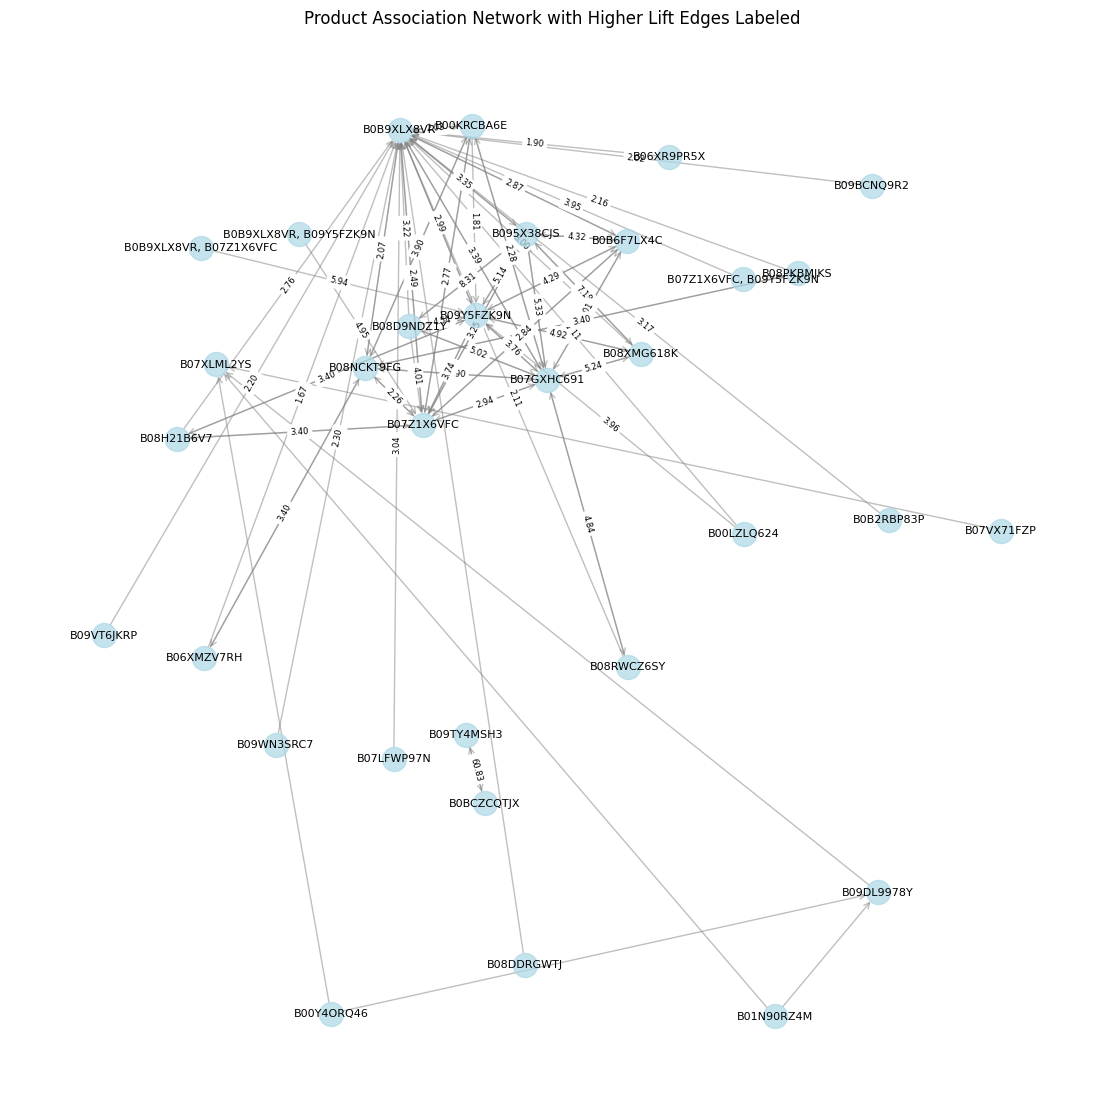

In [82]:
# Creating a directed graph
G = nx.DiGraph()

for _, row in associations_df.iterrows():
    antecedent = ', '.join(list(row['Antecedents'])) 
    consequent = ', '.join(list(row['Consequents'])) 
    G.add_edge(antecedent, consequent, weight=row['Lift'])

plt.figure(figsize=(14, 14))
pos = nx.spring_layout(G, k=1.5, seed=42)  
nodes = nx.draw_networkx_nodes(G, pos, node_size=300, node_color='lightblue', alpha=0.7)
edges = nx.draw_networkx_edges(G, pos, arrowstyle="->", arrowsize=10, edge_color='gray', alpha=0.5)
labels = nx.draw_networkx_labels(G, pos, font_size=8)

# Draw edge labels for high-lift associations only
high_lift_edges = {(antecedent, consequent): f"{G[antecedent][consequent]['weight']:.2f}"
                   for antecedent, consequent, data in G.edges(data=True) if data['weight'] > 1.5} 
nx.draw_networkx_edge_labels(G, pos, edge_labels=high_lift_edges, font_size=6)

plt.title("Product Association Network with Higher Lift Edges Labeled")
plt.axis("off")
plt.show()

Terms:
- Antecedents: The items that customers have already purchased in a transaction
- Consequents: The items that are likely to be purchased when the antecedent items are bought
- Support: Measures the frequency of itemsets and indicates how commonly items are bought together
- Confidence: Measures the likelihood of consequent given antecedent and indicates the reliability of the association rule
- Lift: Measures the strength of association and indicates how much more likely items are bought together than by chance

How Amazon can use the information: 
- Antecedent-consequent relationships can help Amazon identify complementary products that could benefit from joint promotions
- By examining association rules, Amazon can identify which products have a natural buying association with each other. Amazon might decide to only promote one product (the antecedent) and observe an increase in sales for the other product (the consequent)
- A high lift value indicates a strong association and suggests that the promotion on the antecedent product (the one on discount) is positively affecting sales of the consequent product. For example Product B0BCZCQTJX → Product B09TY4MSH3 with a lift of 60.827670 suggests that customers are twice as likely to buy Product B09TY4MSH3 when they buy Promoted Product B0BCZCQTJX.

### Random Forest Classifier for Prediction of Coupon Usage

In [83]:
promo_sales_data = sales_data.copy()
promo_sales_data['coupon_used'] = promo_sales_data['coupon_status'].apply(lambda x: 1 if x == 'Used' else 0)

features = ['age', 'gender', 'quantity', 'delivery_charges','discount_percentage', 'marketing_channel', 'date']
X = promo_sales_data[features]
y = promo_sales_data['coupon_used']

numeric_features = ['age', 'quantity', 'discount_percentage', 'delivery_charges']
categorical_features = ['gender', 'marketing_channel']

# Preprocessing: Standard scaling for numeric features and one-hot encoding for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop=None), categorical_features)
    ])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        random_state=42
    ))
])

# Train the model
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.65      1.00      0.79      6602
           1       0.33      0.00      0.00      3490

    accuracy                           0.65     10092
   macro avg       0.49      0.50      0.40     10092
weighted avg       0.54      0.65      0.52     10092



/var/folders/cr/yg8f_zlx5w1_6mw1x0jdd6mr0000gn/T/ipykernel_67542/3815928919.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='pastel')


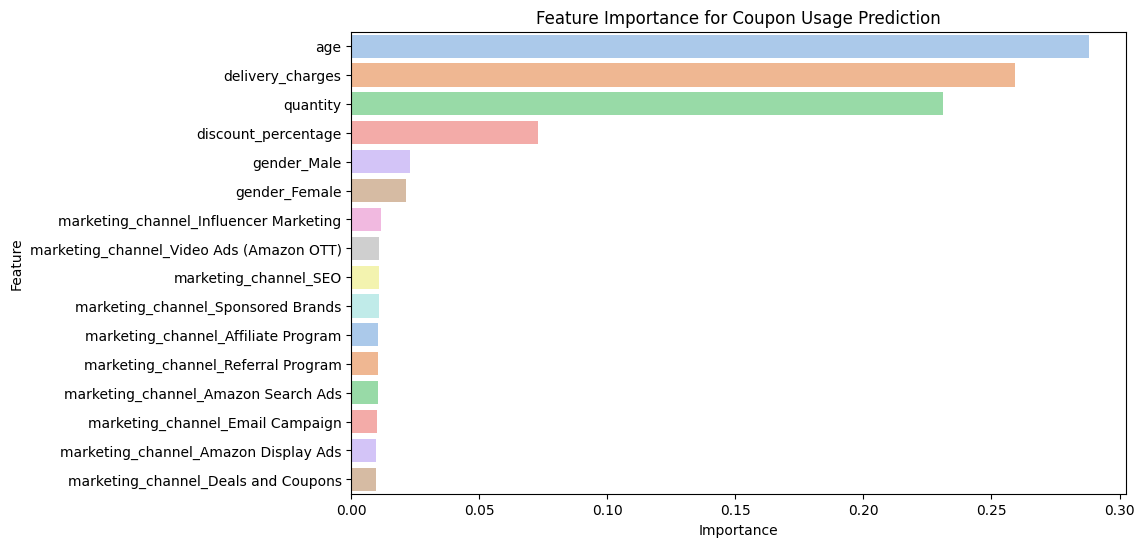

In [84]:
feature_names = preprocessor.transformers_[0][1].get_feature_names_out(numeric_features).tolist() + \
                preprocessor.transformers_[1][1].get_feature_names_out(categorical_features).tolist()

# Extract feature importance from the Random Forest model
rf_model = pipeline.named_steps['classifier']
feature_importance = rf_model.feature_importances_

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='pastel')
plt.title('Feature Importance for Coupon Usage Prediction')
plt.show()

Observation:
- Age, Delivery Charges, and Quantity Are Major Predictors: These three features show the highest importance scores, suggesting they are significant factors in predicting whether a coupon will be used. Age, in particular, has the highest importance, indicating that certain age groups have a greater tendency to use coupons
- Discount Percentage Has Moderate Impact: The discount percentage is also relatively important, but less so than the top three features. This suggests that the value of the discount itself does influence coupon usage, though not as strongly as demographic factors or transaction specifics like delivery charges

In [85]:
# Exporting final data frame as csv file
# sales_data.to_csv('marketing_channels.csv', index=False)